In [1]:
%load_ext watermark


In [2]:
from IPython.display import display, HTML
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from teeplot import teeplot as tp
from tqdm import tqdm

from pylib._seed_global_rngs import seed_global_rngs


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-04T17:42:34.934497+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

matplotlib: 3.9.2
pandas    : 2.2.3
teeplot   : 1.4.2
seaborn   : 0.13.2
numpy     : 2.1.2

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-04-30-profile-mut-screen"
teeplot_subdir


'2025-04-30-profile-mut-screen'

In [5]:
seed_global_rngs(1)


## Get Data


In [6]:
df = pd.read_parquet("https://osf.io/9rck3/download")


In [7]:
df["replicate_uuid"].nunique()


15

In [8]:
df["is_focal_mutation"] = df["mut_char_pos"] == 0


In [9]:
stats = (
    "binom_p",
    "binom_stat",
    "trinom_p",
    "trinom_stat",
    "trinom_p_fill0",
    "trinom_stat_fill0",
    "mw_p",
    "cliffs_delta",
    "mw_p_dropna",
    "cliffs_delta_dropna",
)


In [10]:
records = []
groups = df[
    (df["trt_hsurf_bits"] == 0)
    & (df["trt_n_downsample"] == df["trt_n_downsample"].max())
    & (df["tb_stat"].str.contains("ratio"))
].groupby(
    [
        "trt_name",
        "replicate_uuid",
        "screen_uuid",
        "screen_min_leaves",
        "screen_name",
        "tb_stat",
    ],
    observed=True,
)
for (
    trt_name,
    replicate_uuid,
    screen_uuid,
    screen_min_leaves,
    screen_name,
    tb_stat,
), grp in tqdm(
    groups,
):
    grp_focal = grp[grp["is_focal_mutation"]].copy().reset_index(drop=True)
    grp_nonfocal = (
        grp[~grp["is_focal_mutation"]]
        .copy()
        .sample(n=2_000, replace=True)
        .reset_index(drop=True)
    )

    record = {
        "trt_name": trt_name,
        "replicate_uuid": replicate_uuid,
        "screen_uuid": screen_uuid,
        "screen_min_leaves": screen_min_leaves,
        "screen_name": screen_name,
        "tb_stat": tb_stat,
    }

    records.append(
        {
            **record,
            **{
                stat: (
                    np.nan if len(grp_focal) == 0 else grp_focal[stat].item()
                )
                for stat in stats
            },
            **{"mutation": "focal"},
        },
    )
    for __, row in grp_focal.iterrows():
        records.append(
            {
                **record,
                **{stat: row[stat] for stat in stats},
                **{"mutation": "nonfocal"},
            },
        )


100%|██████████| 1680/1680 [00:06<00:00, 277.97it/s]


In [11]:
data = pd.DataFrame(records)


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.png


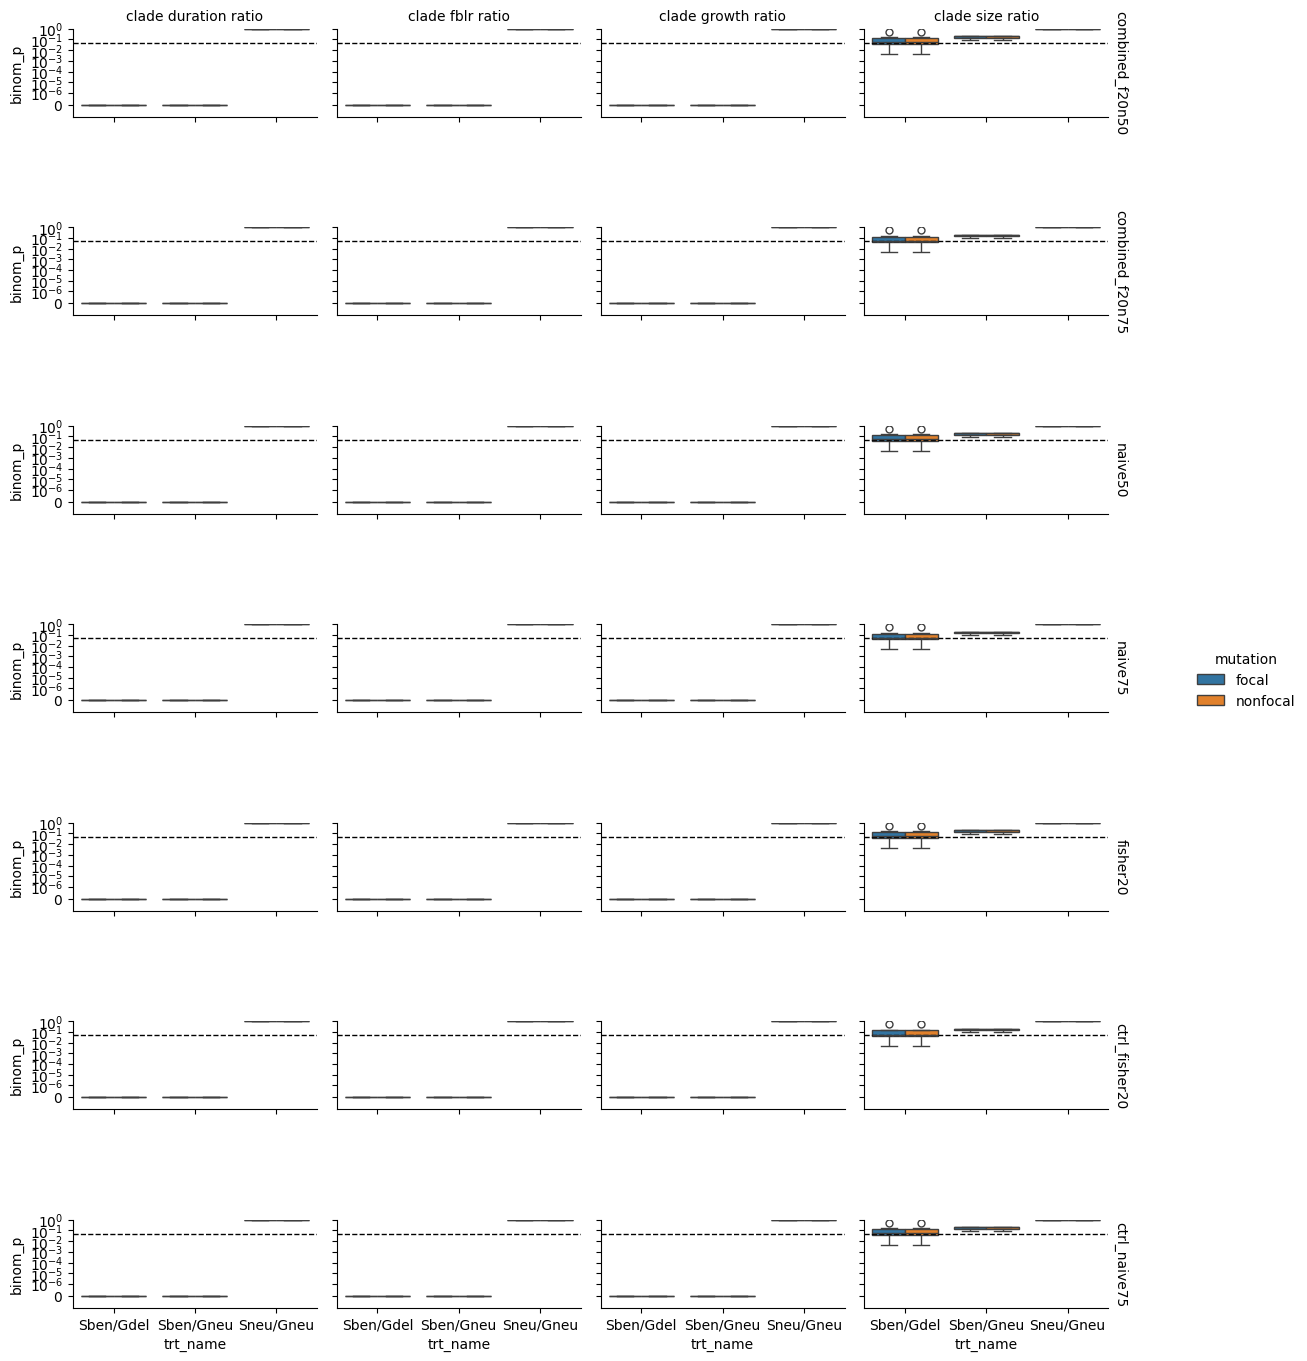

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.png


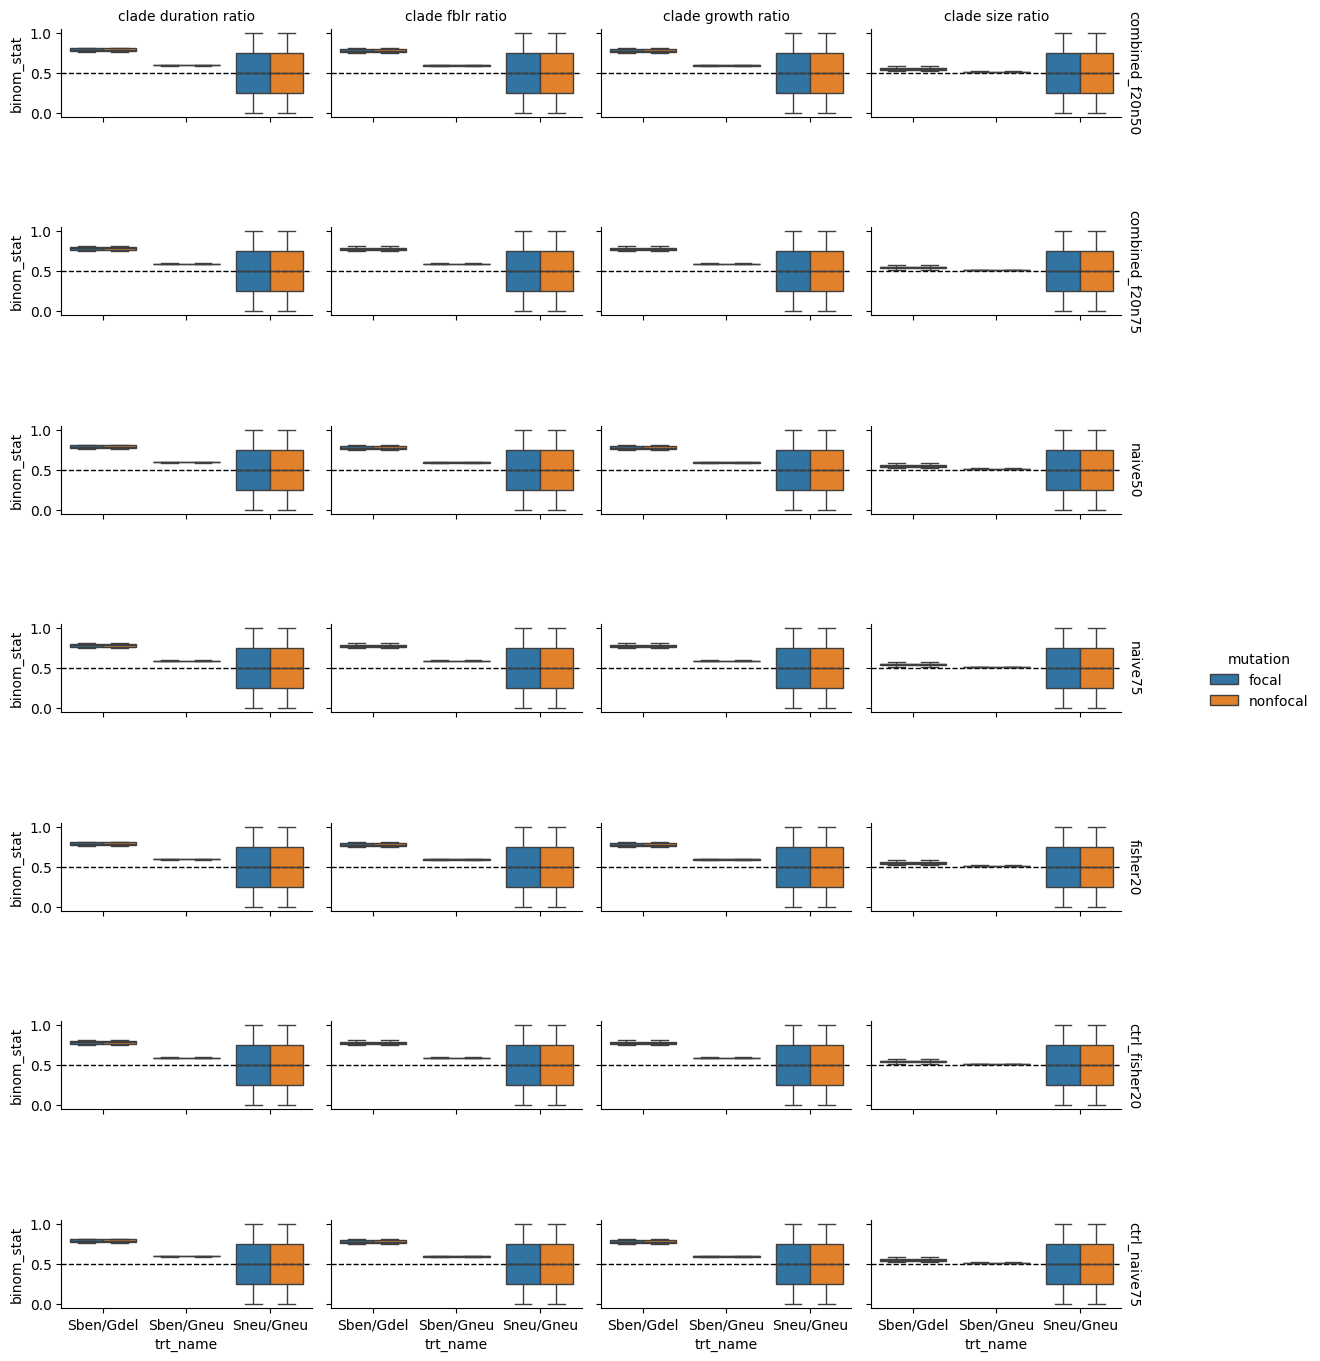

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.png


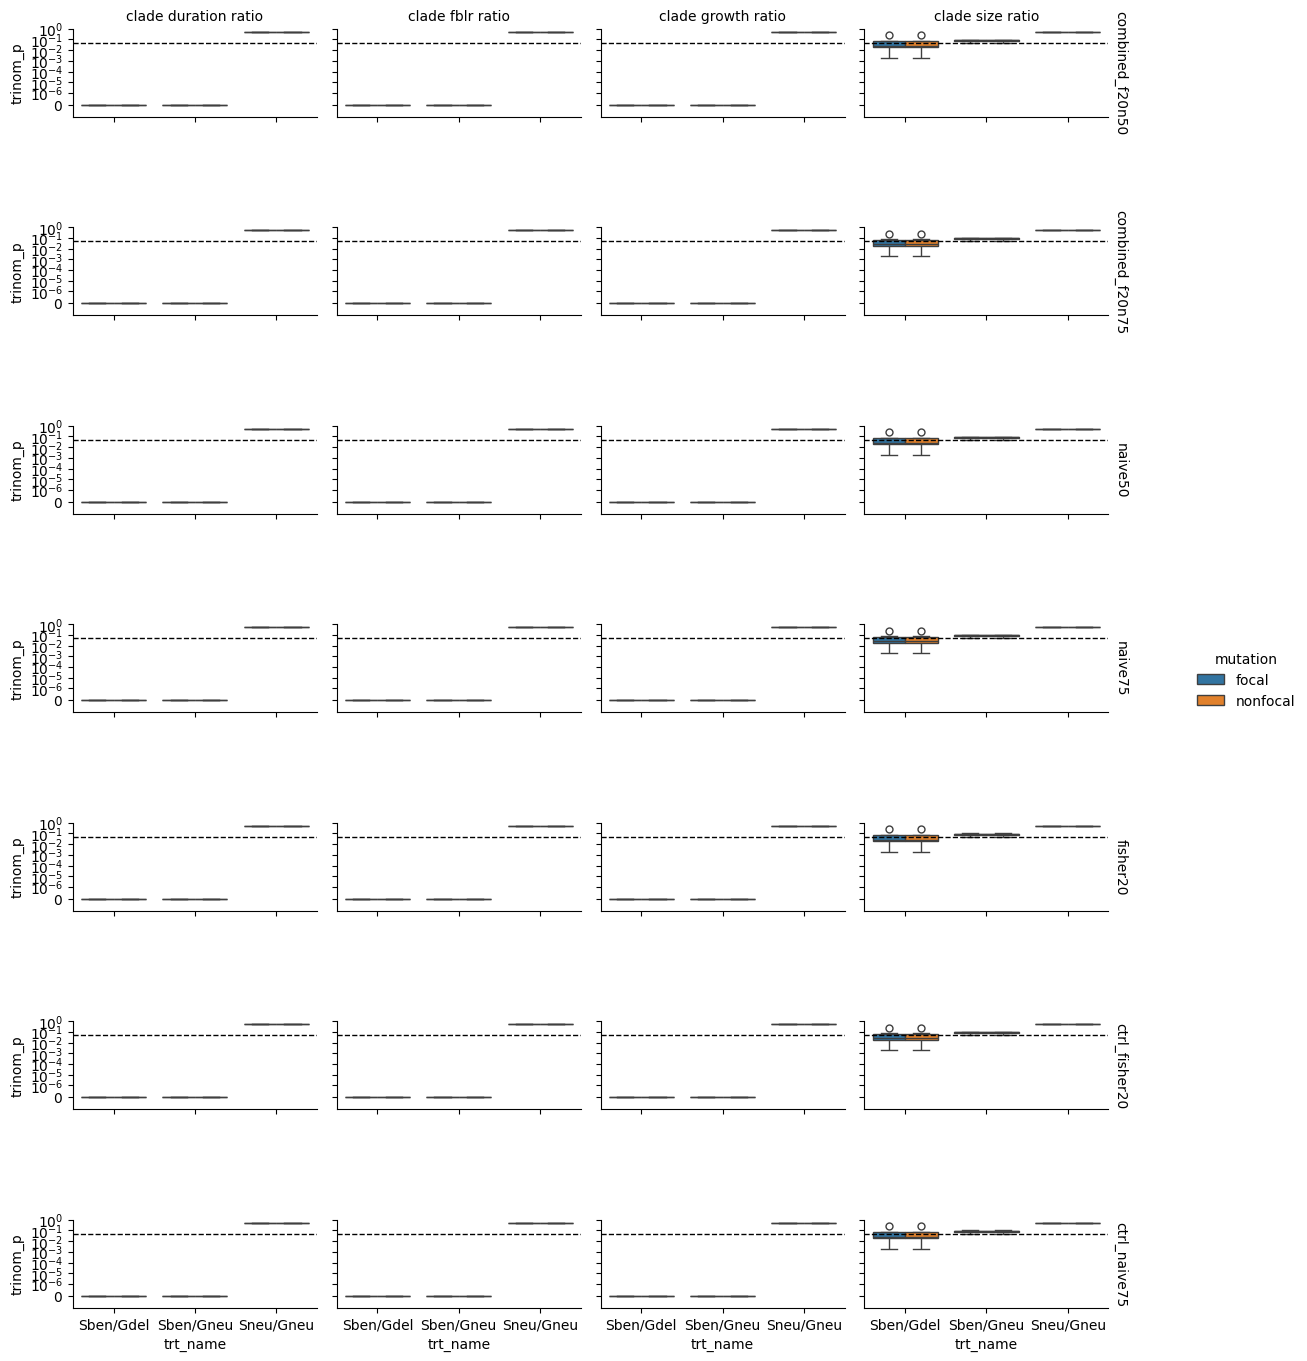

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.png


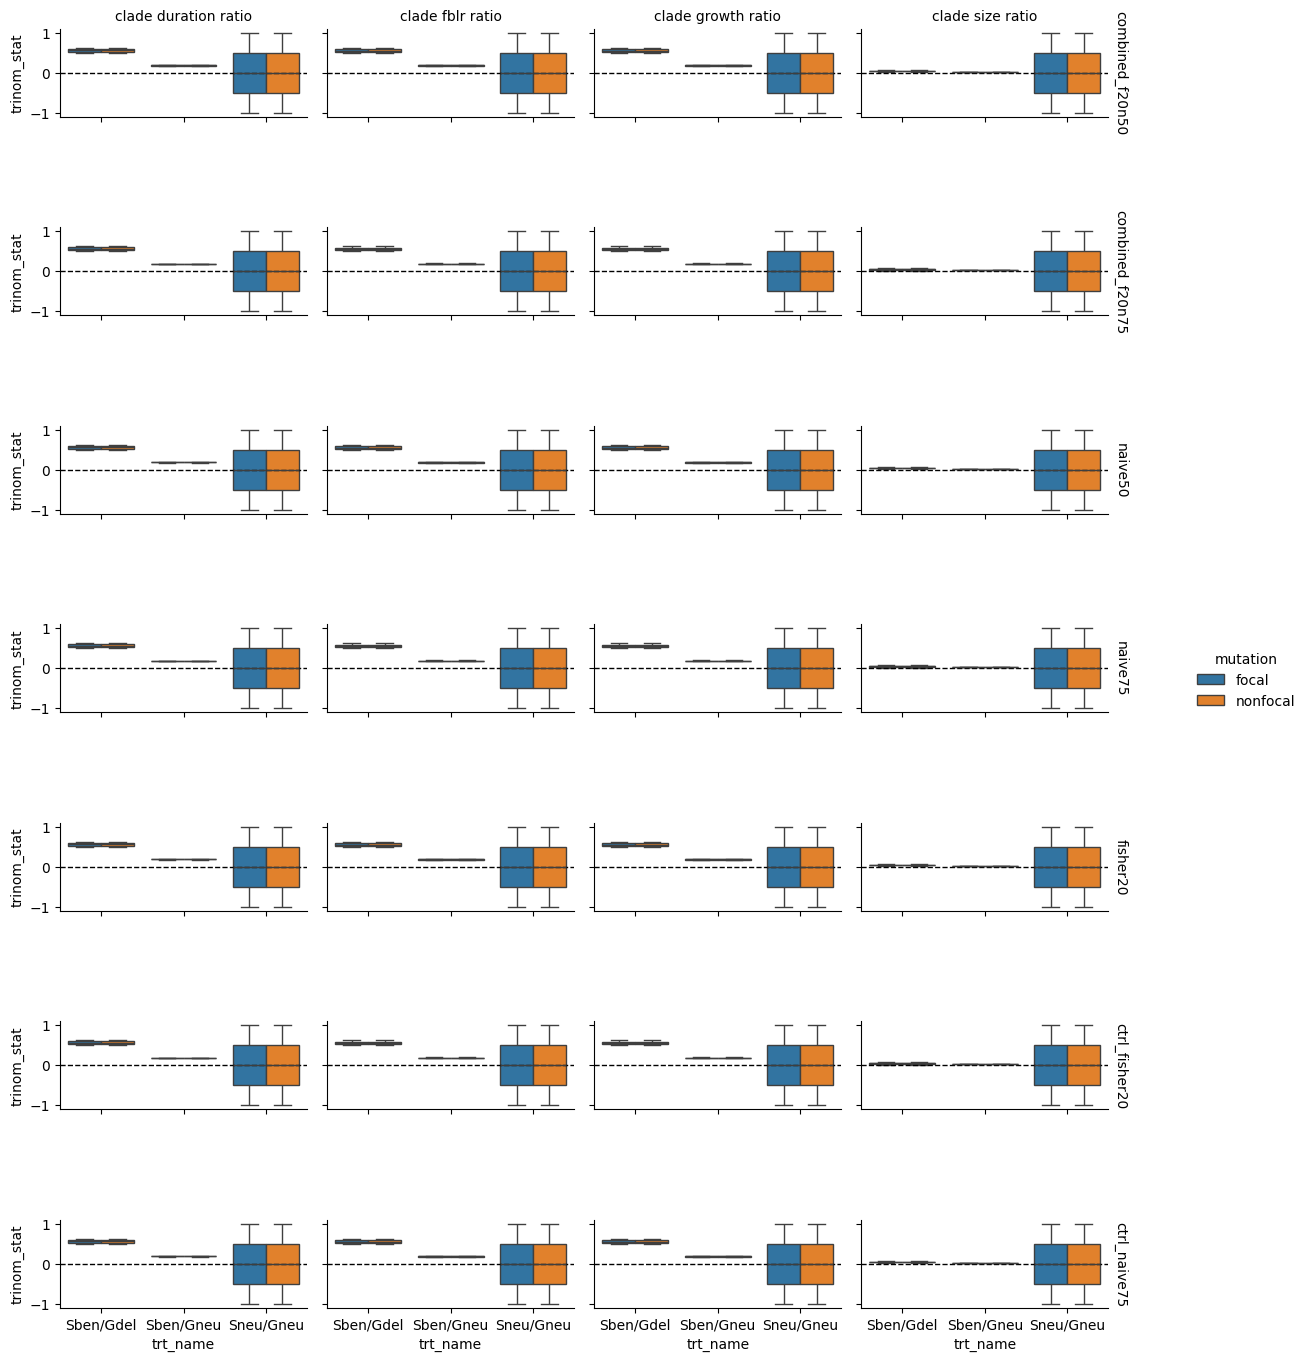

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.png


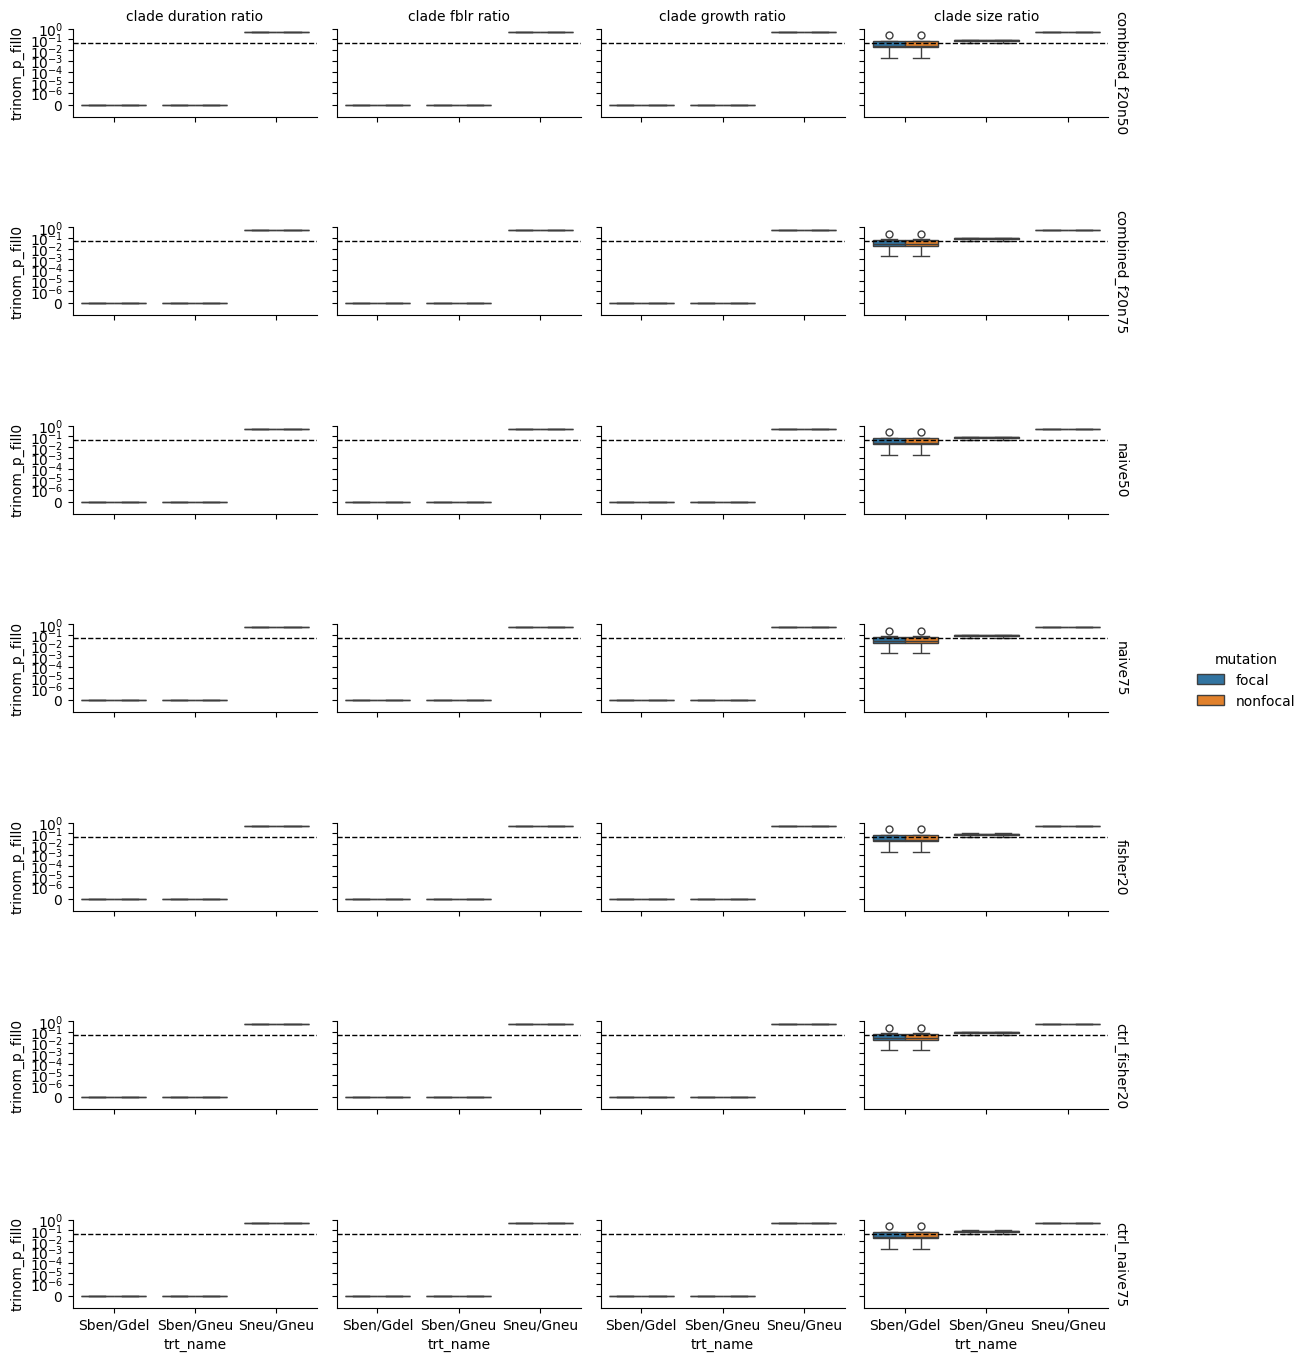

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.png


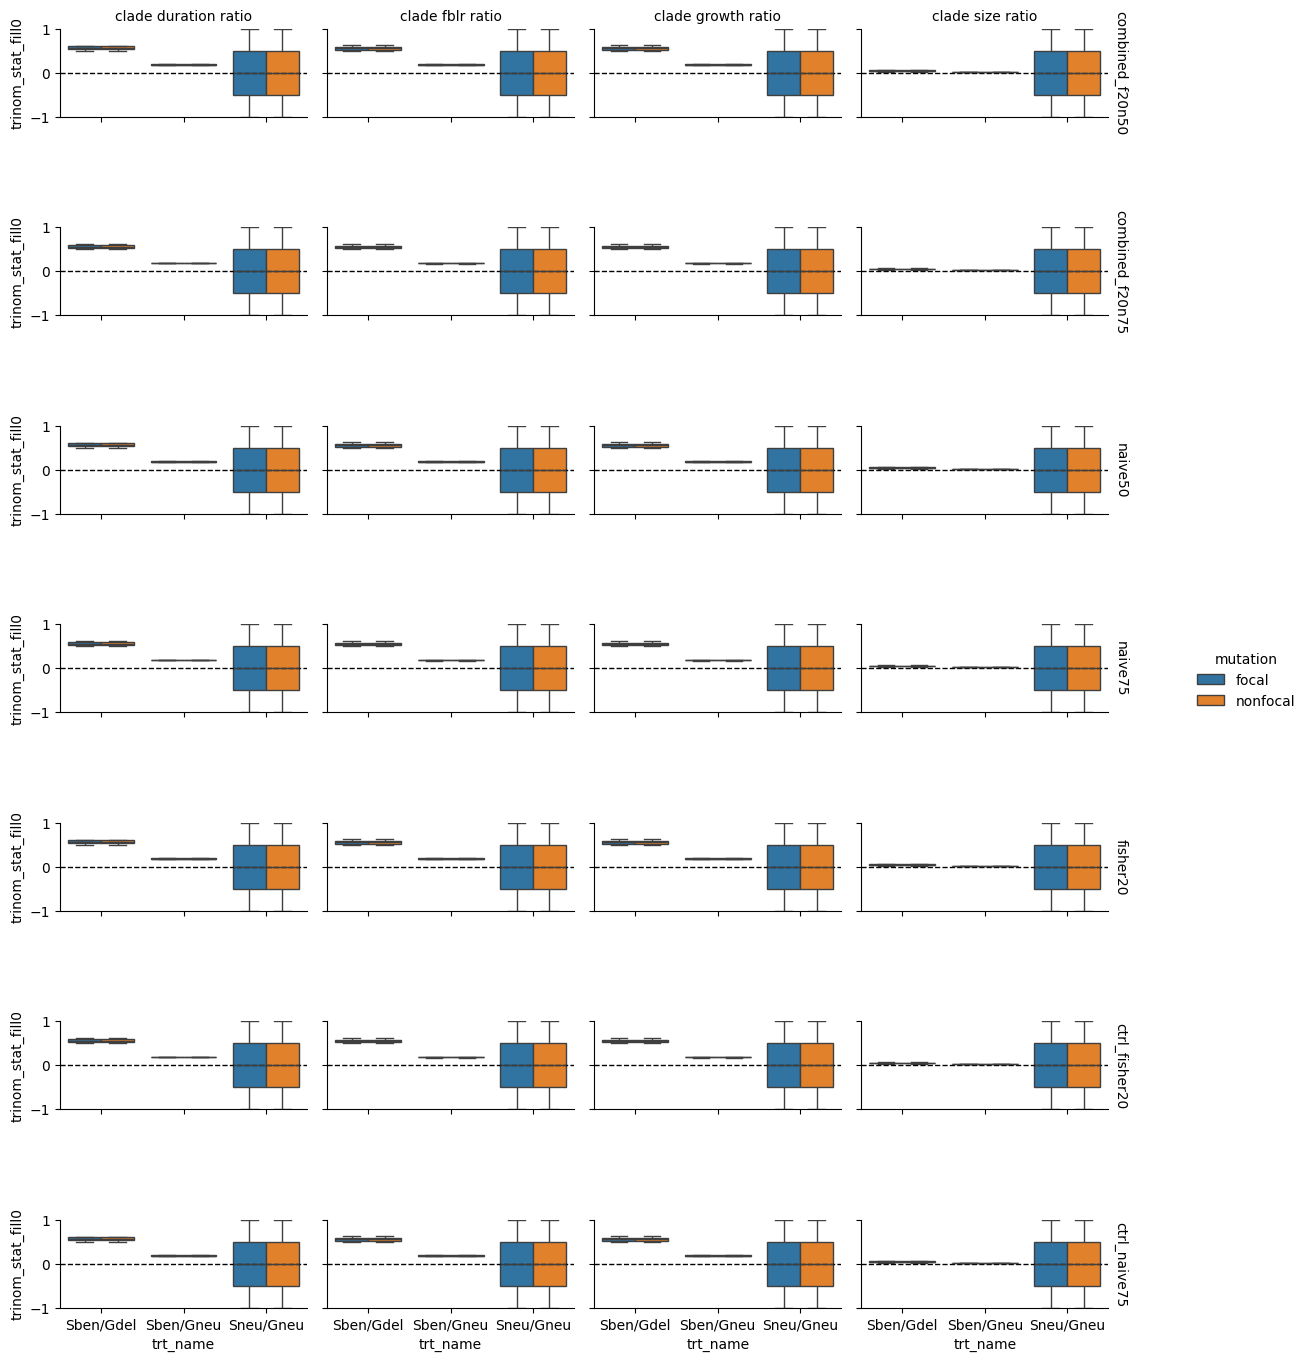

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.png


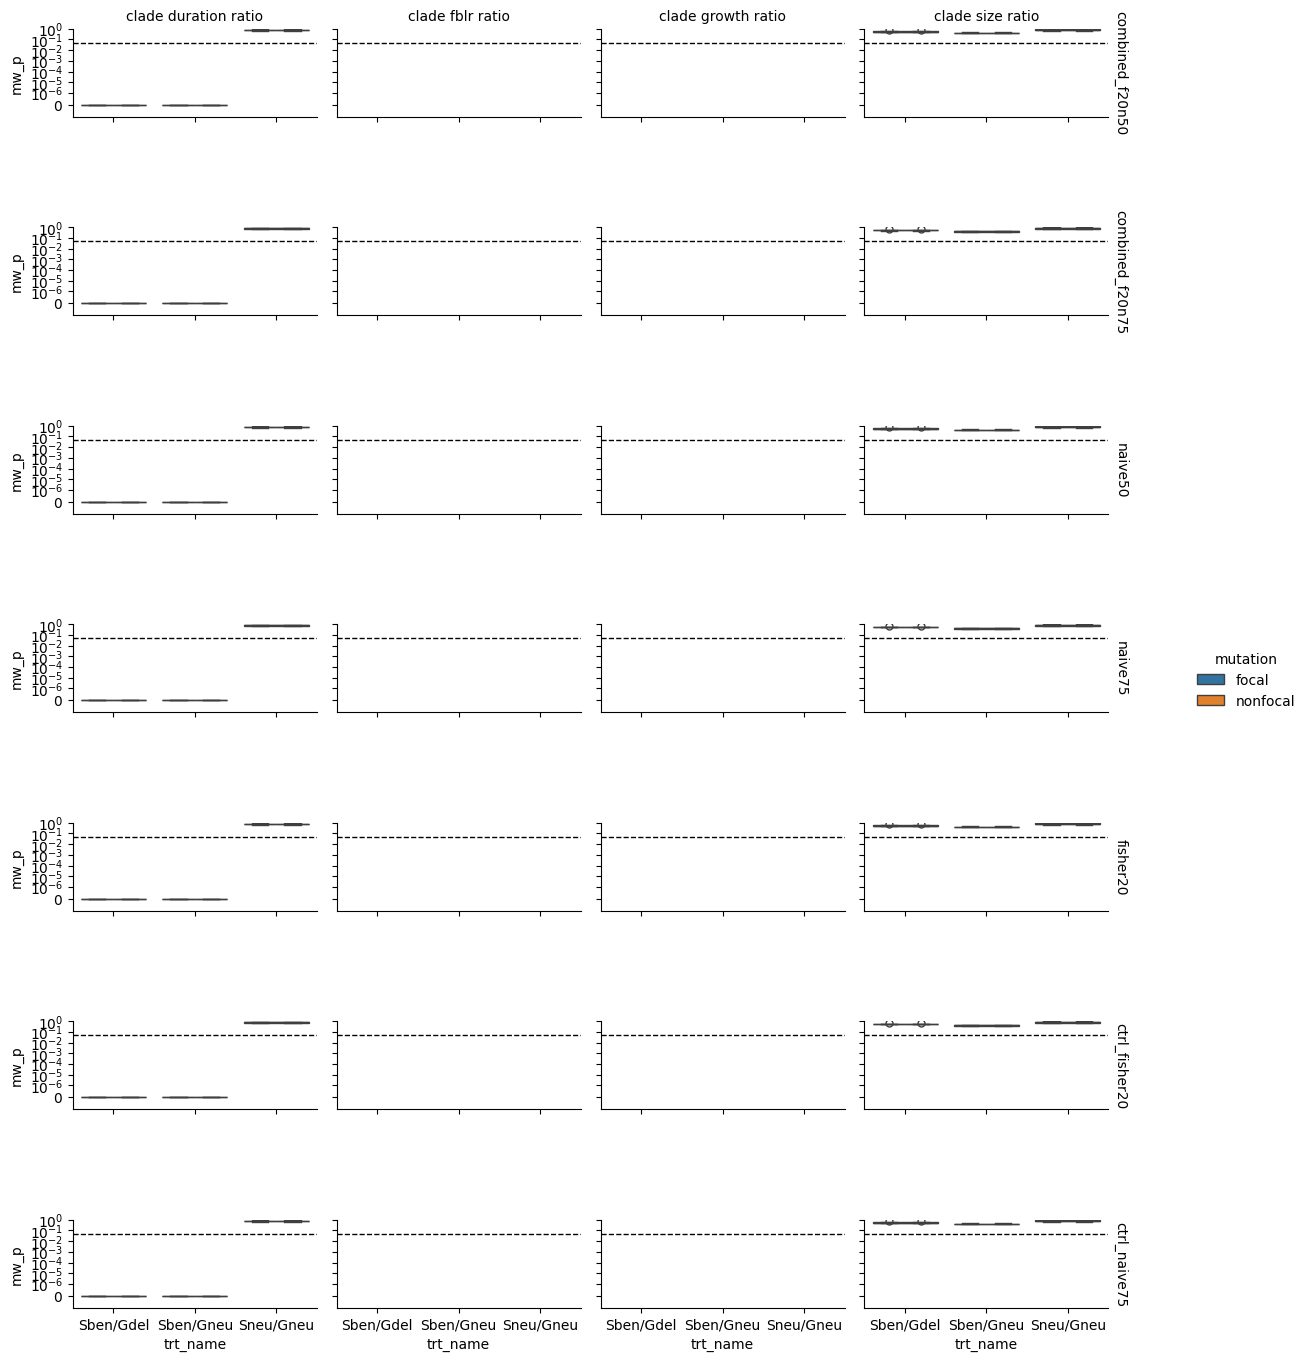

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.png


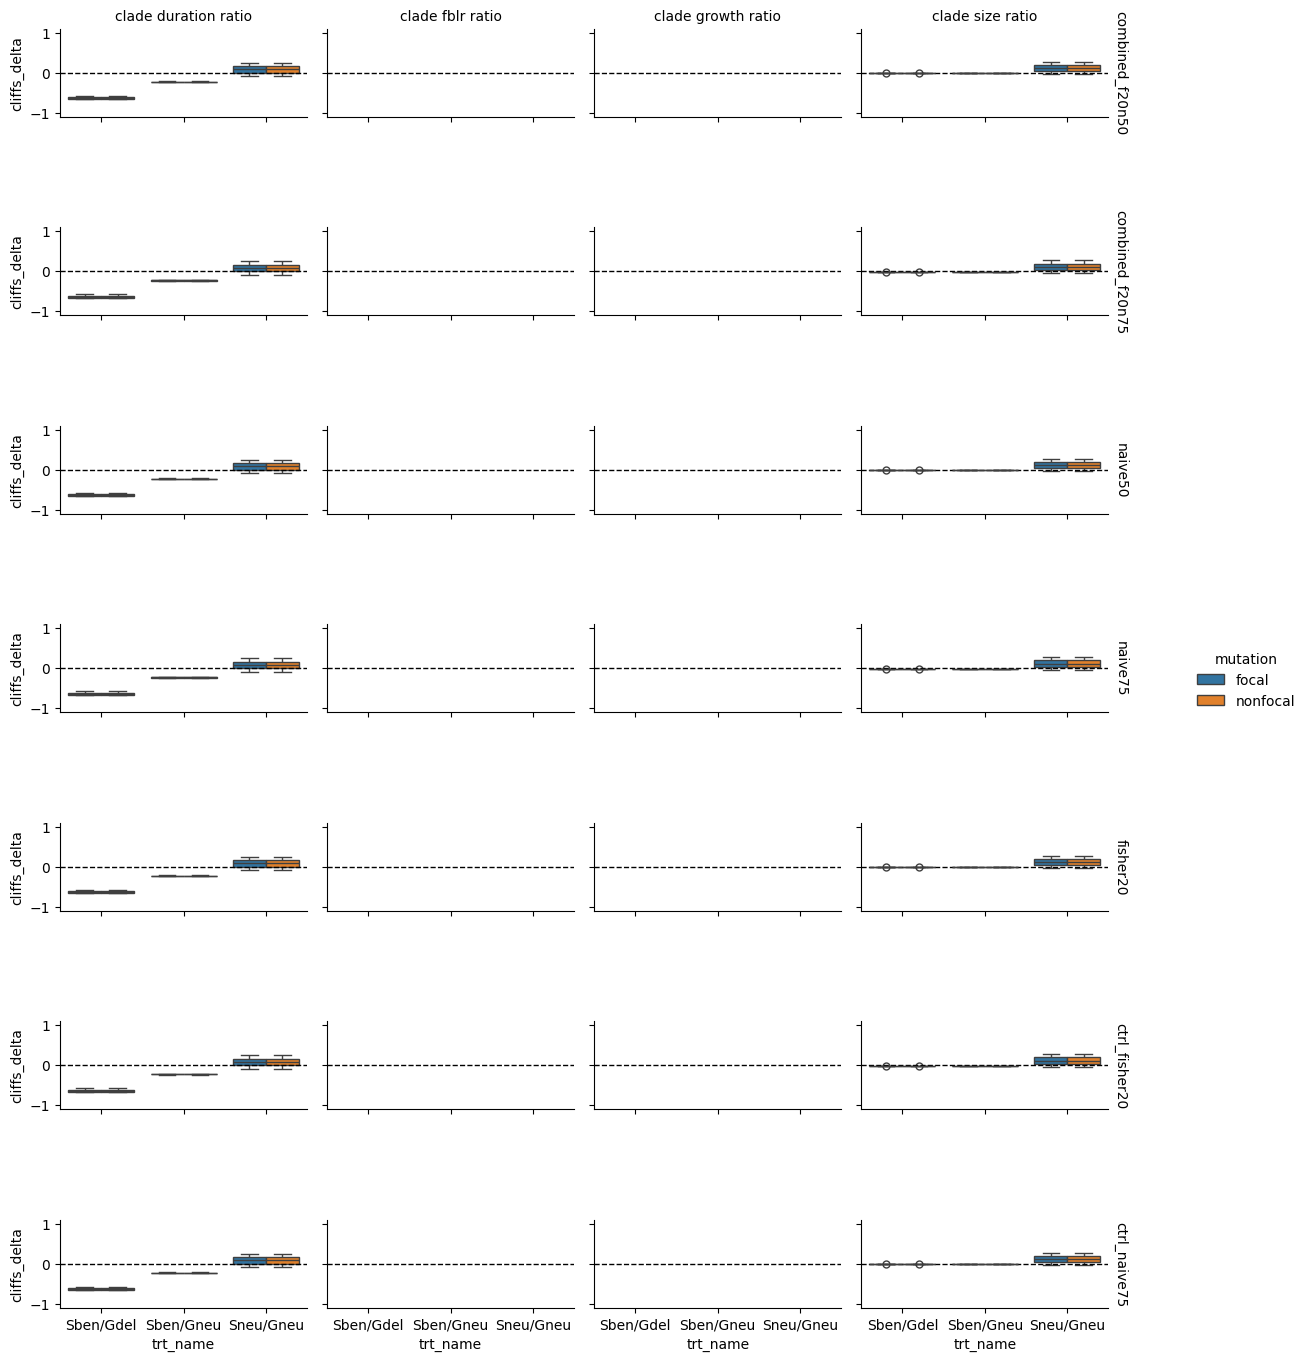

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.png


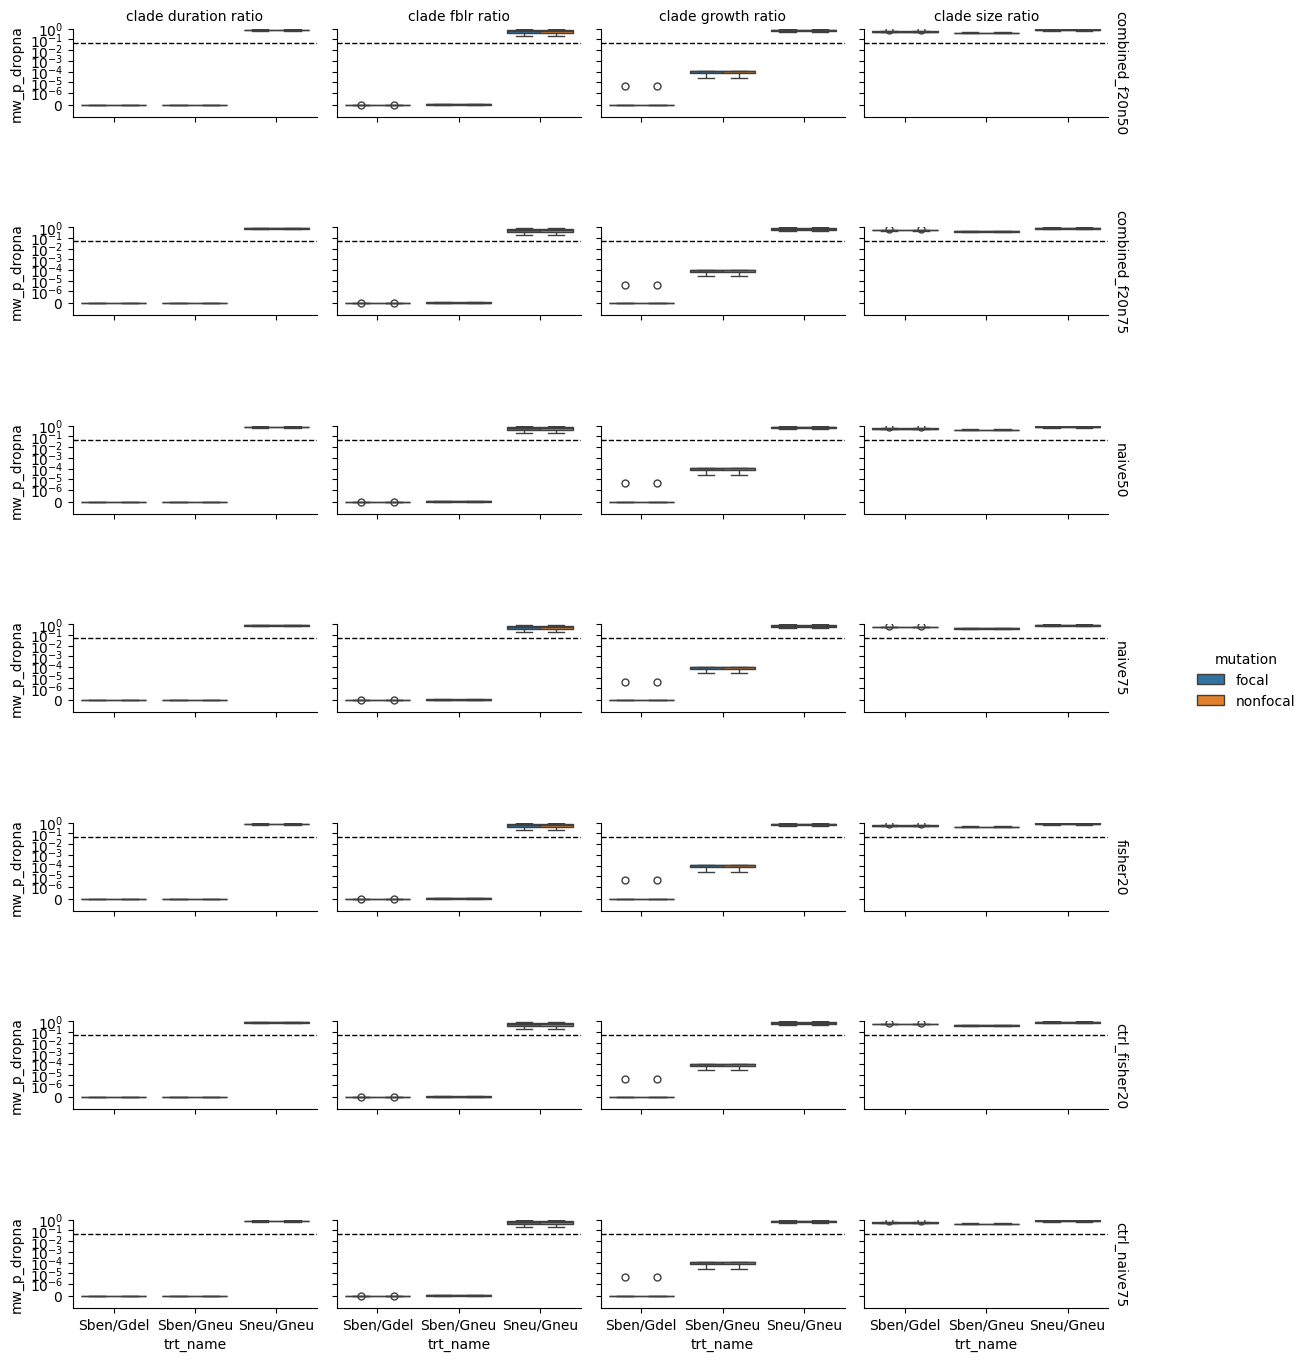

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.png


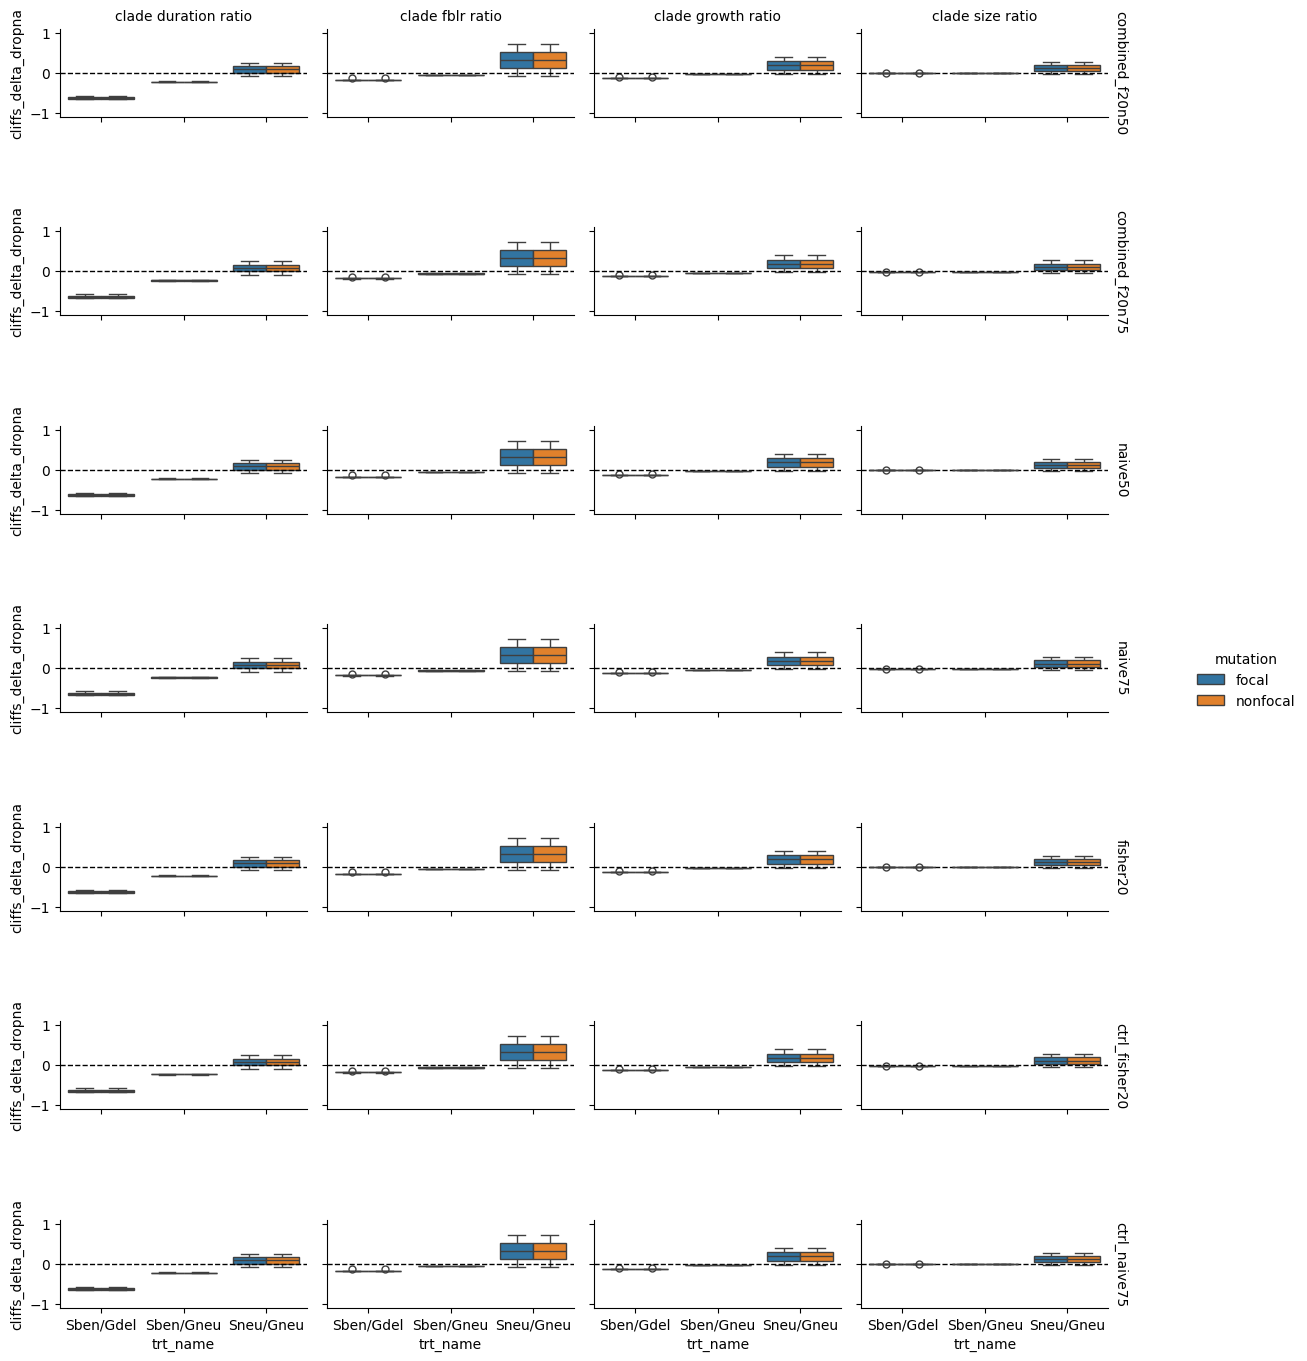

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.png


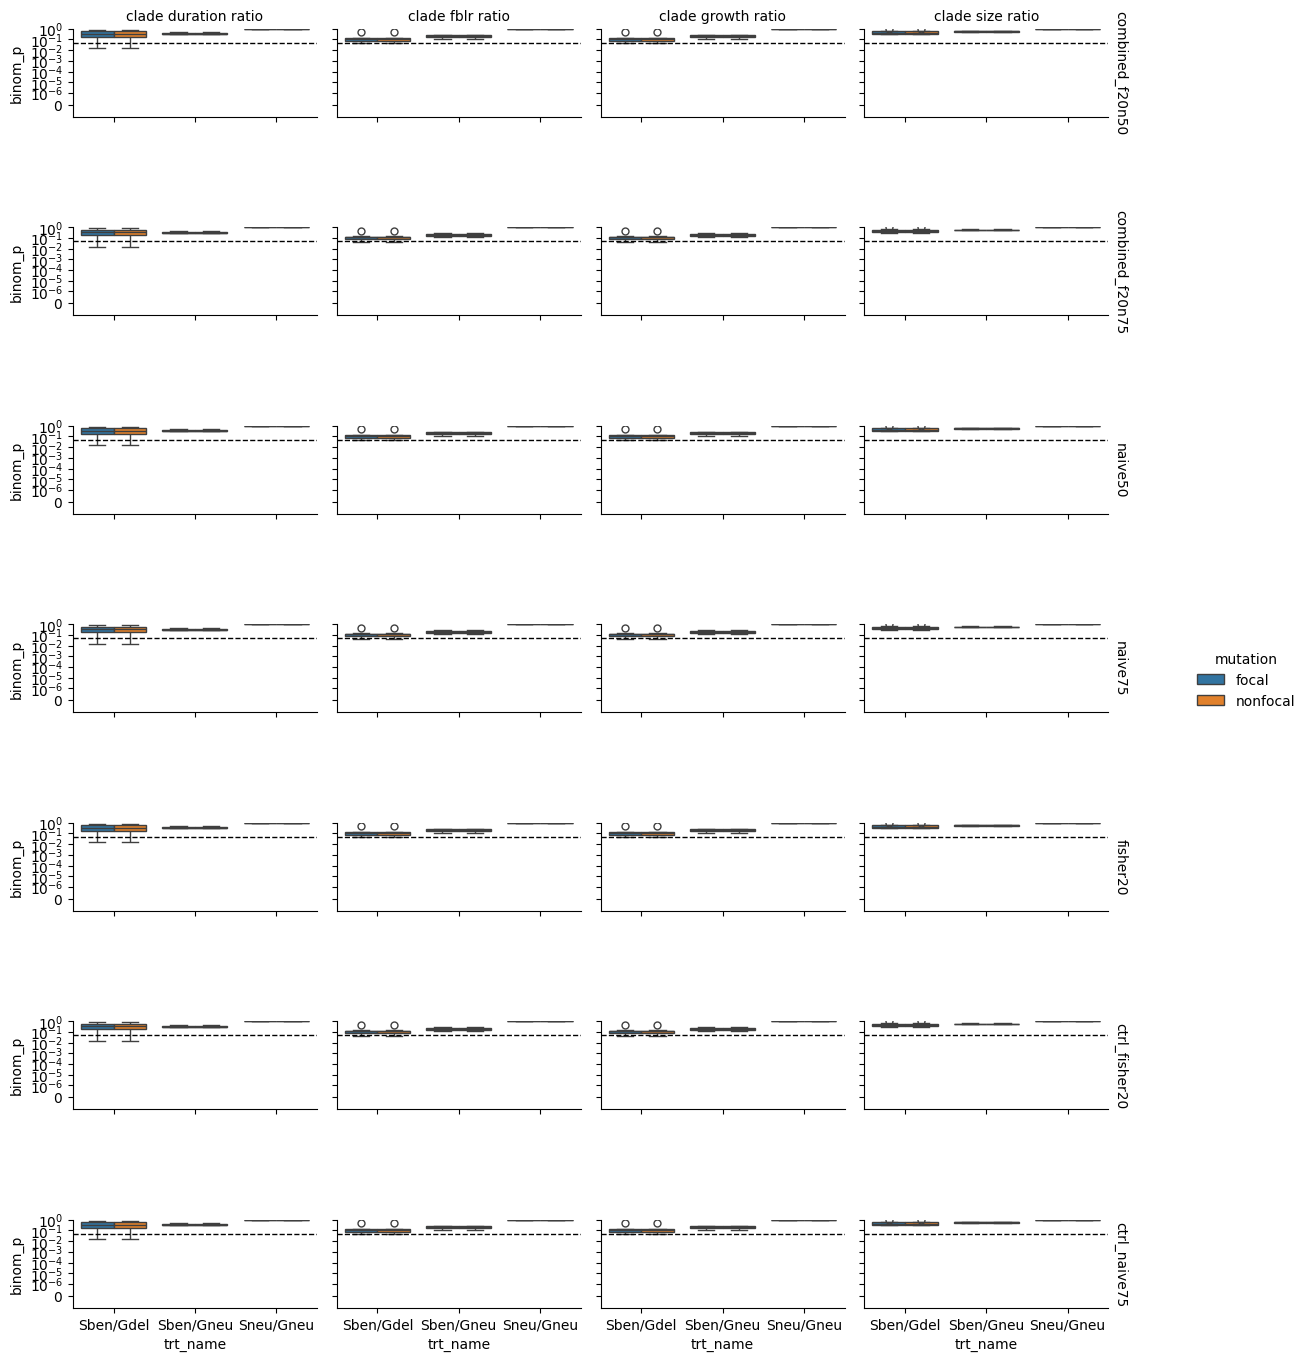

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.png


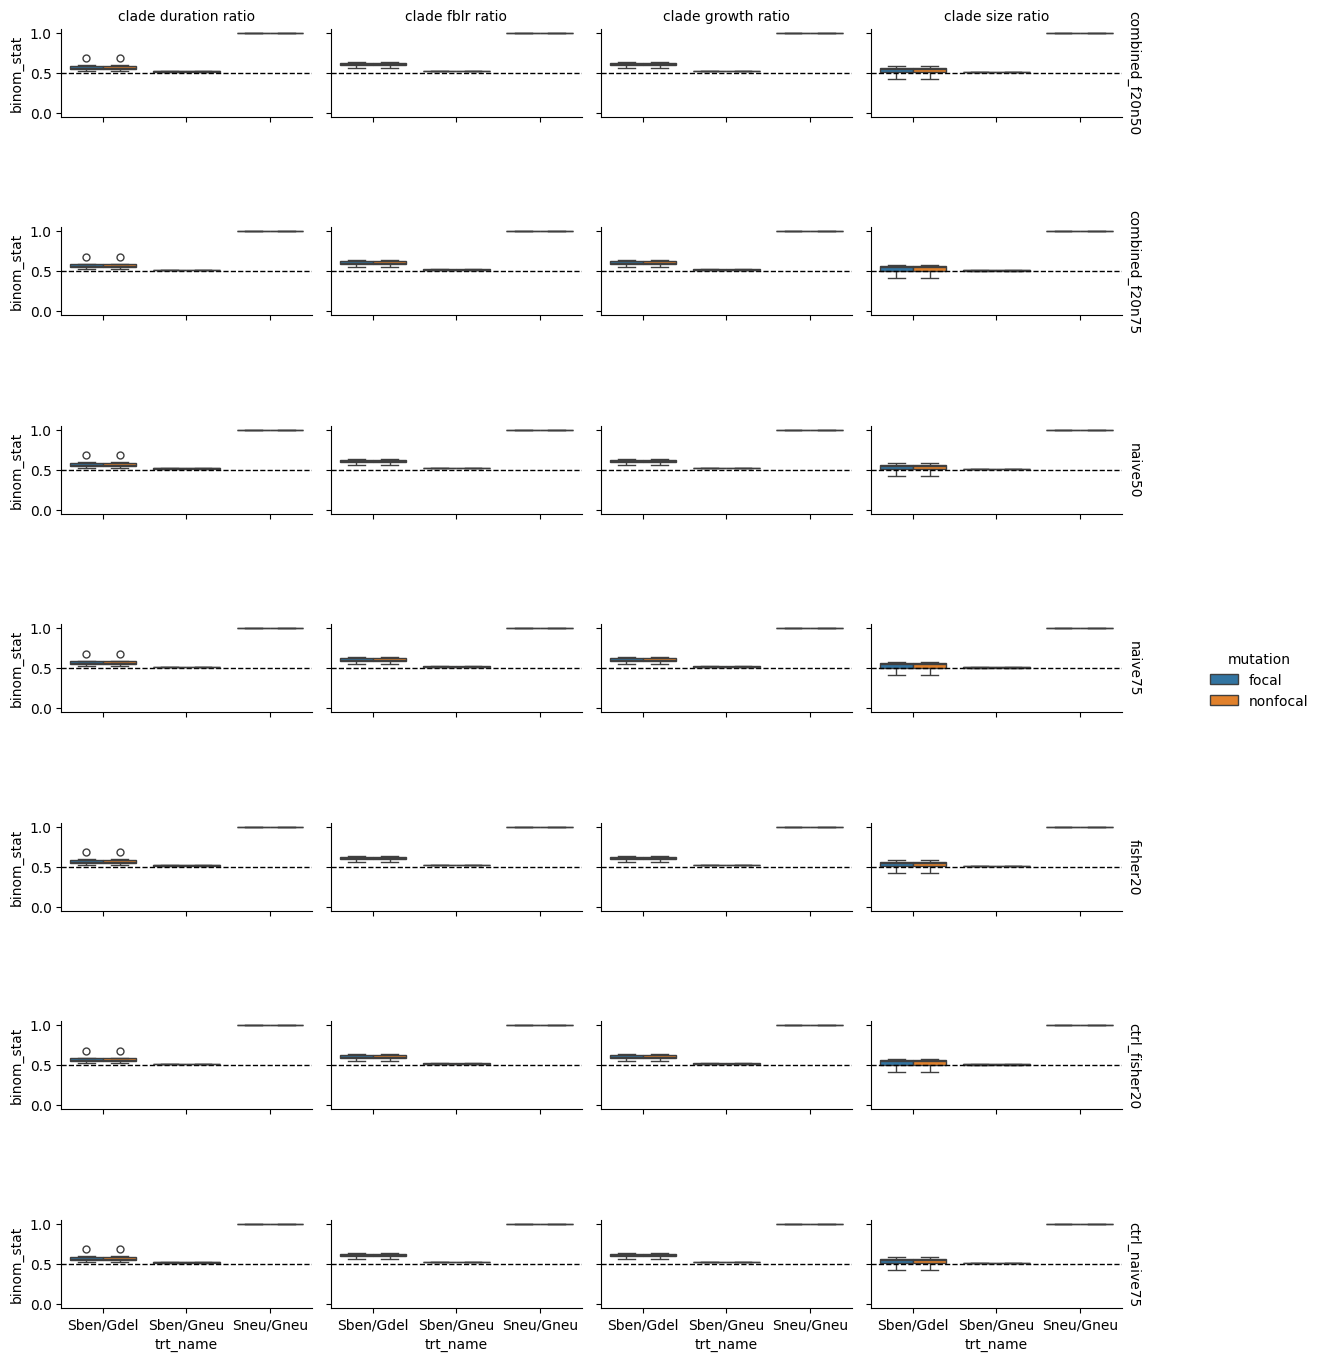

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.png


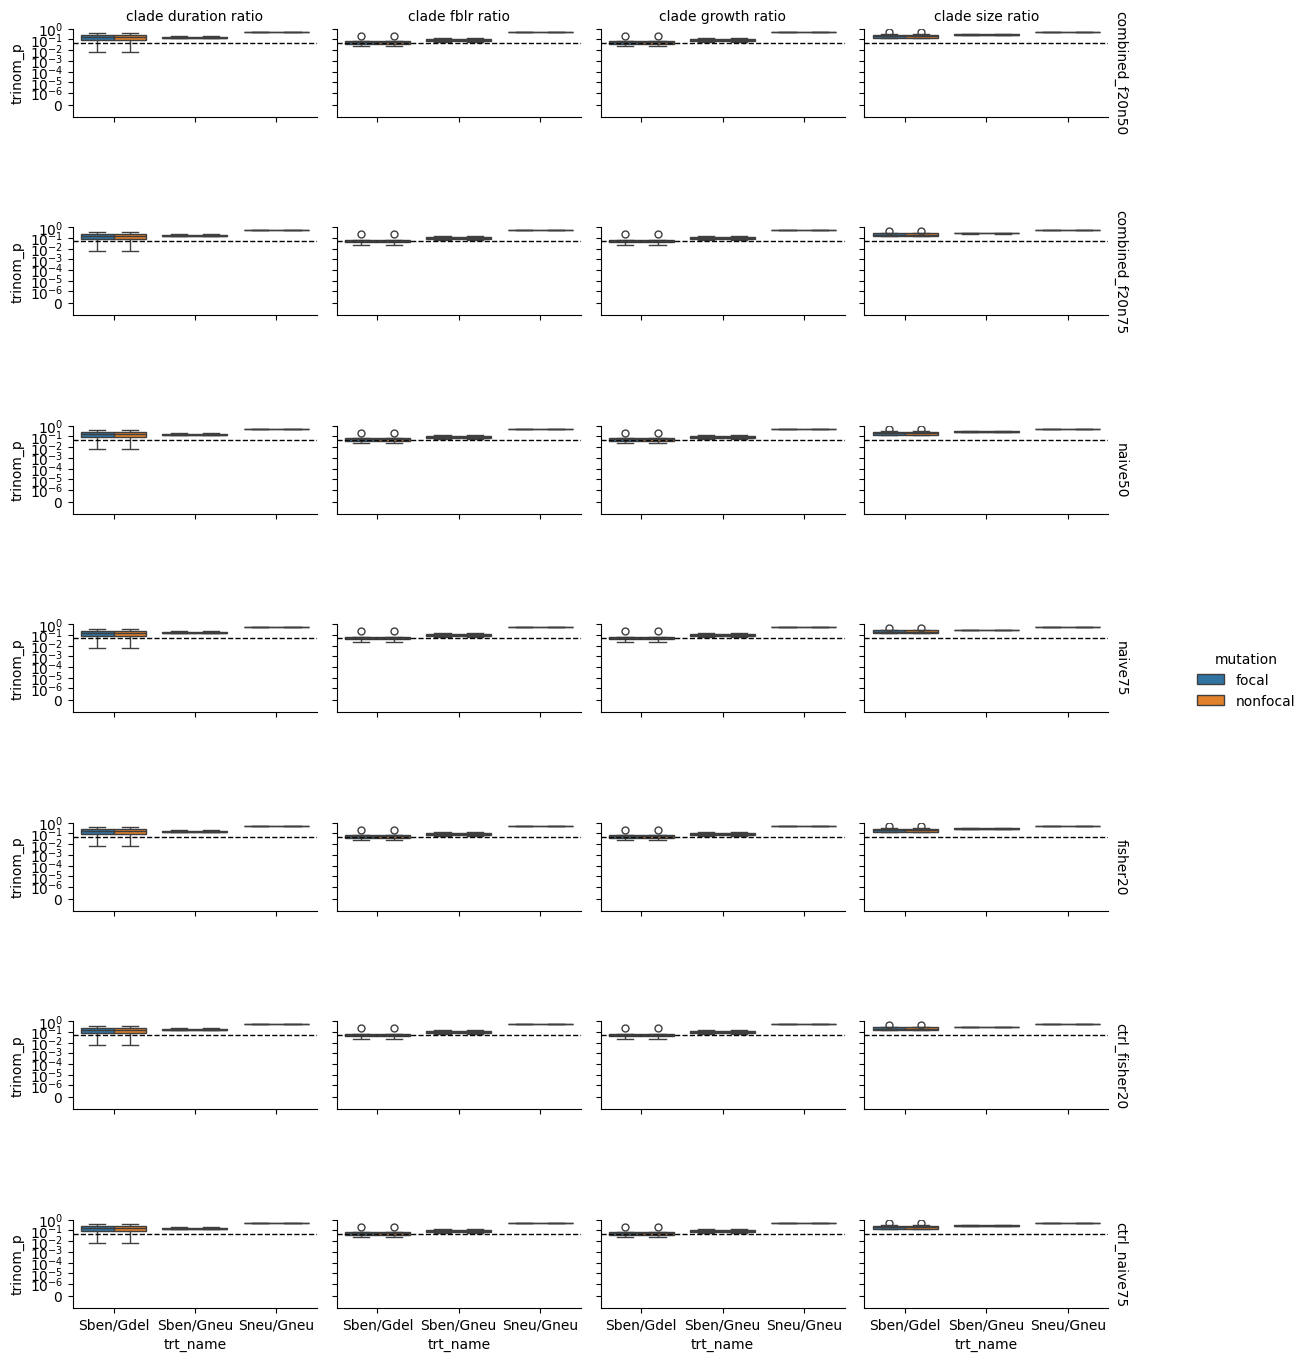

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.png


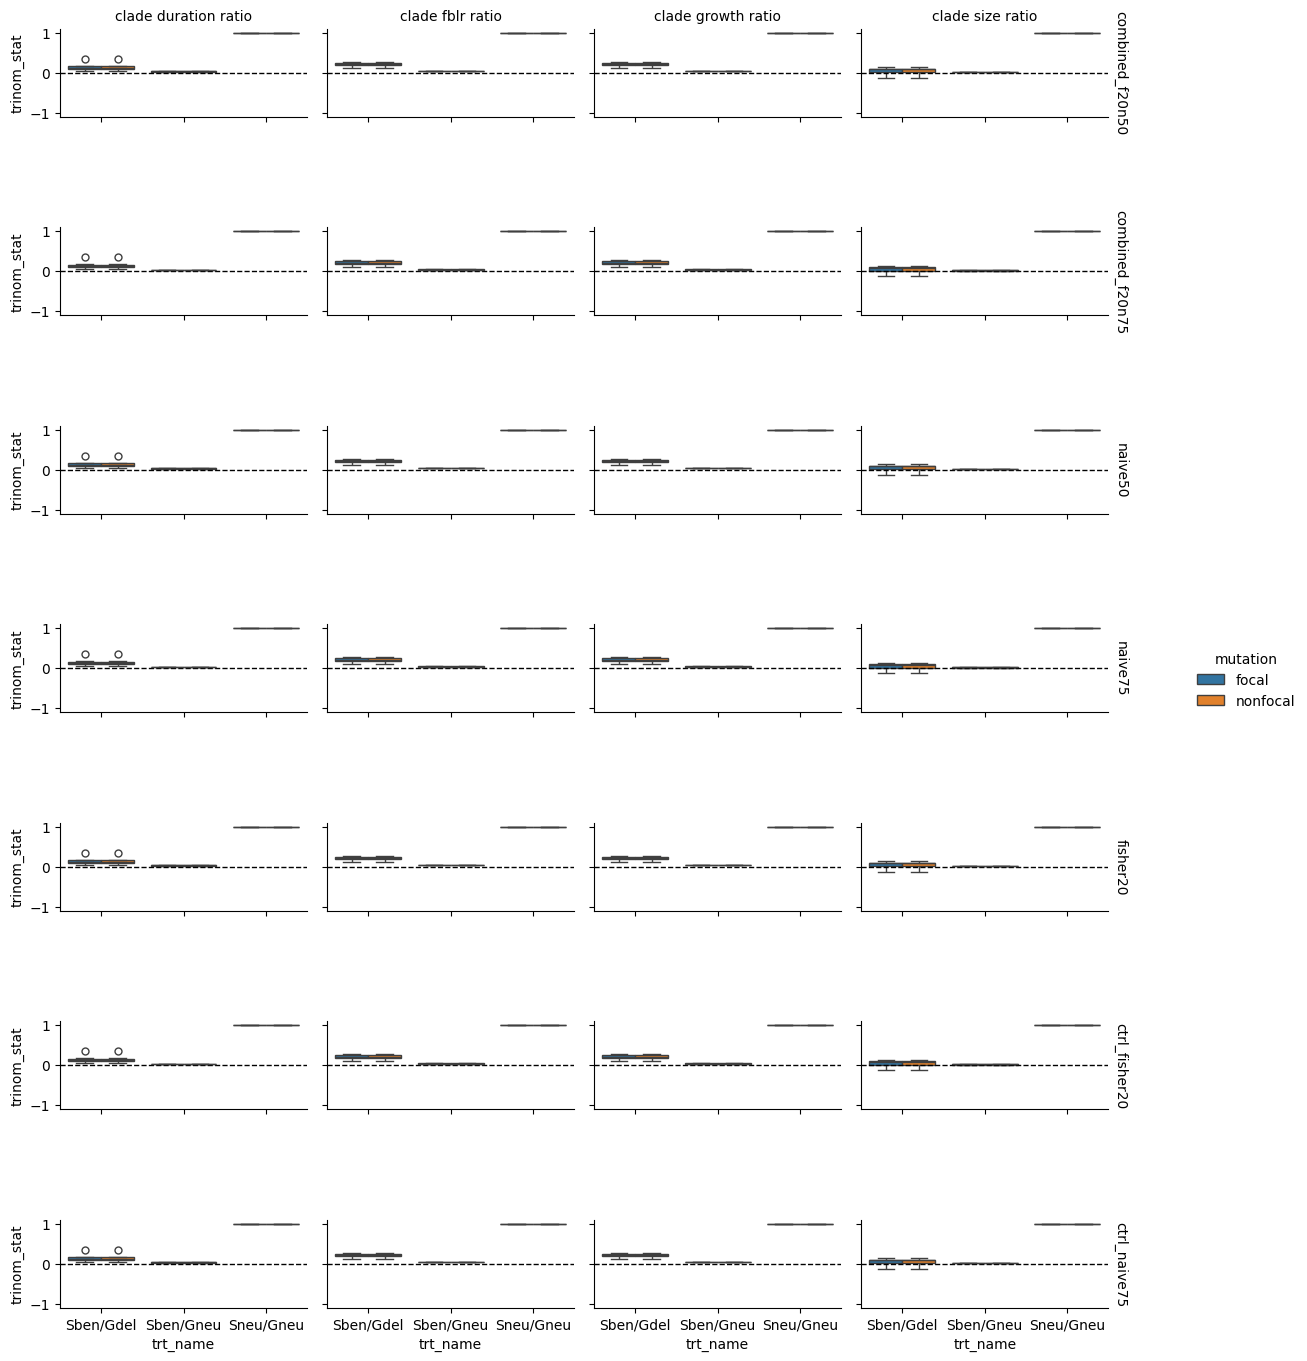

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.png


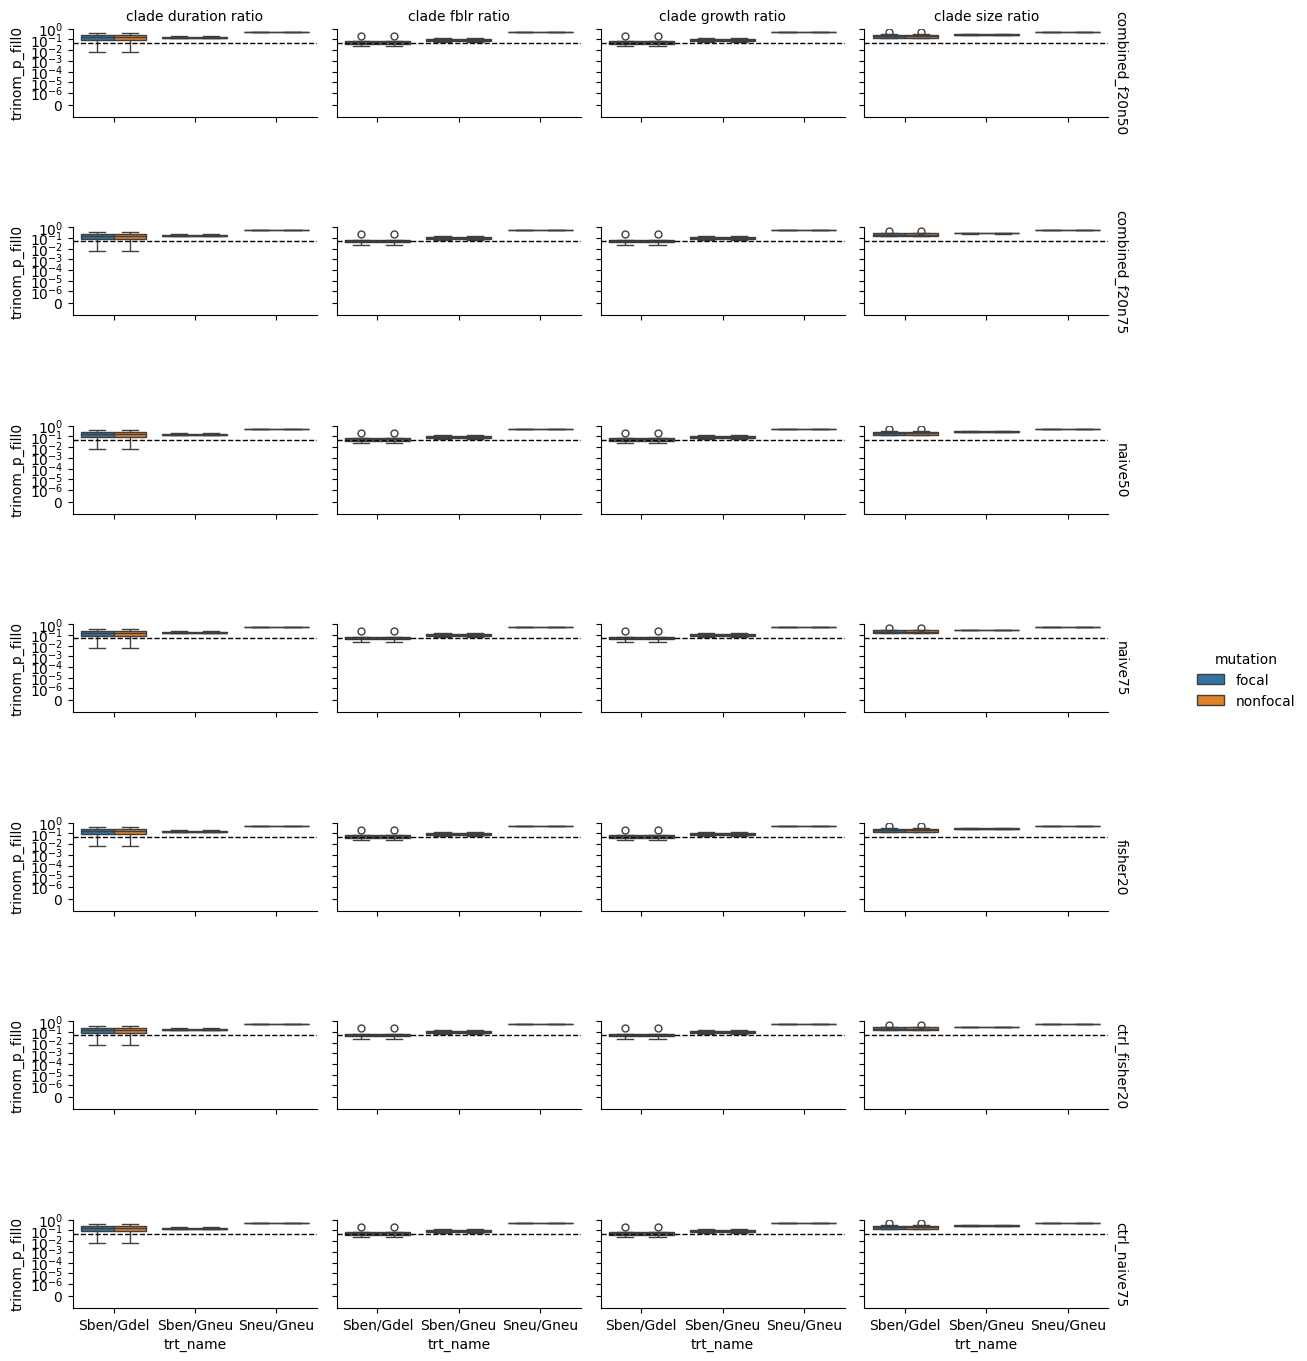

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.png


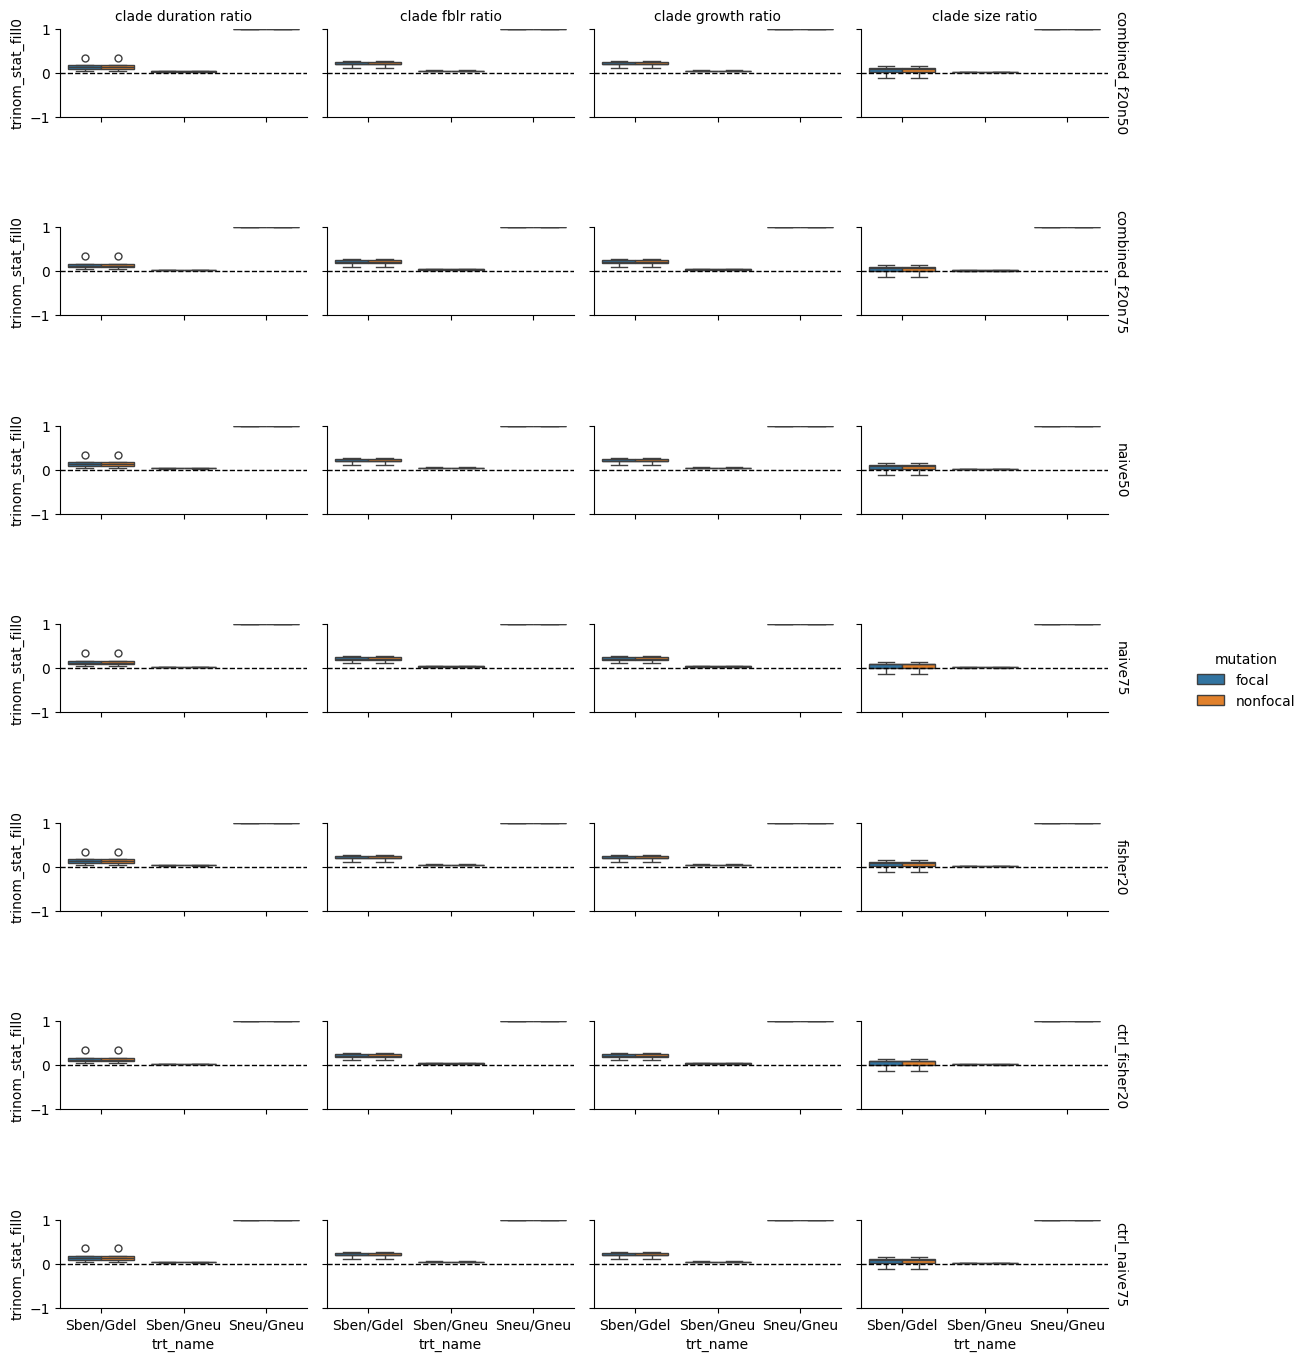

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.png


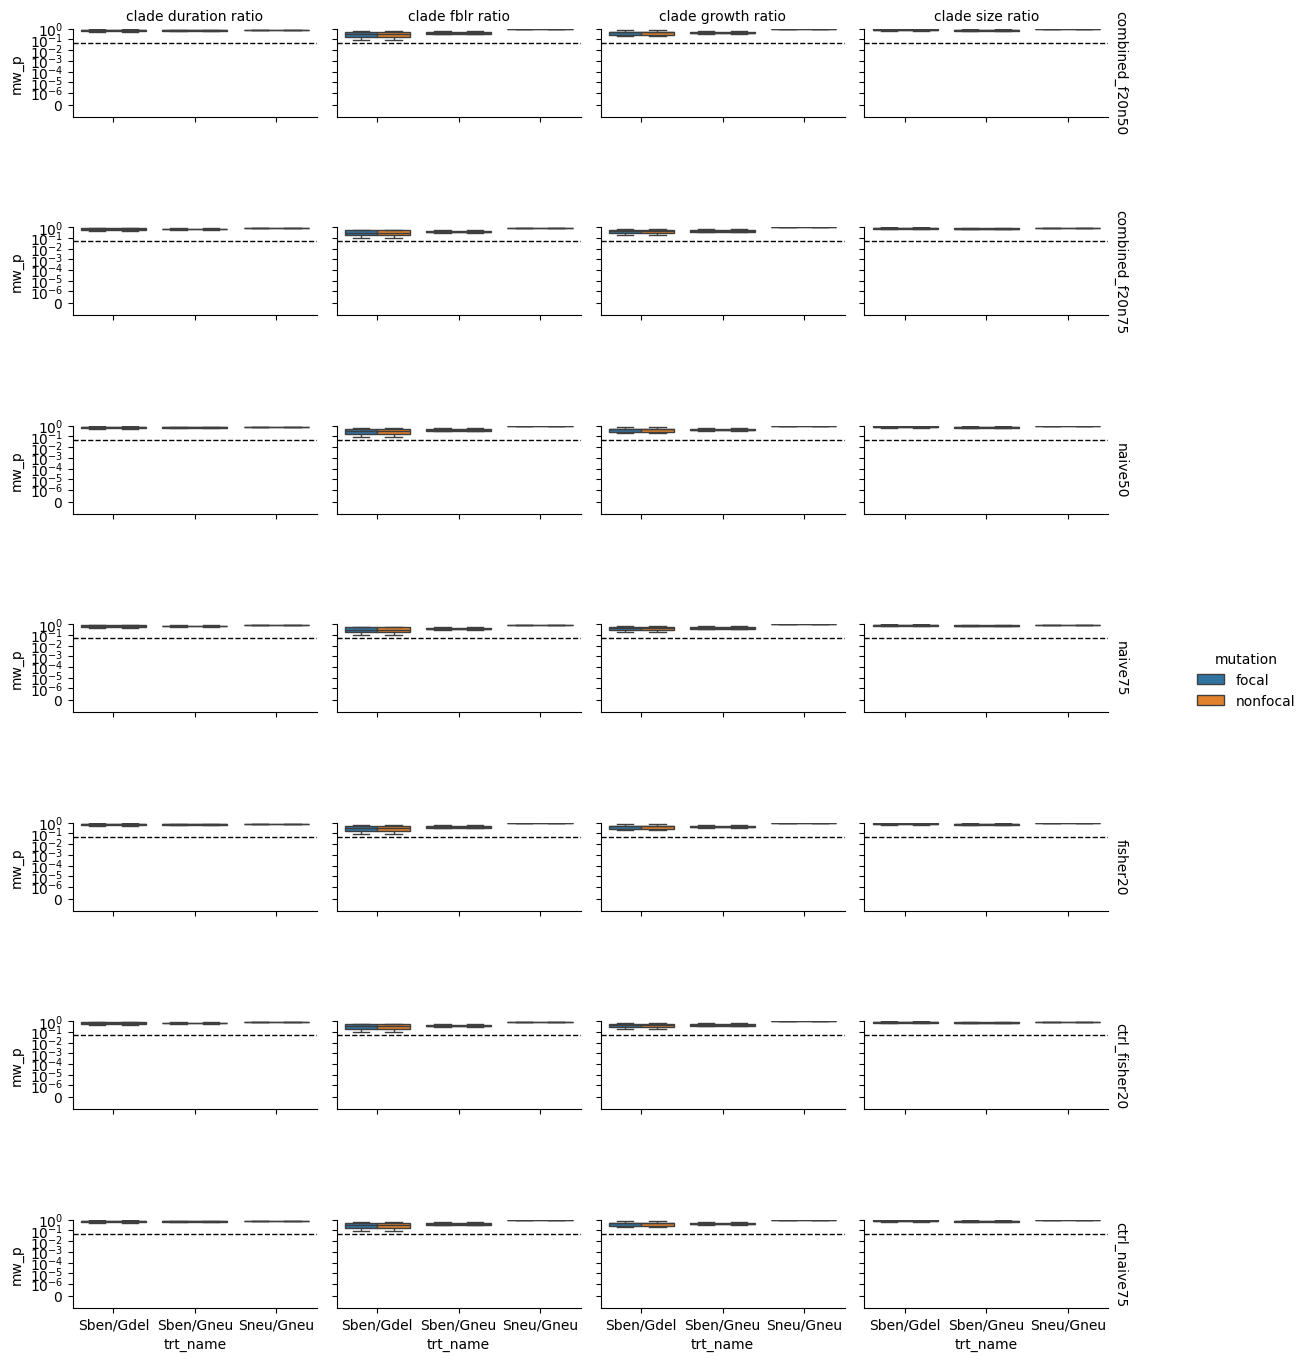

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.png


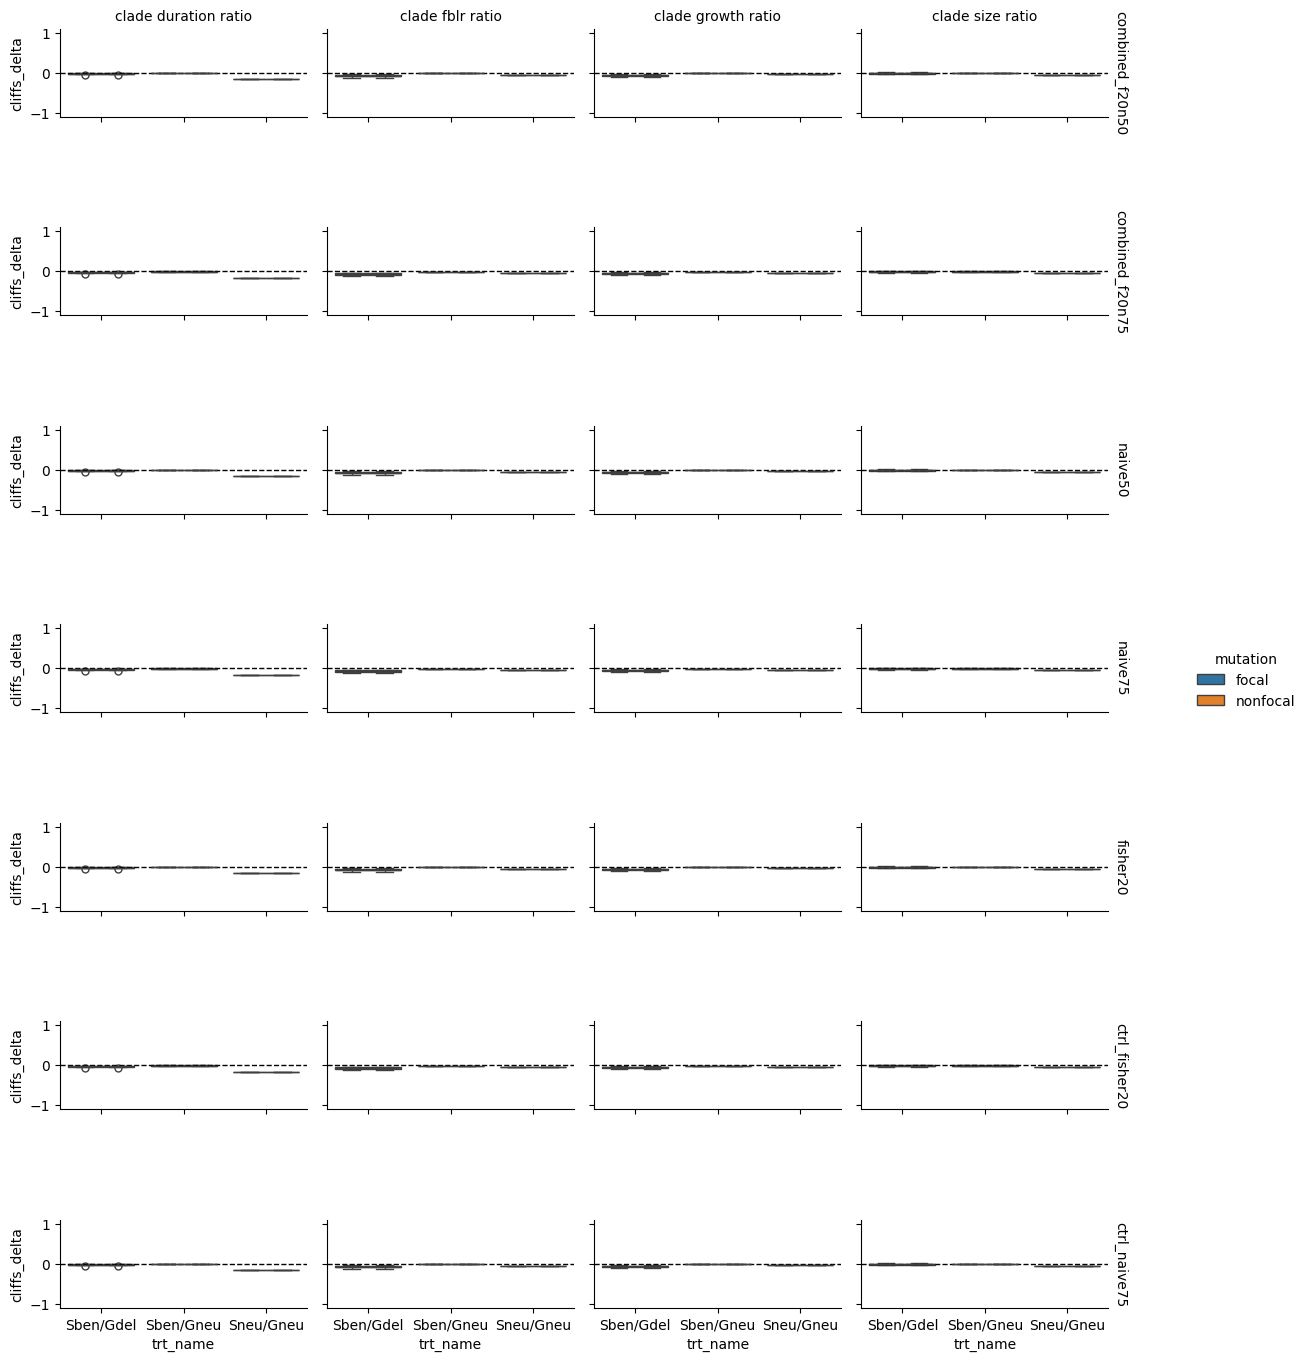

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.png


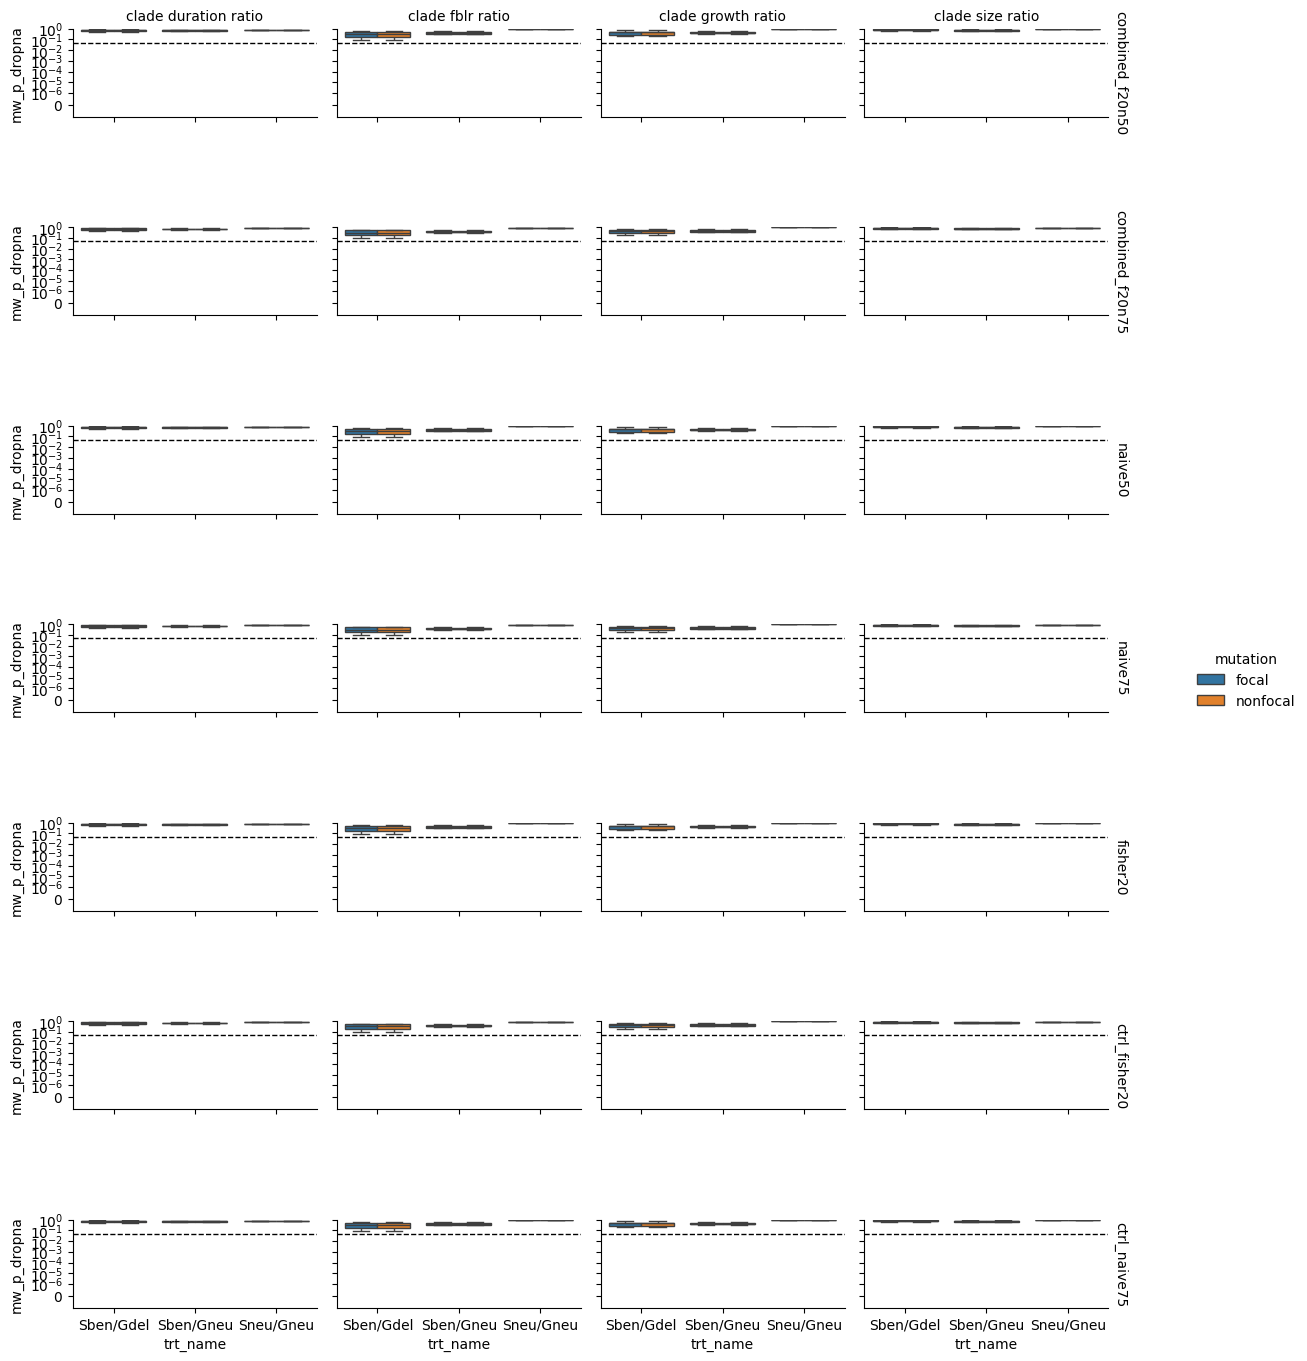

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.png


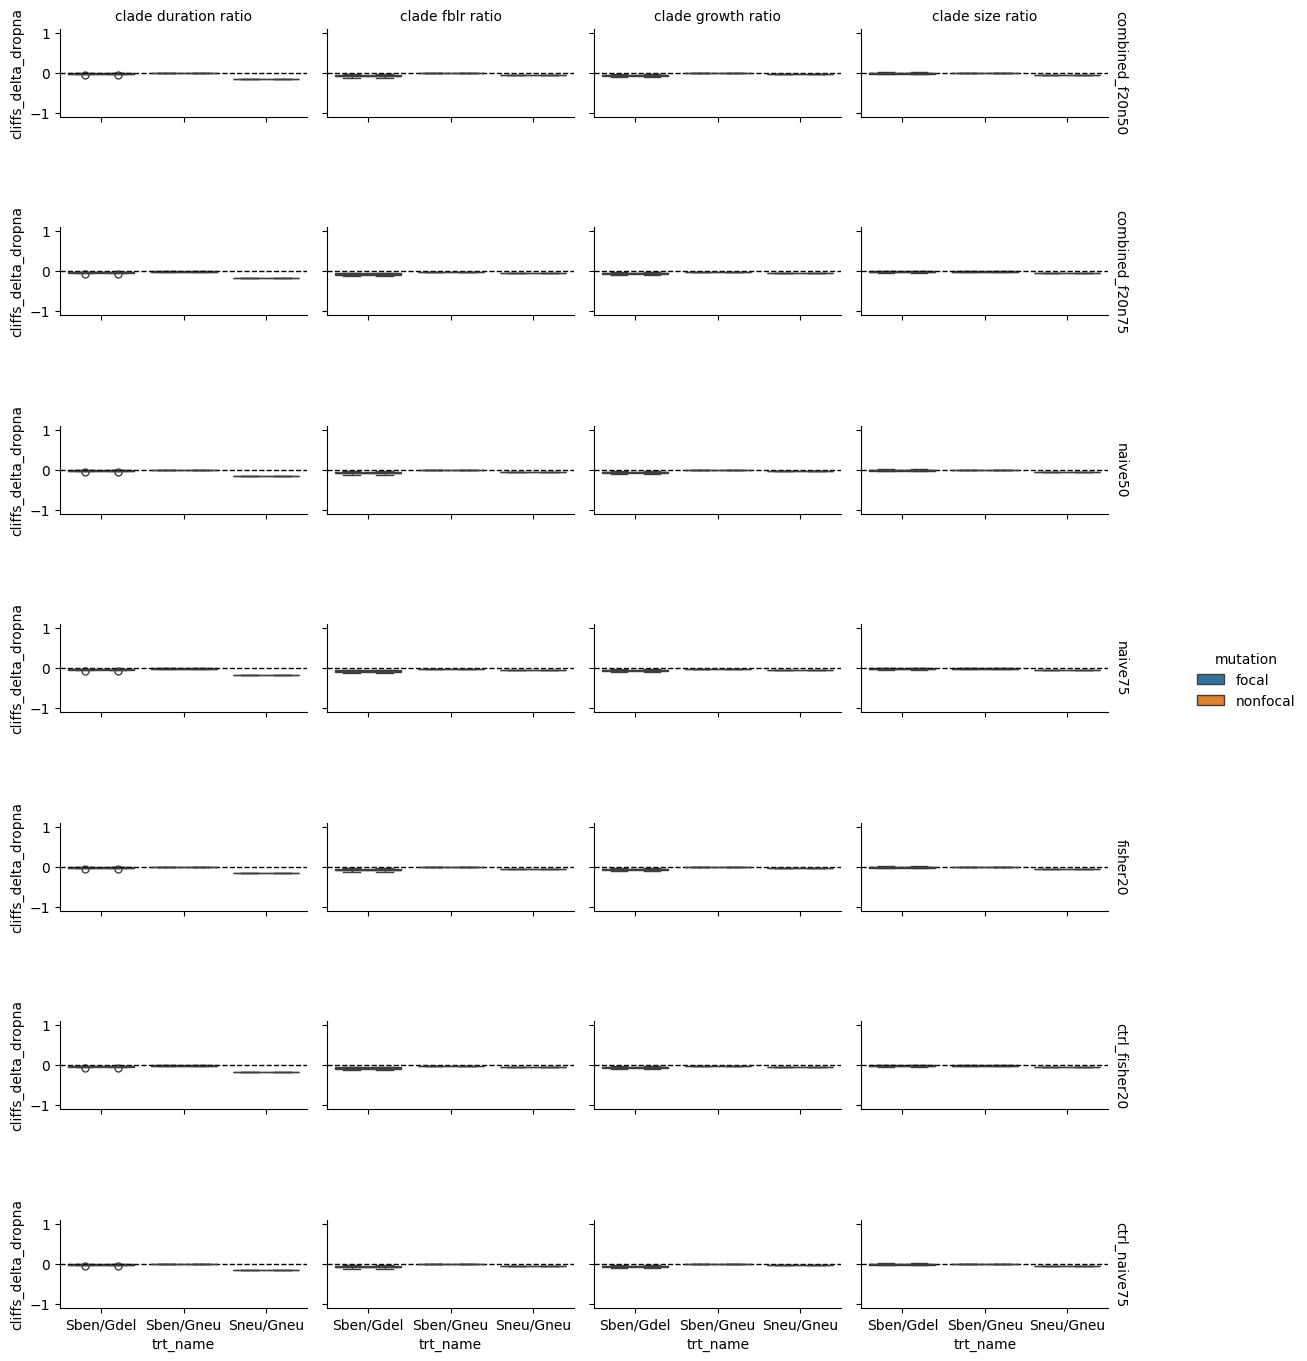

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.png


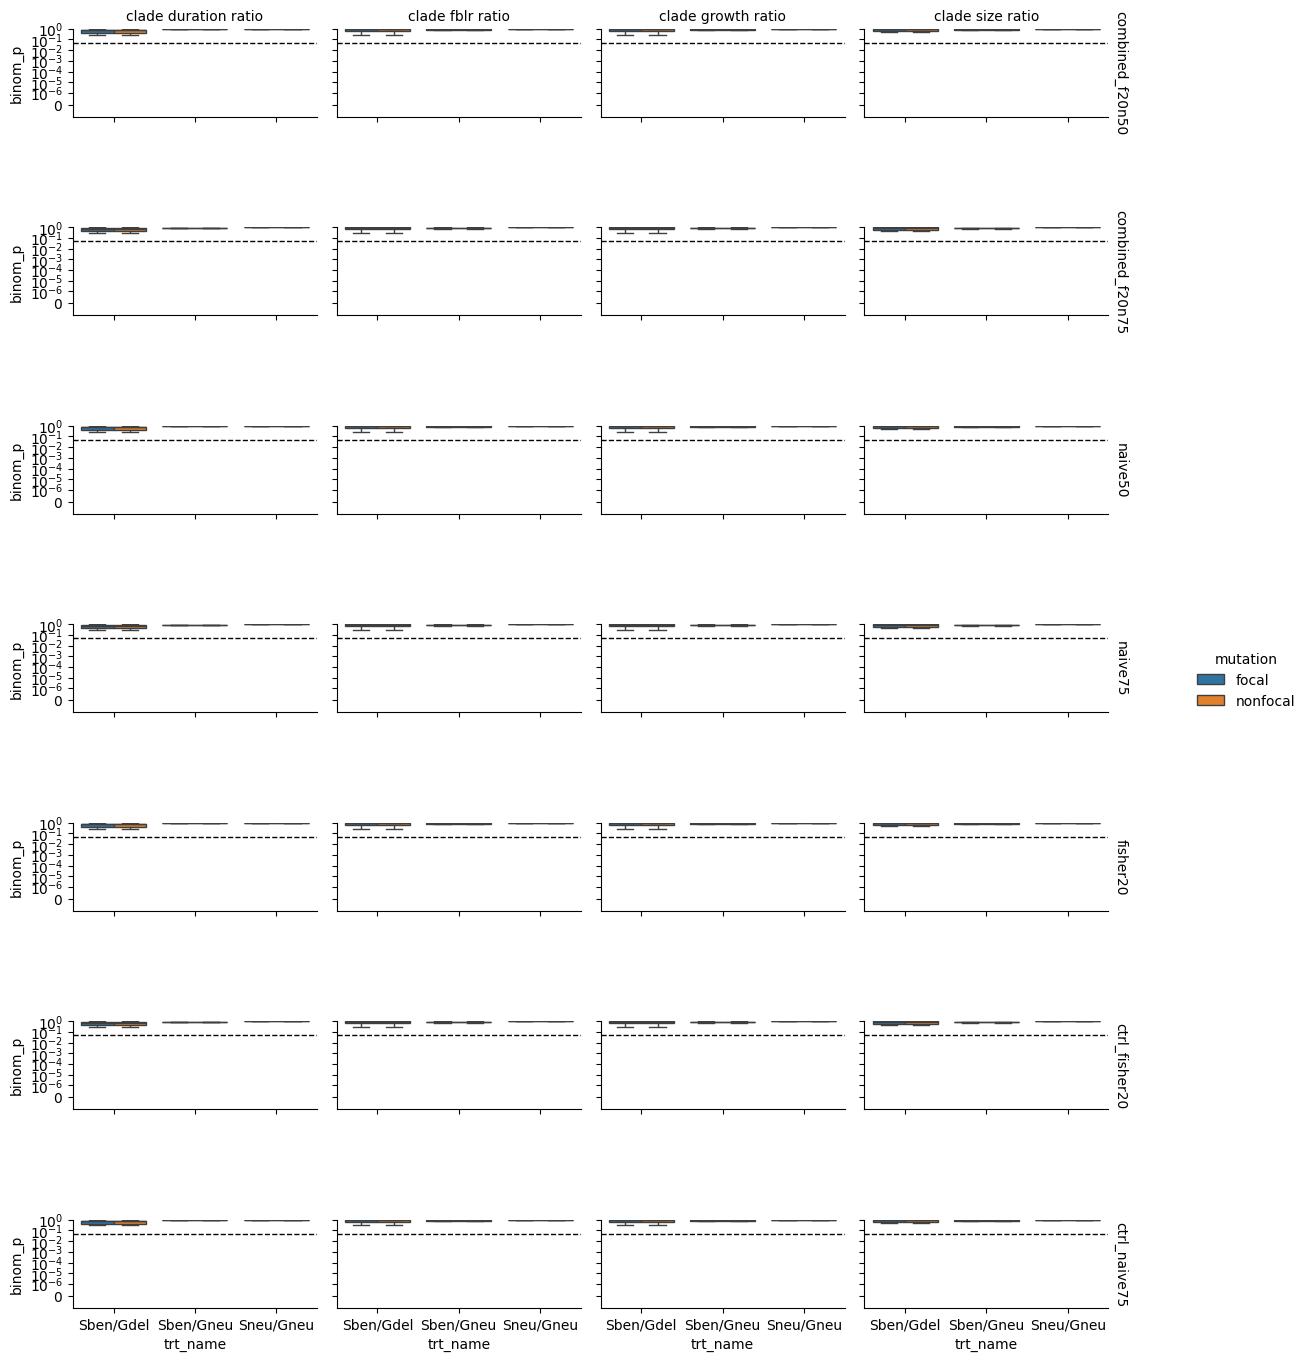

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.png


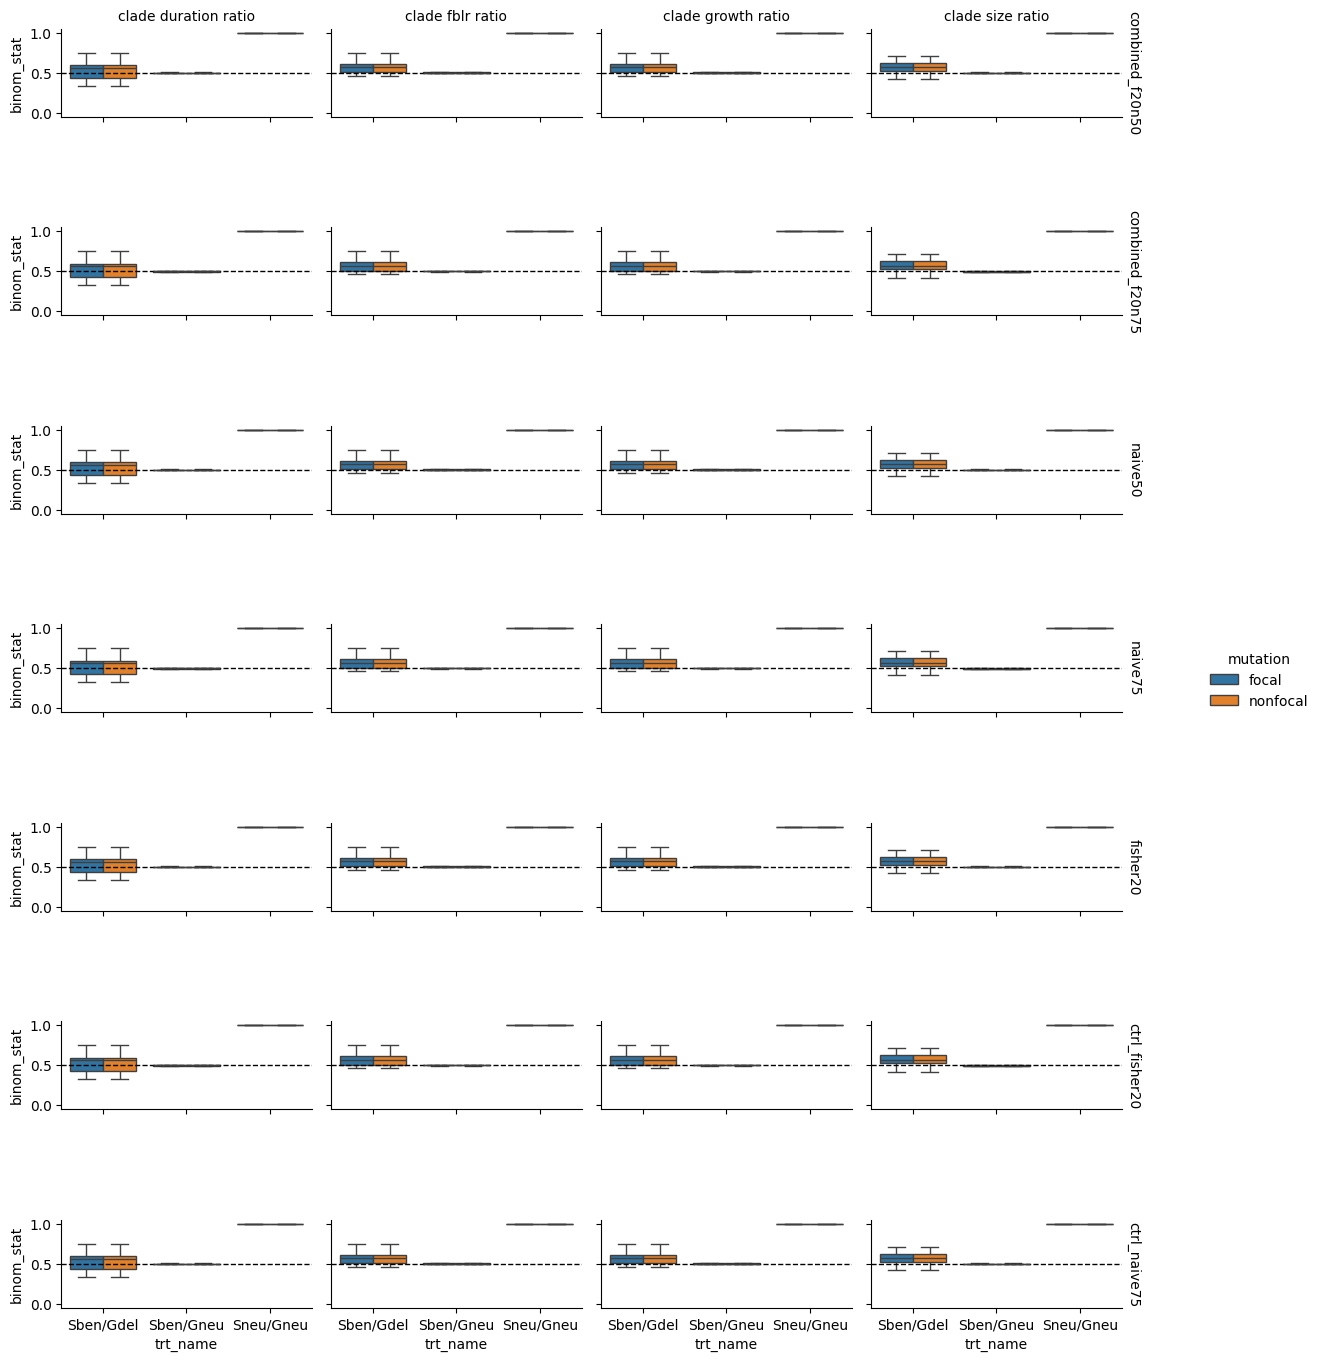

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.png


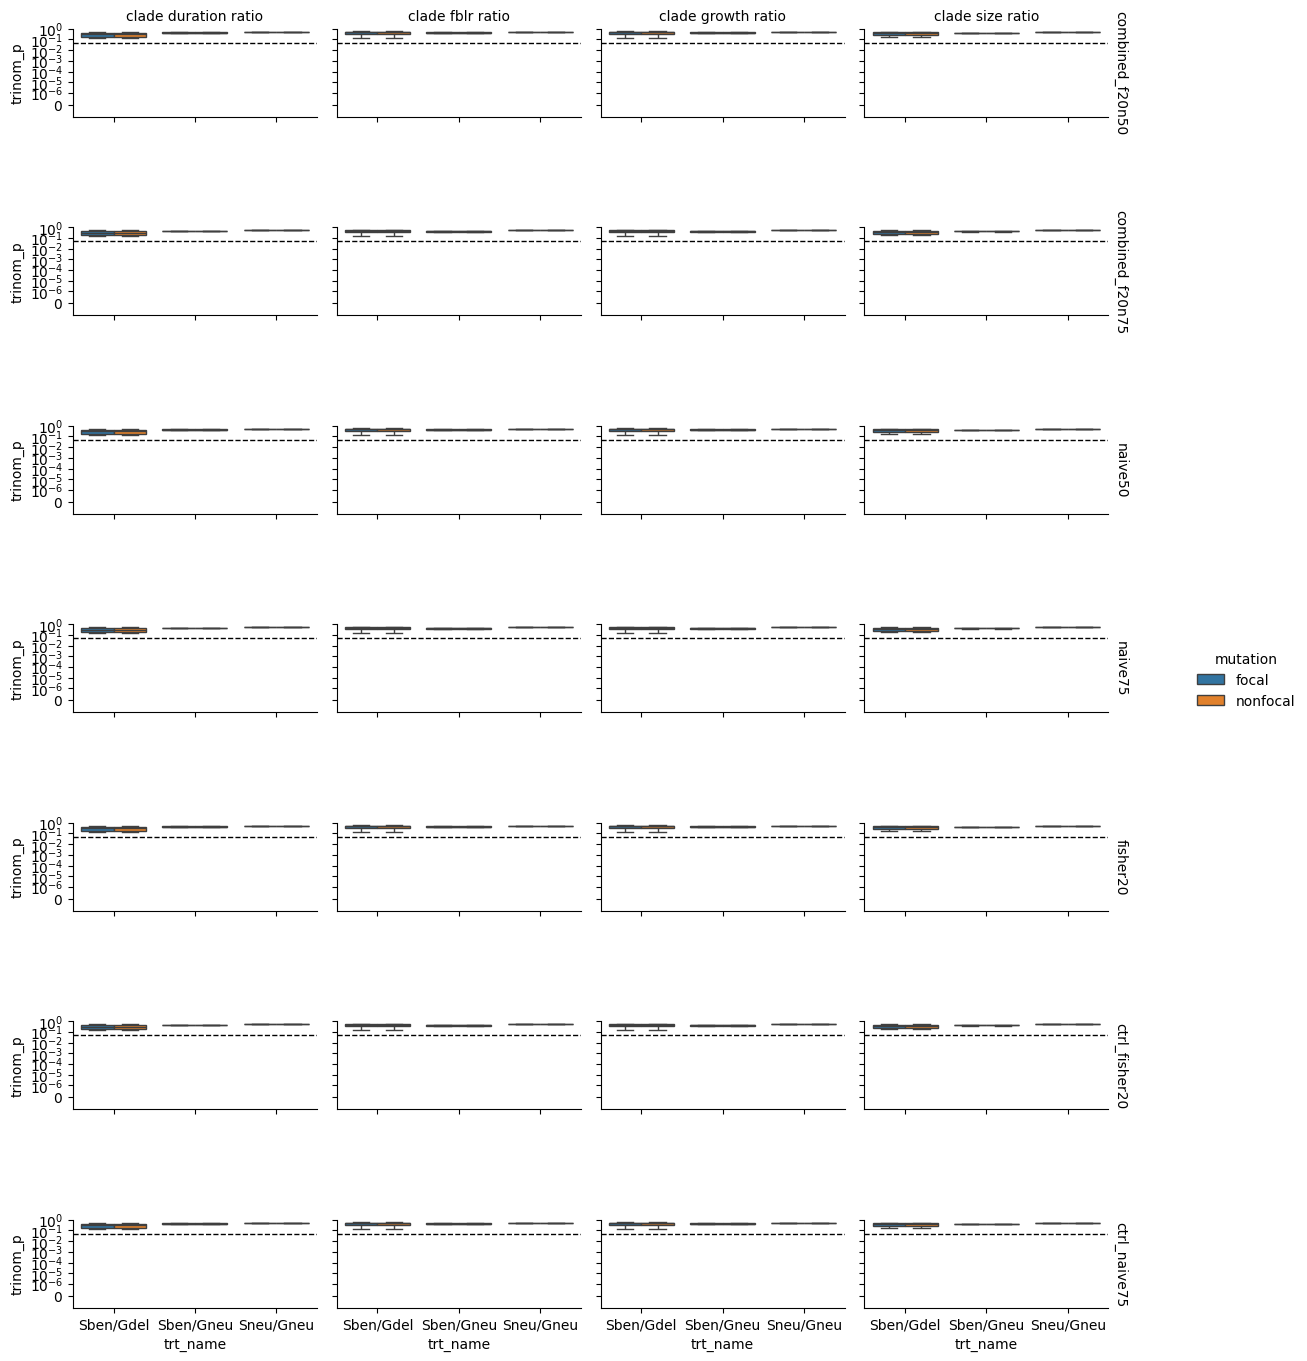

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.png


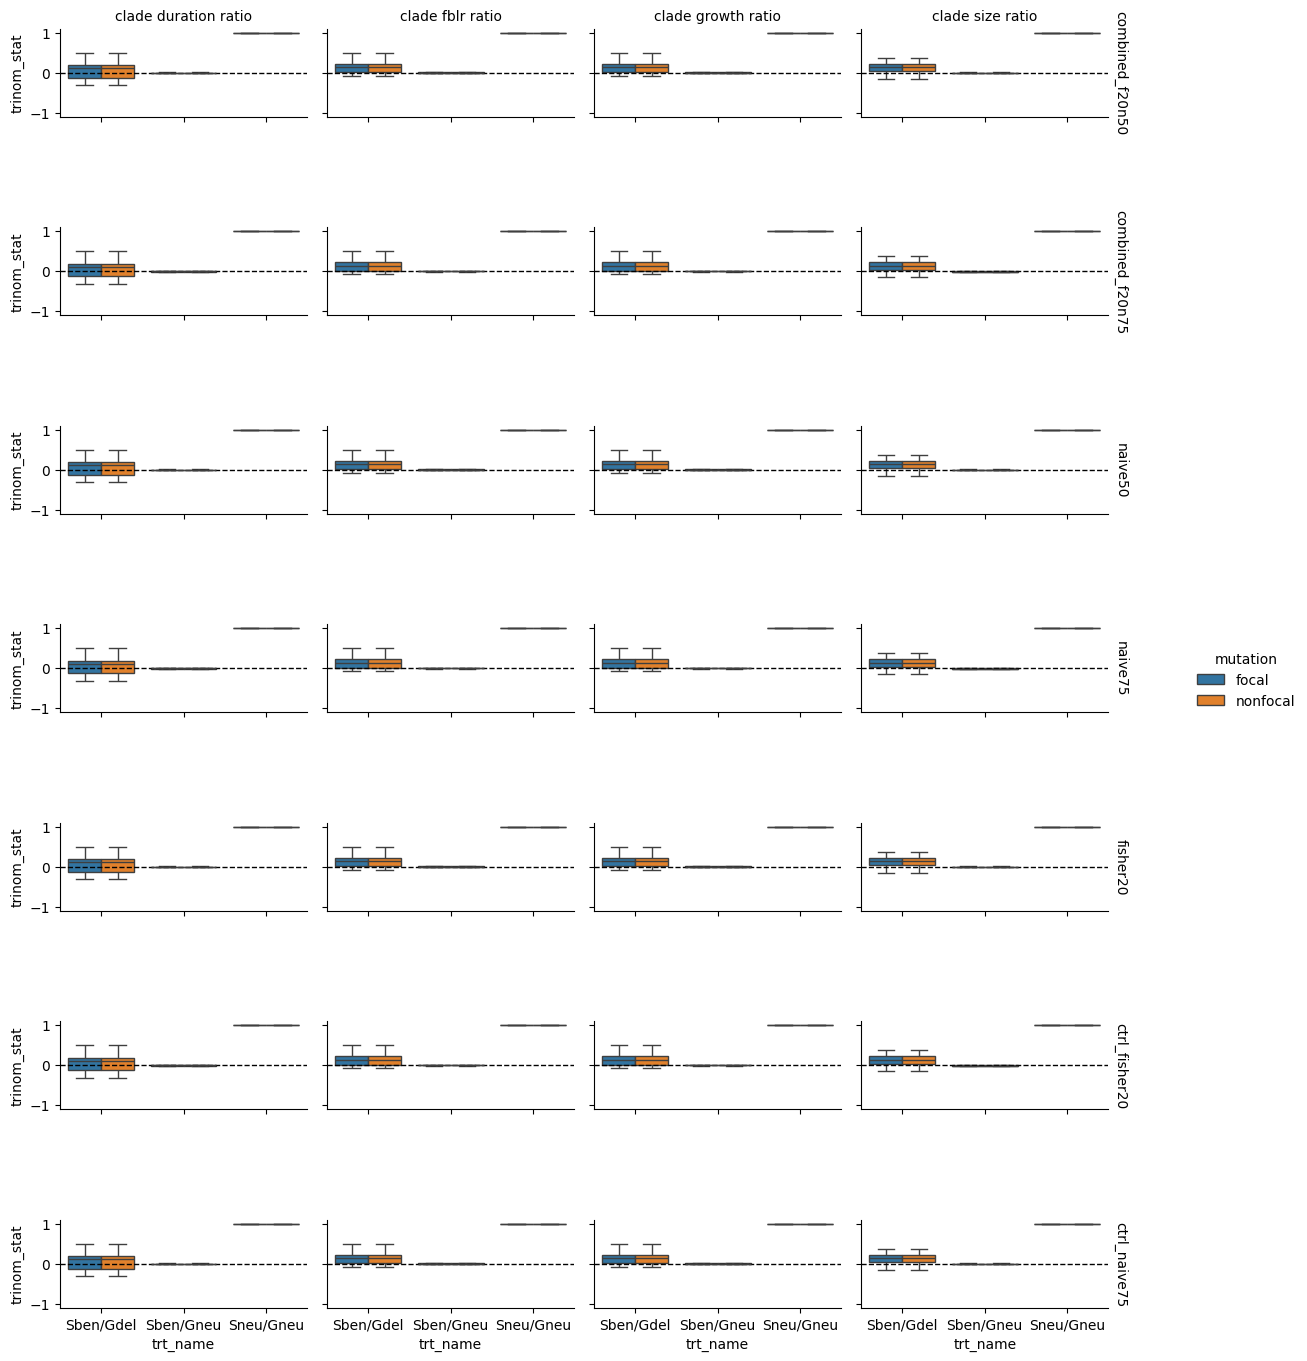

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.png


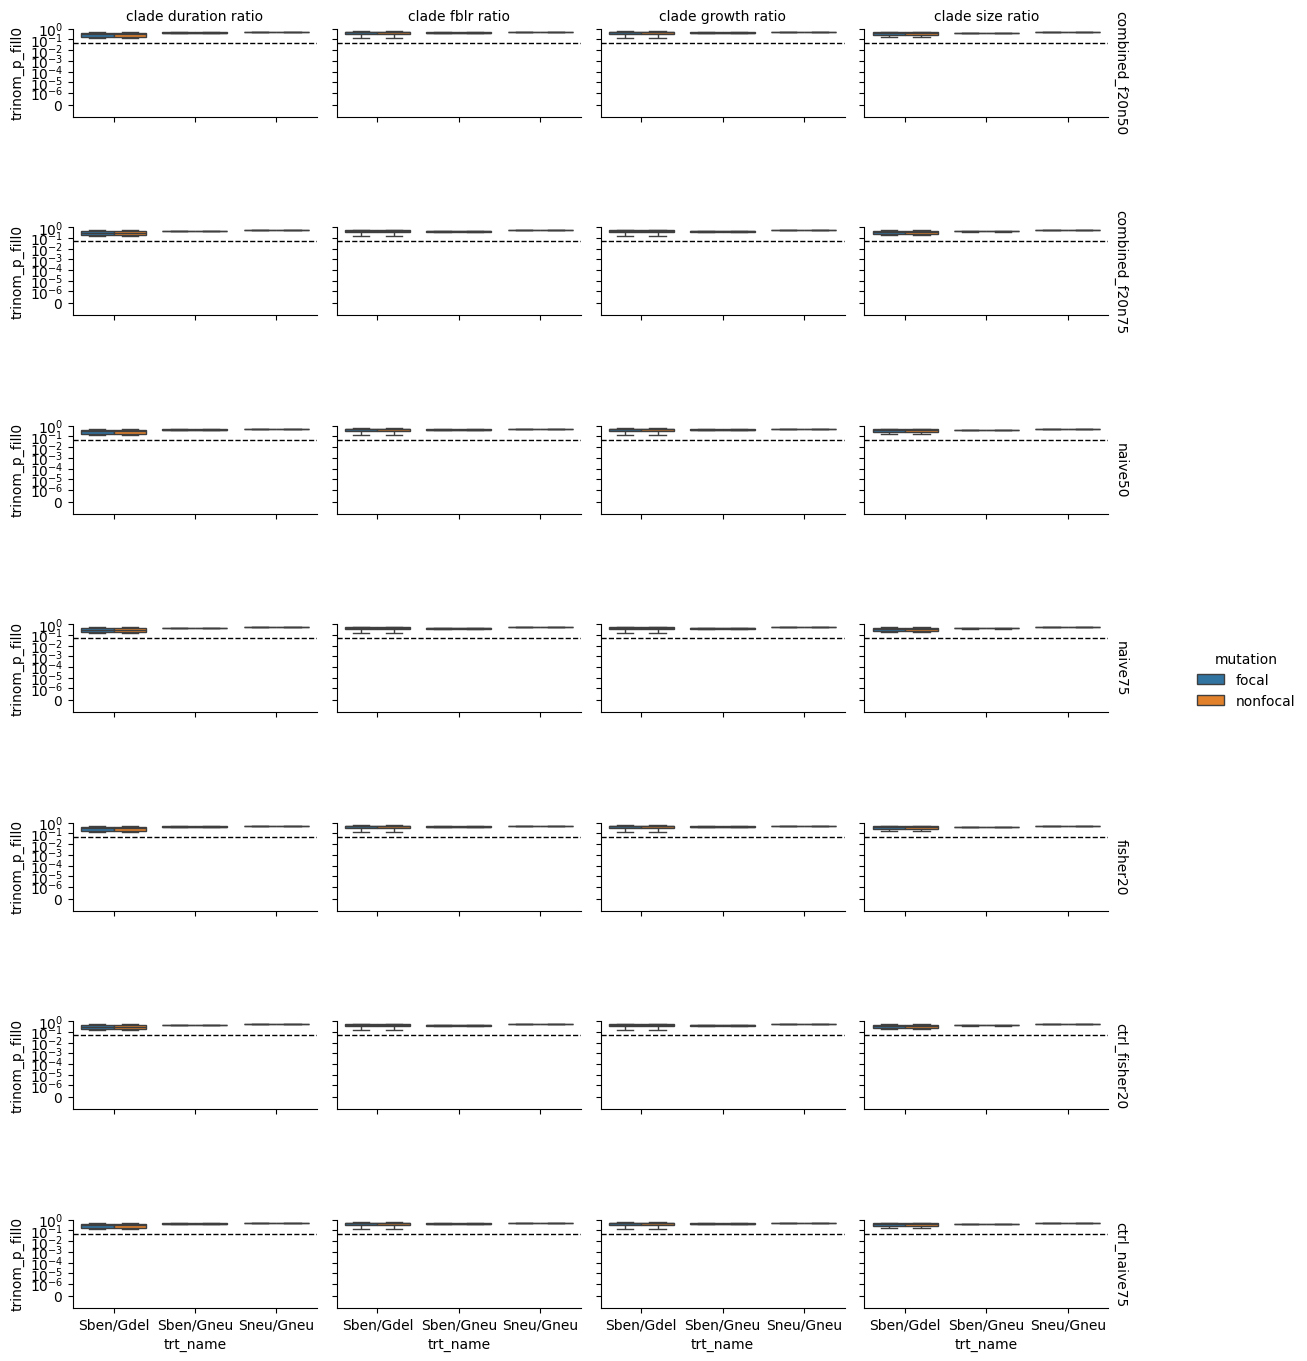

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.png


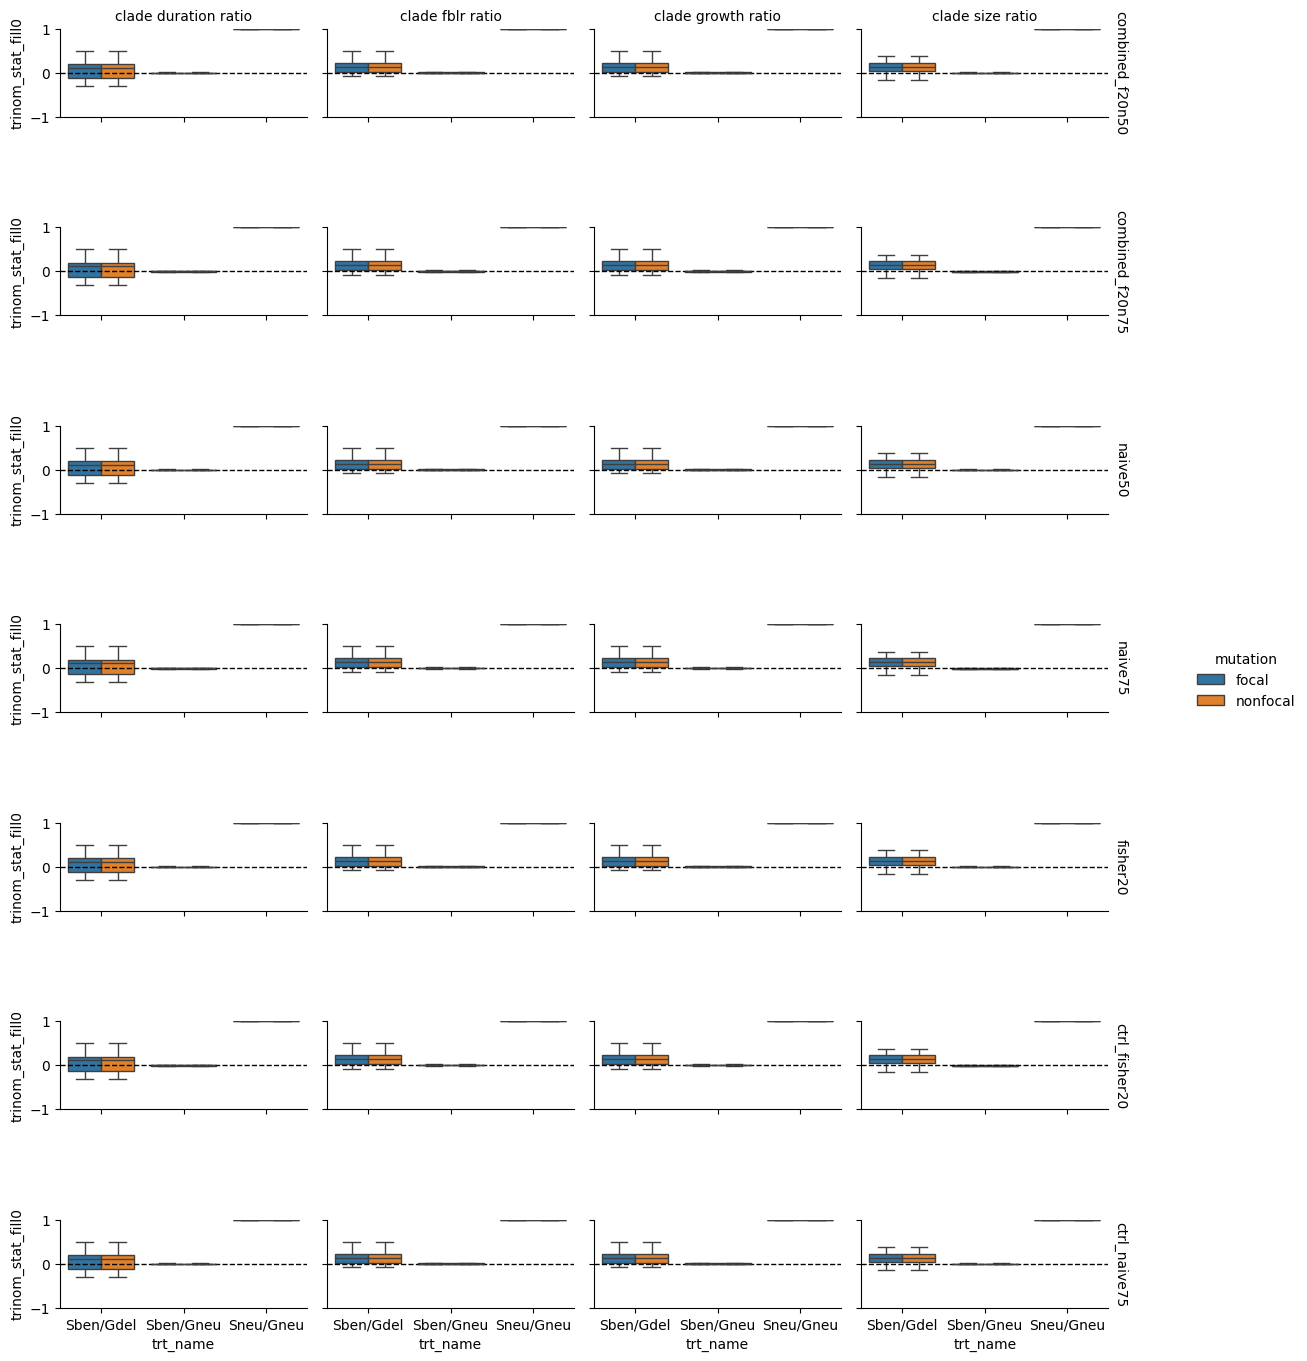

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.png


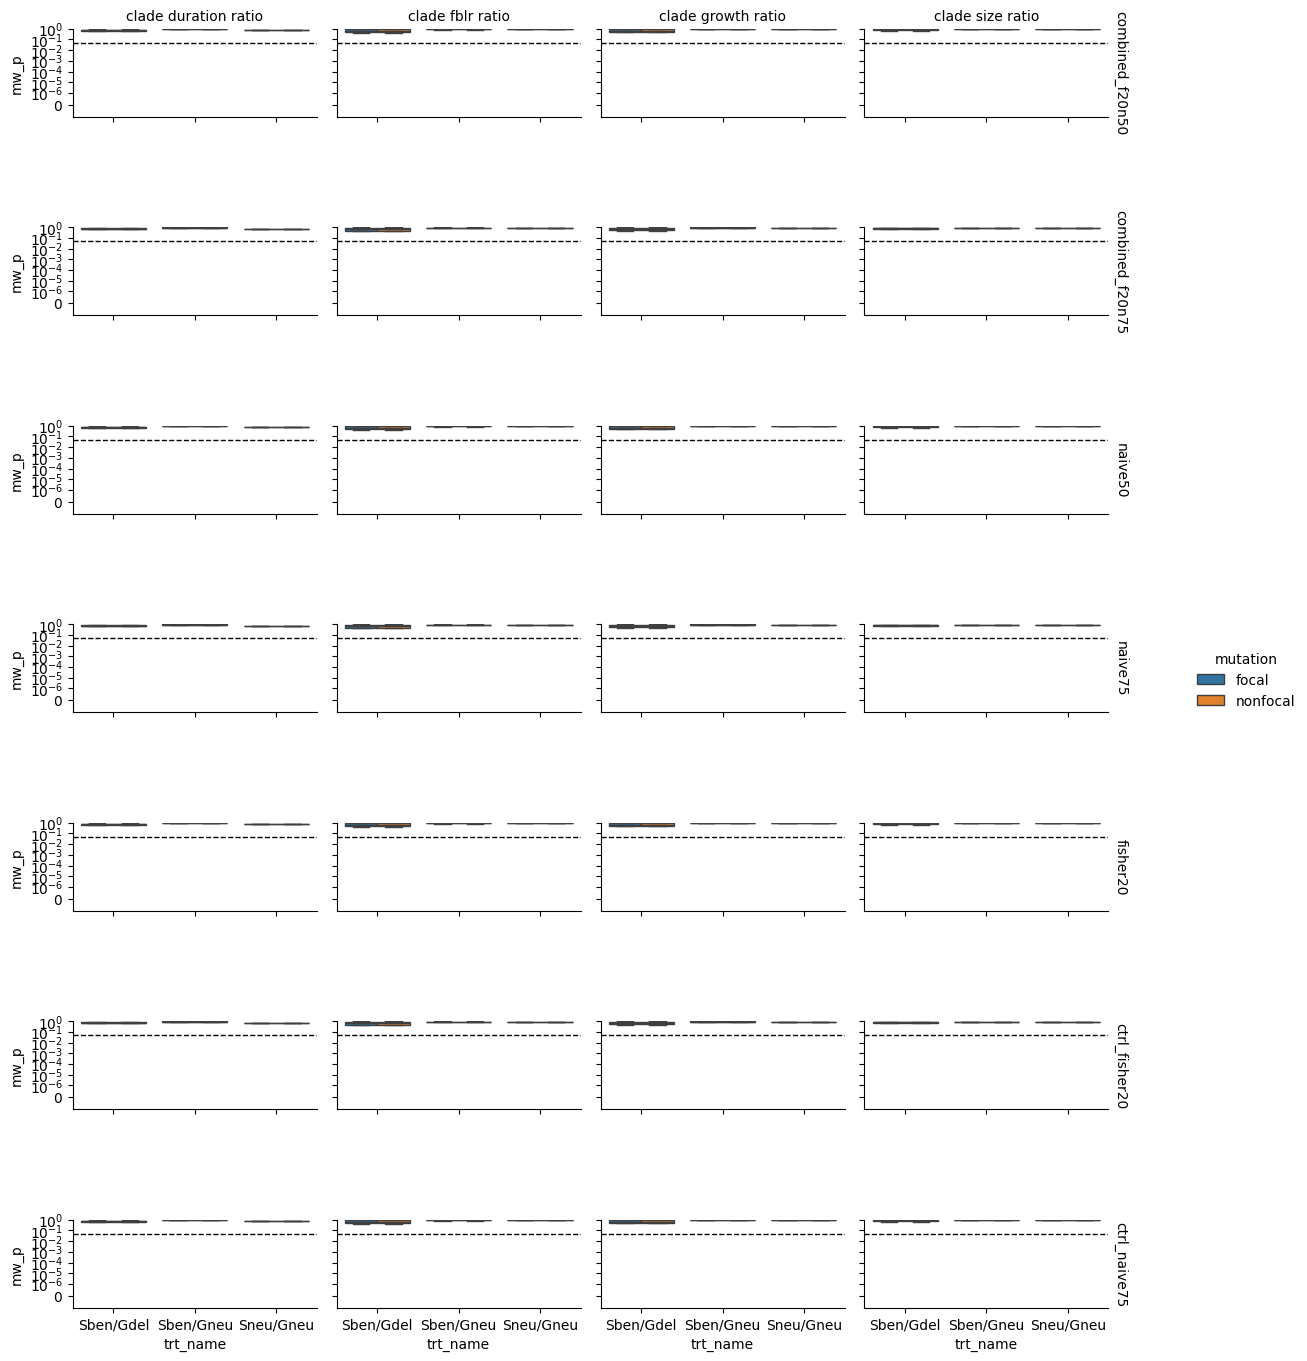

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.png


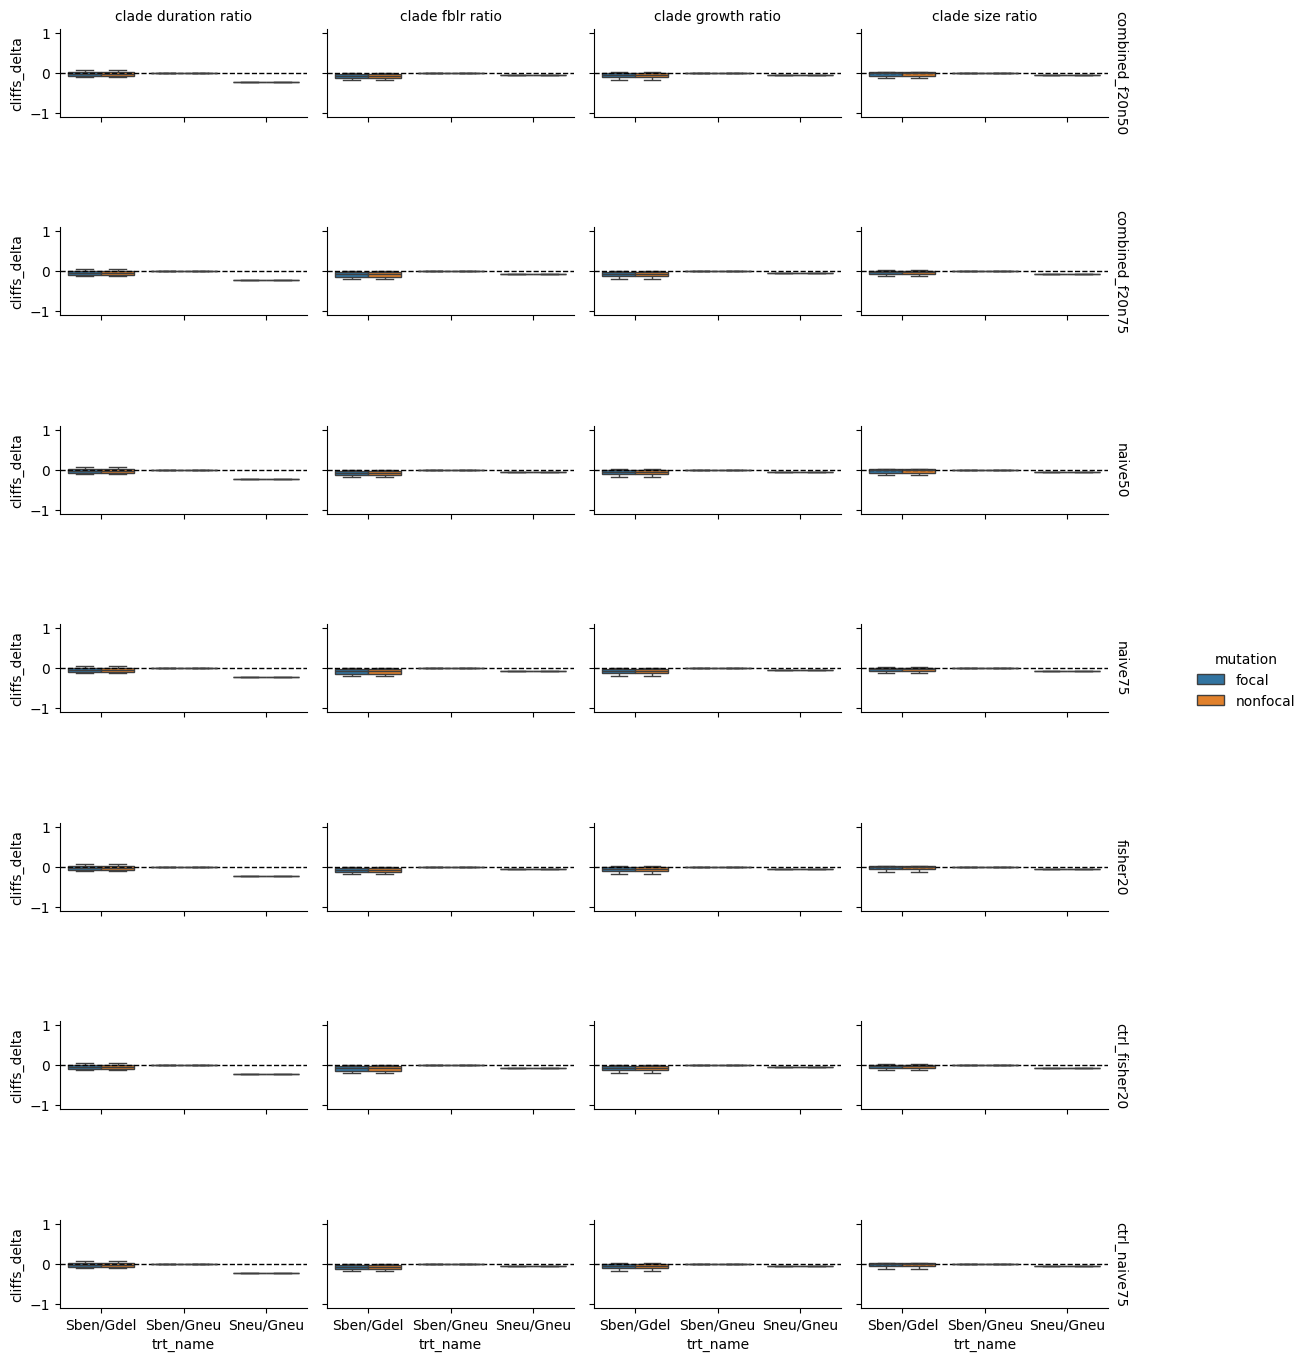

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.png


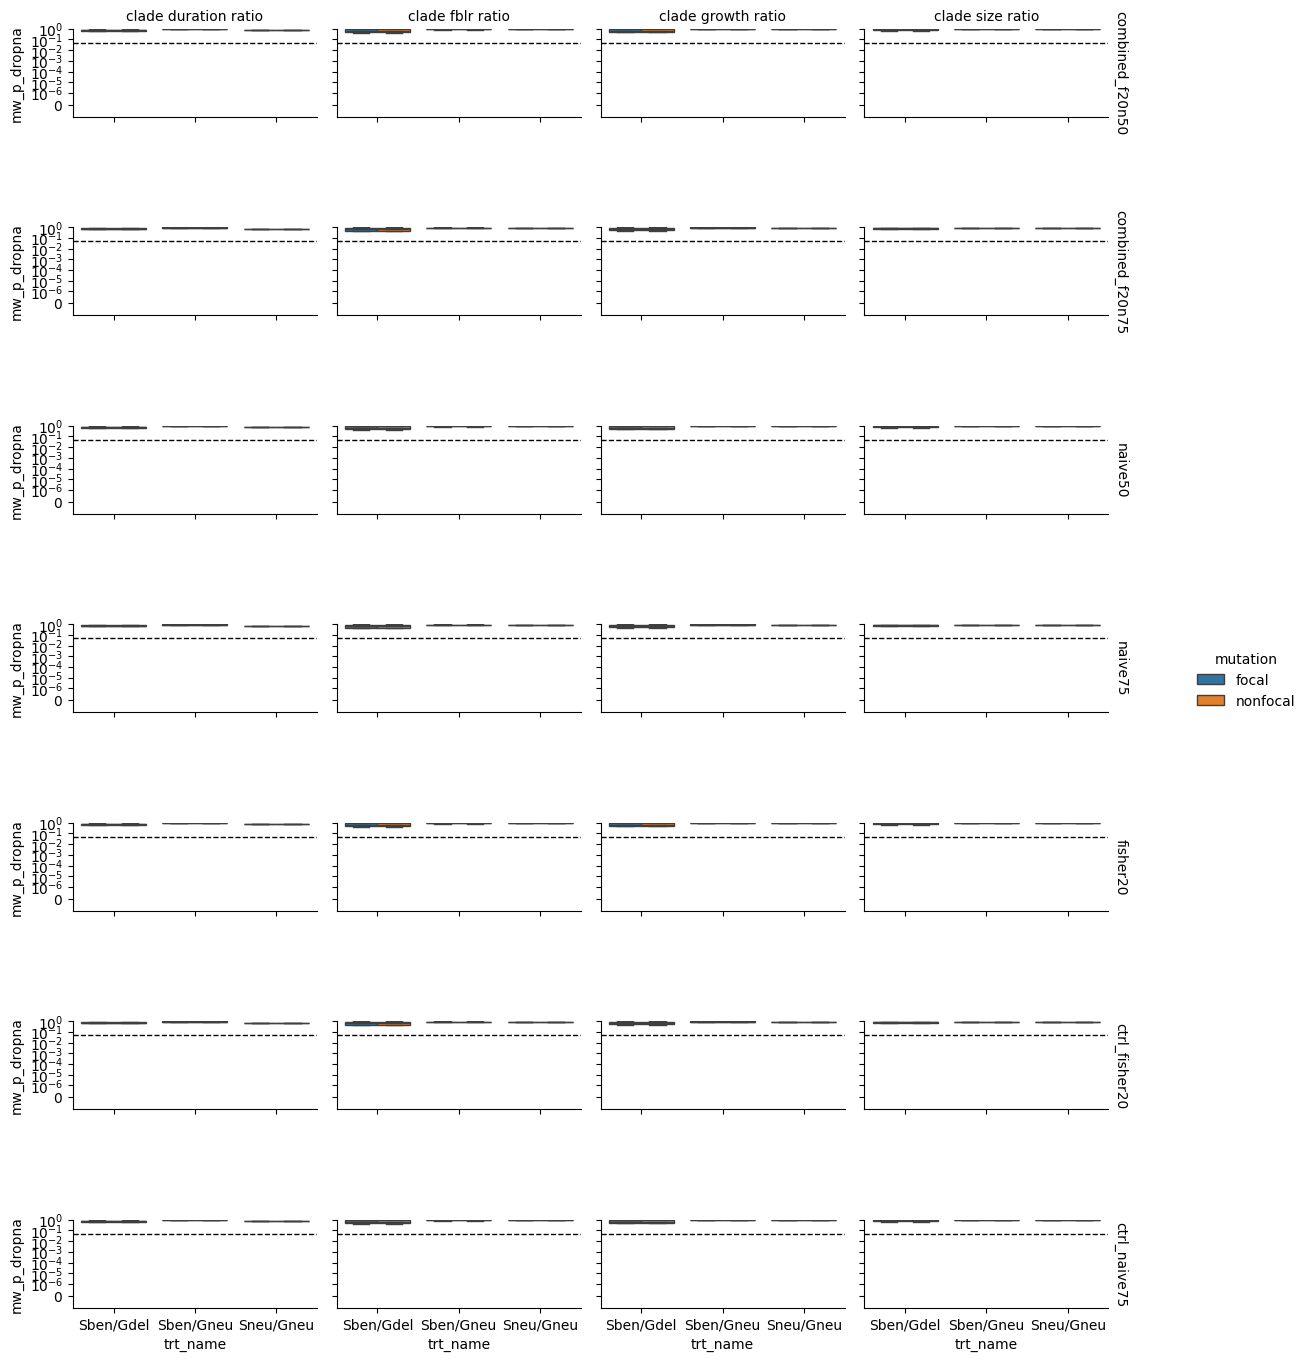

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.png


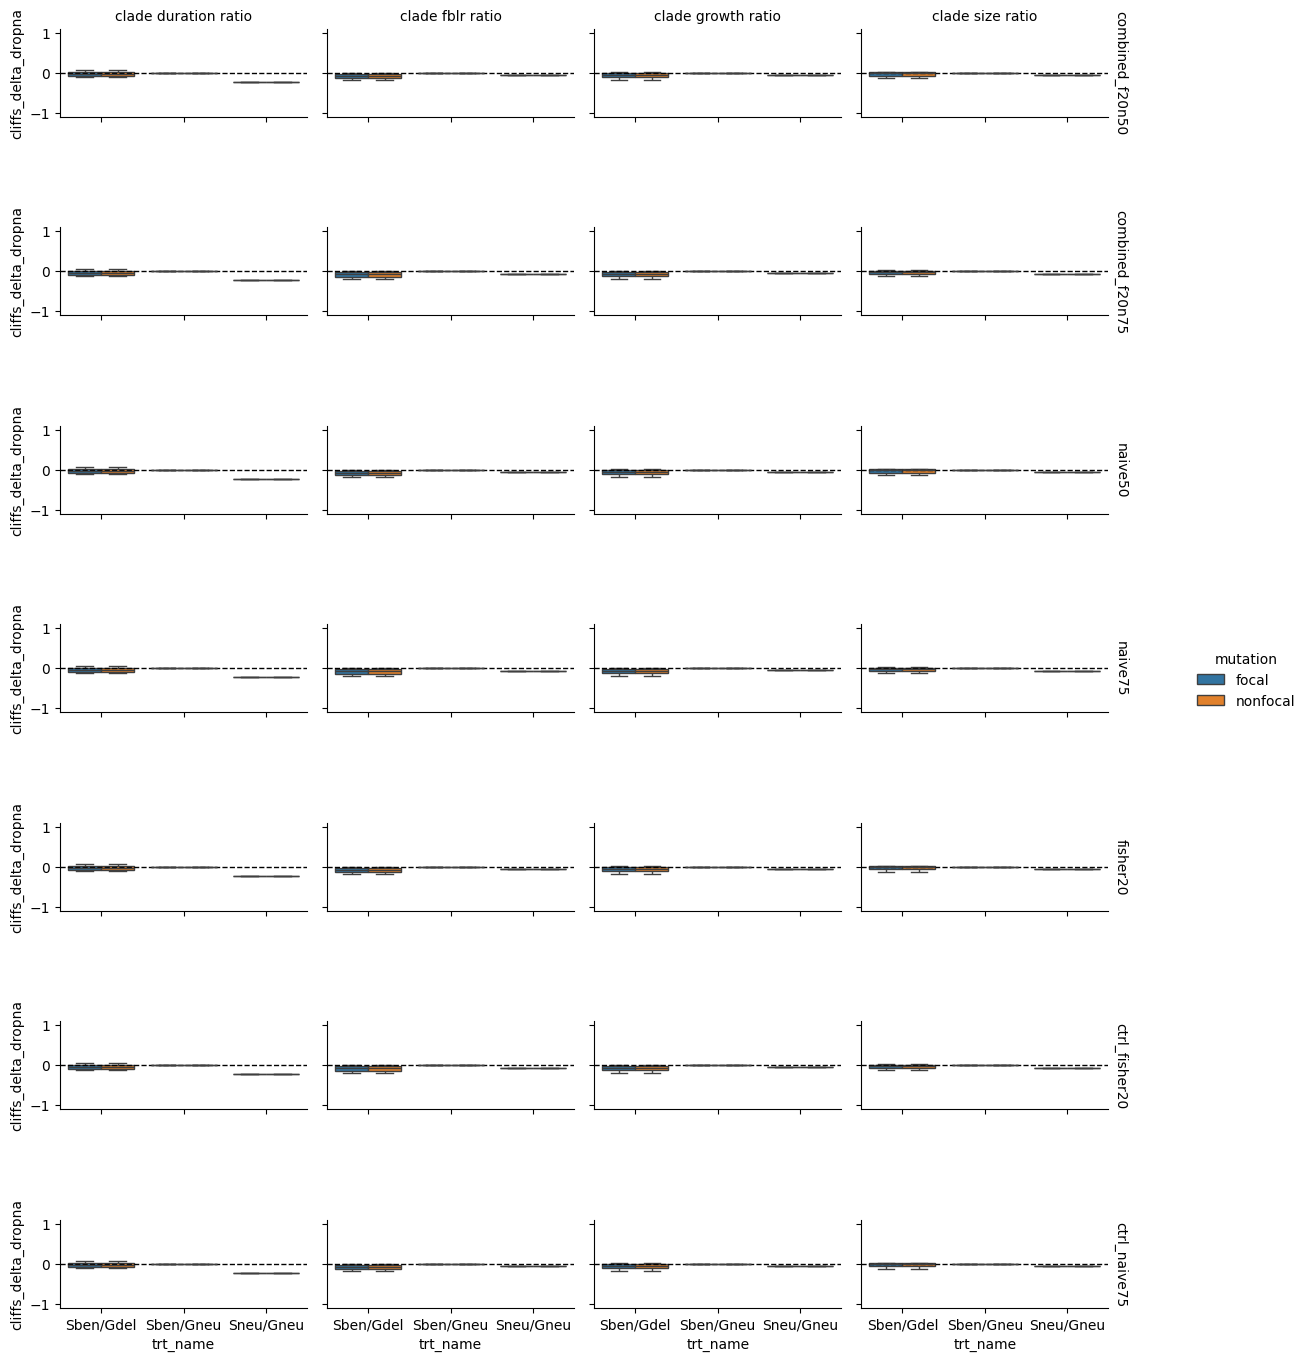

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.png


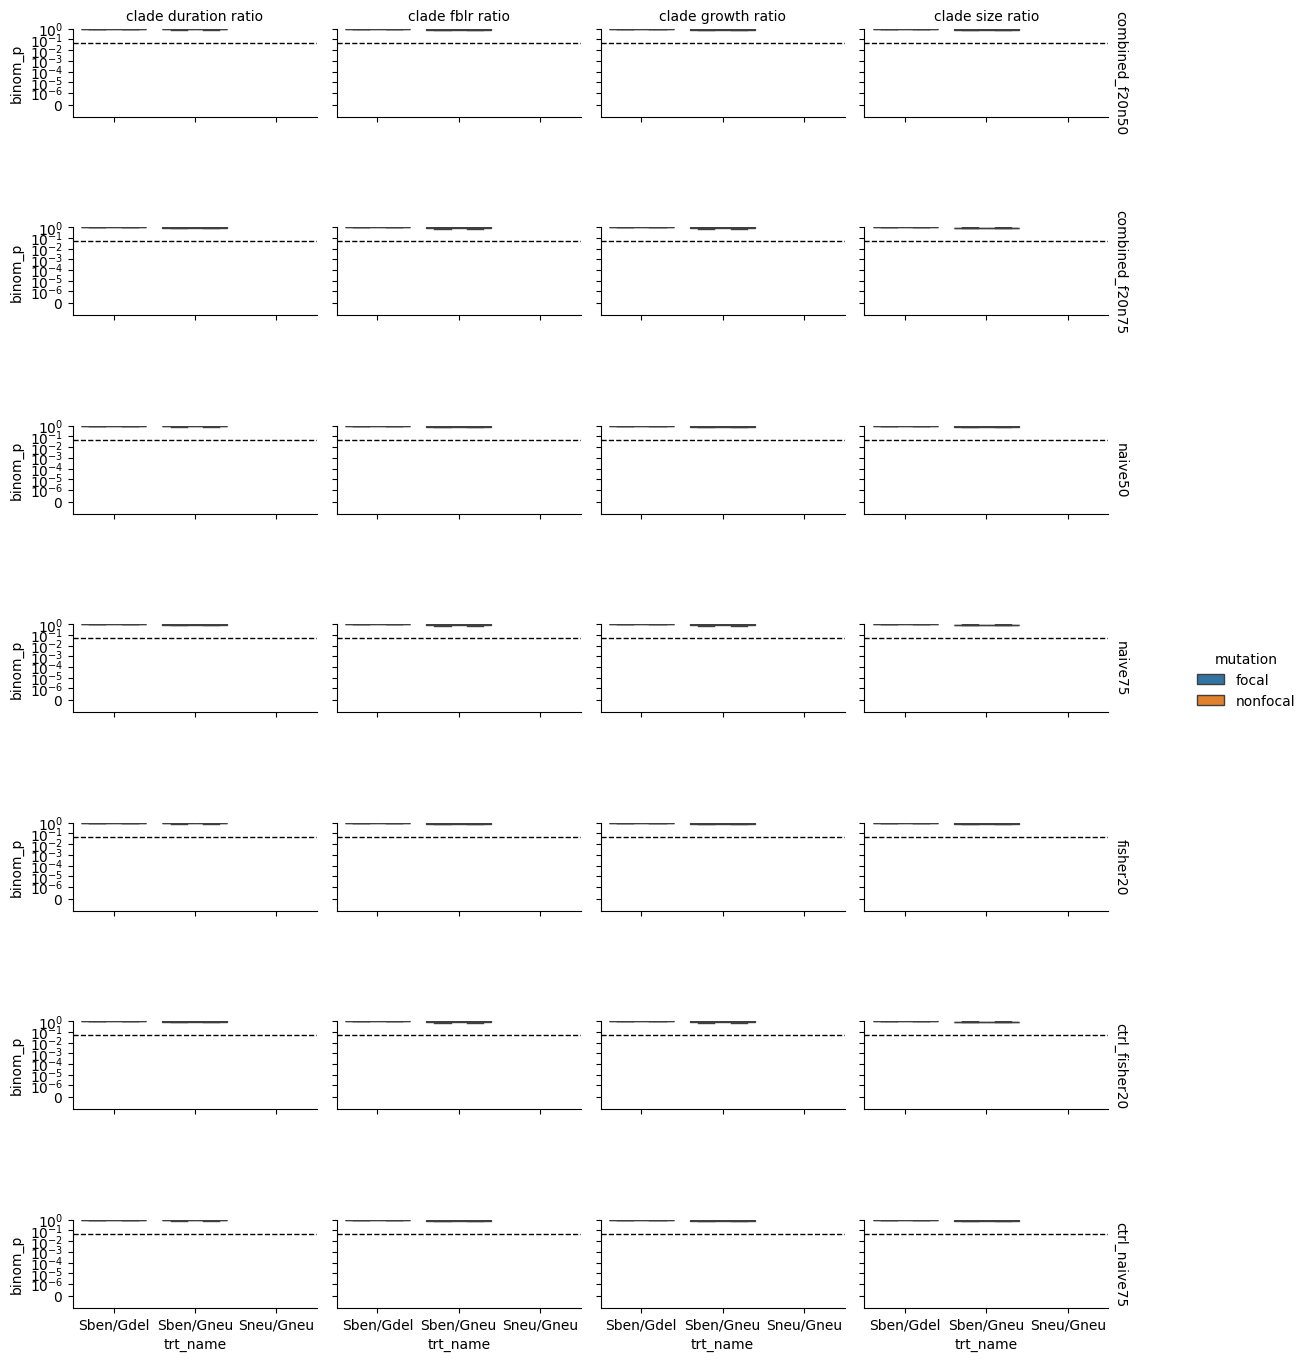

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.png


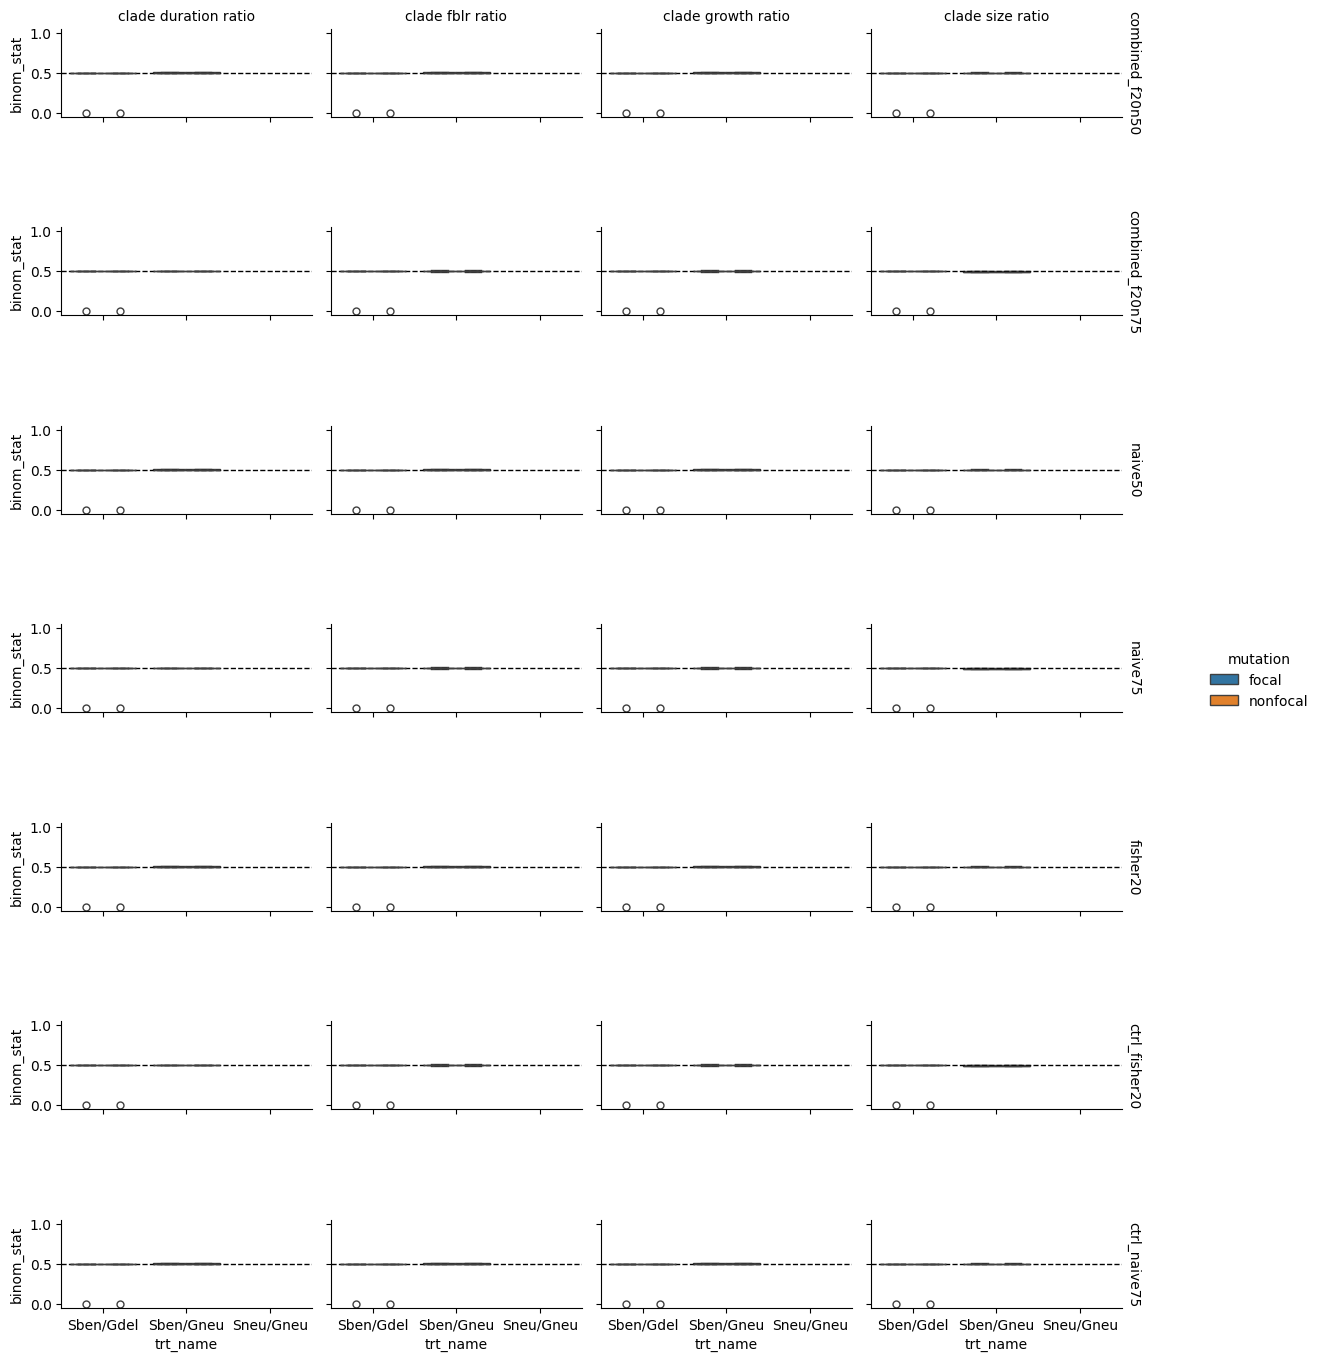

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.png


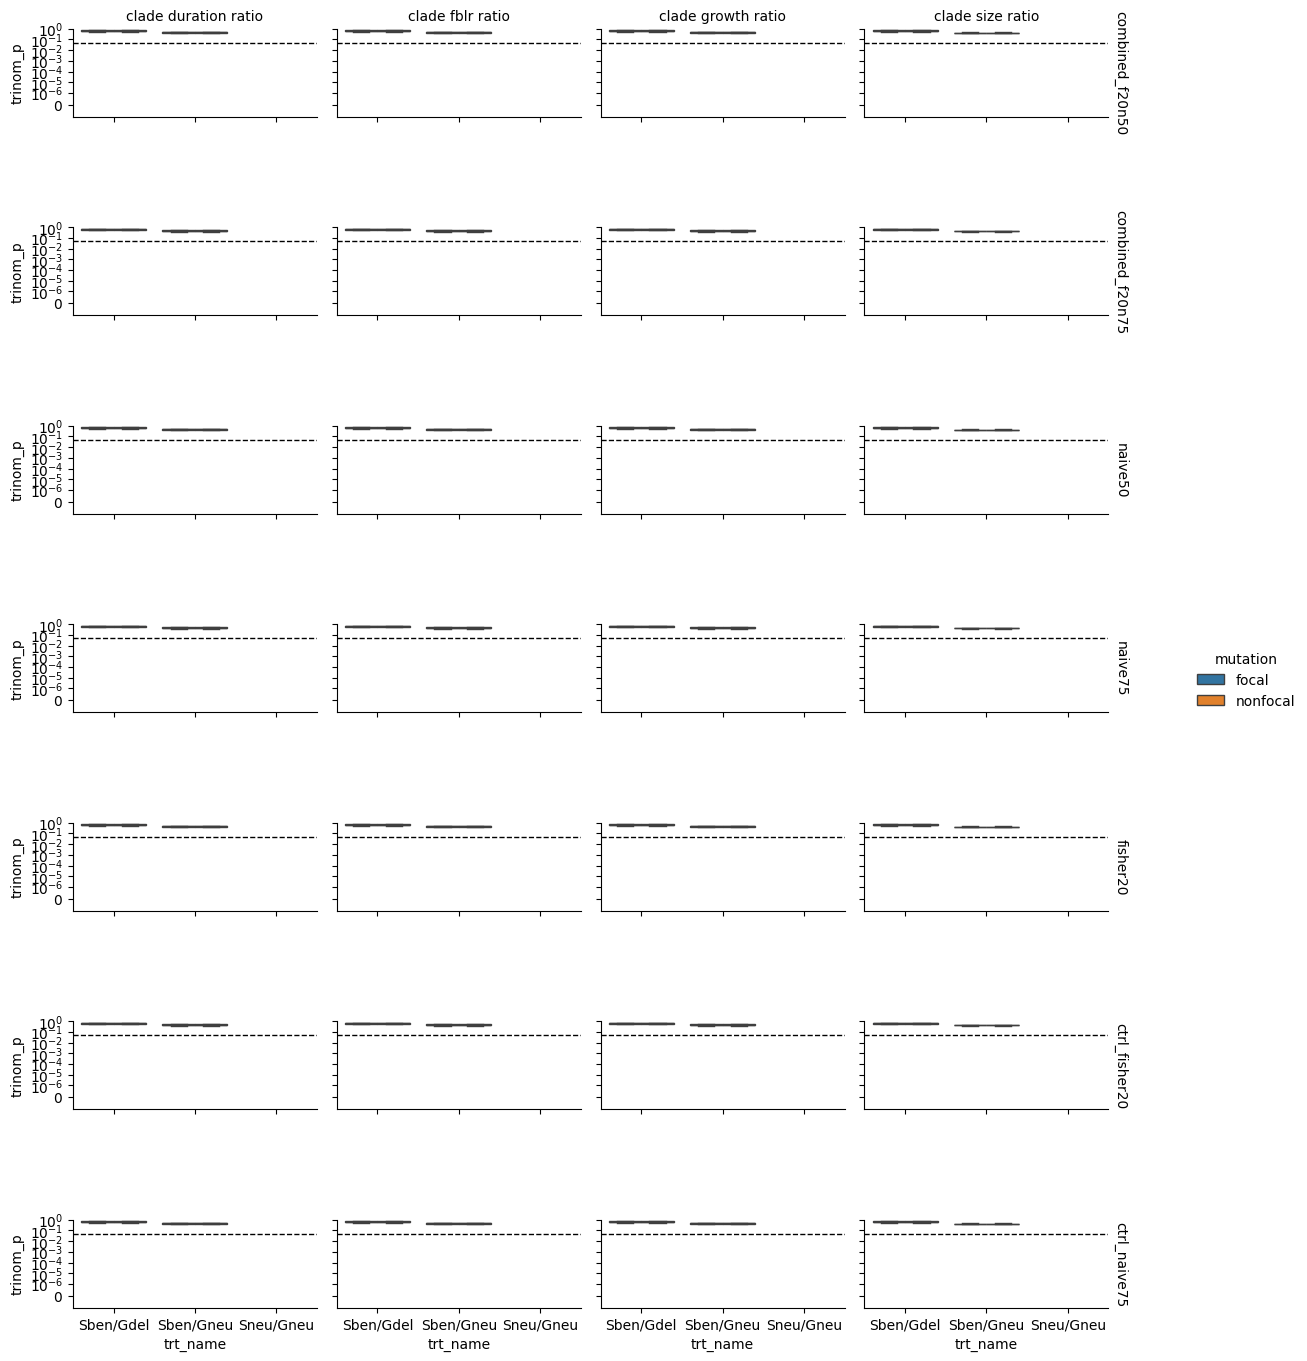

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.png


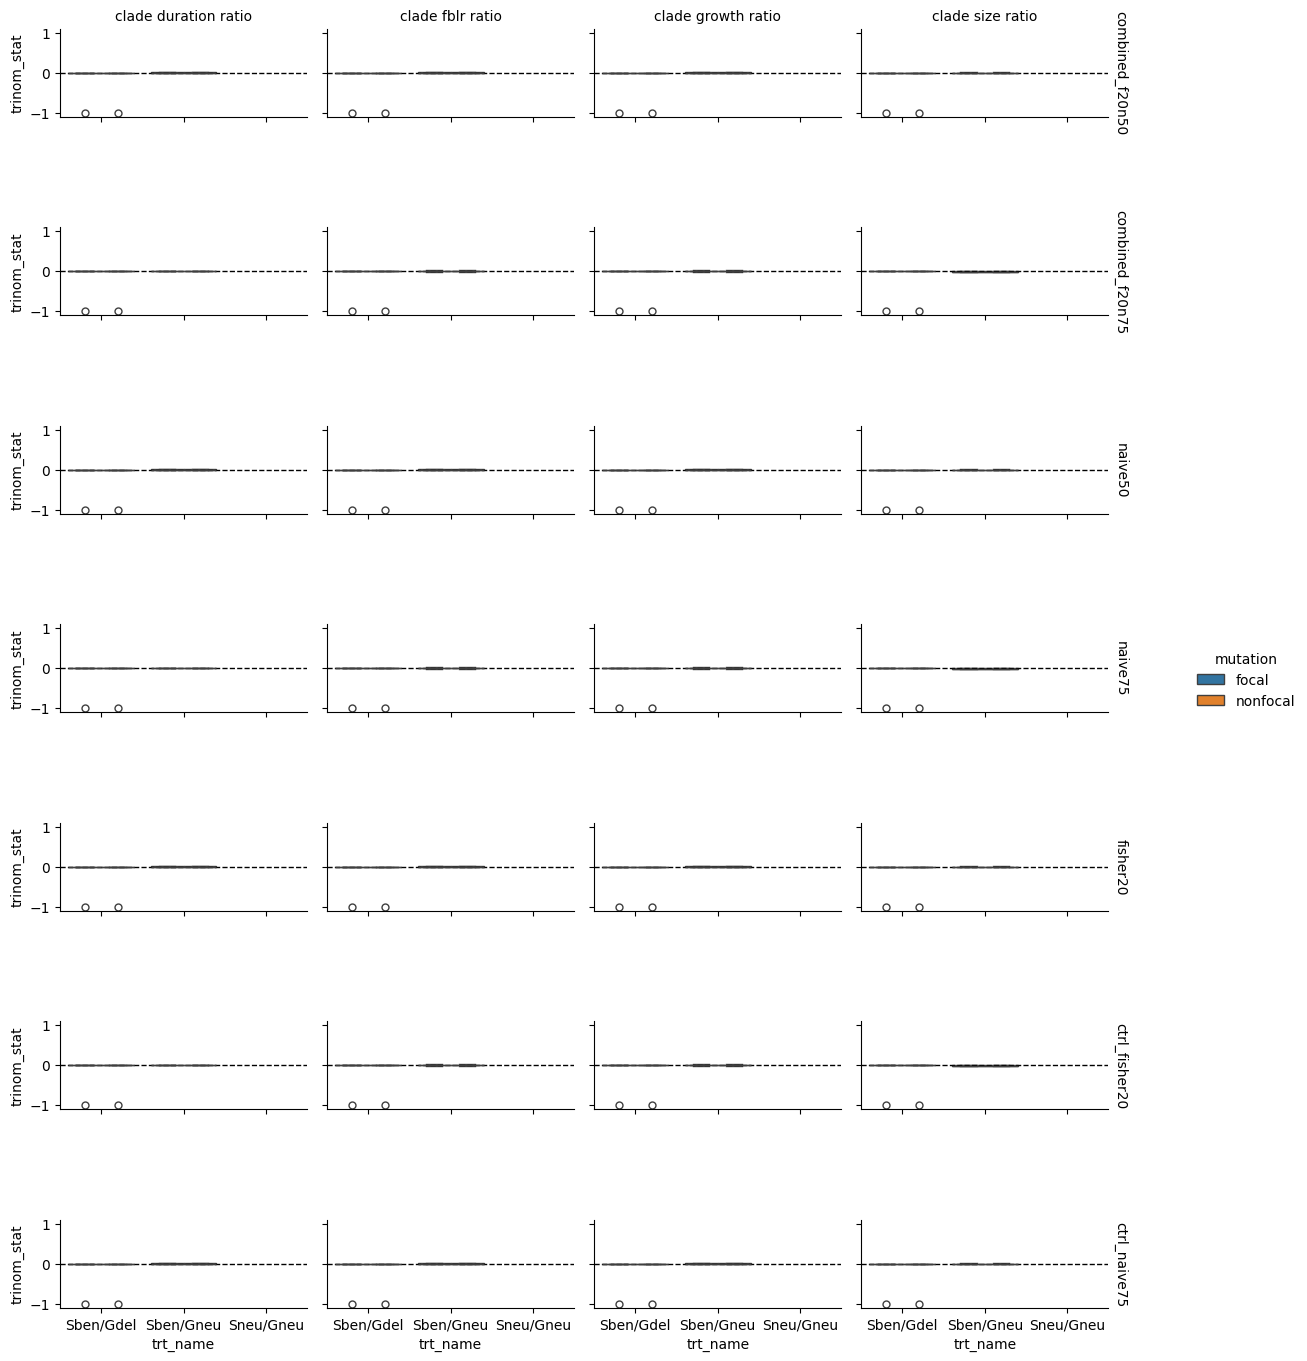

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.png


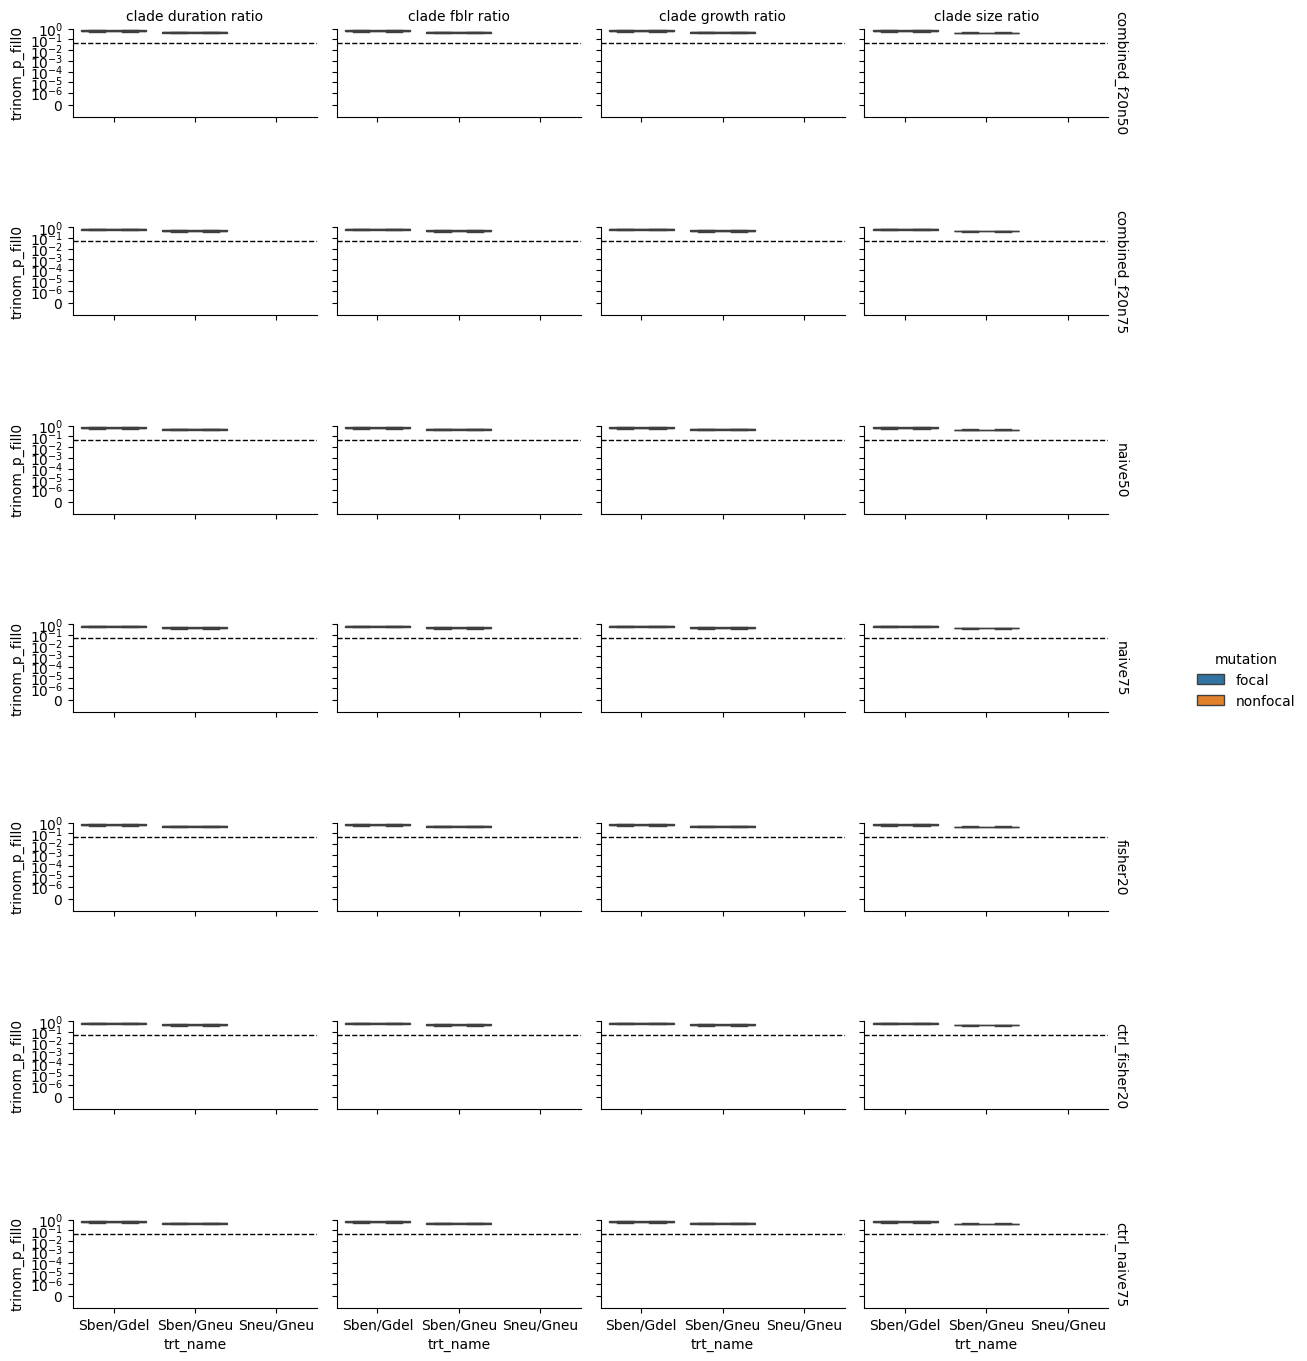

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.png


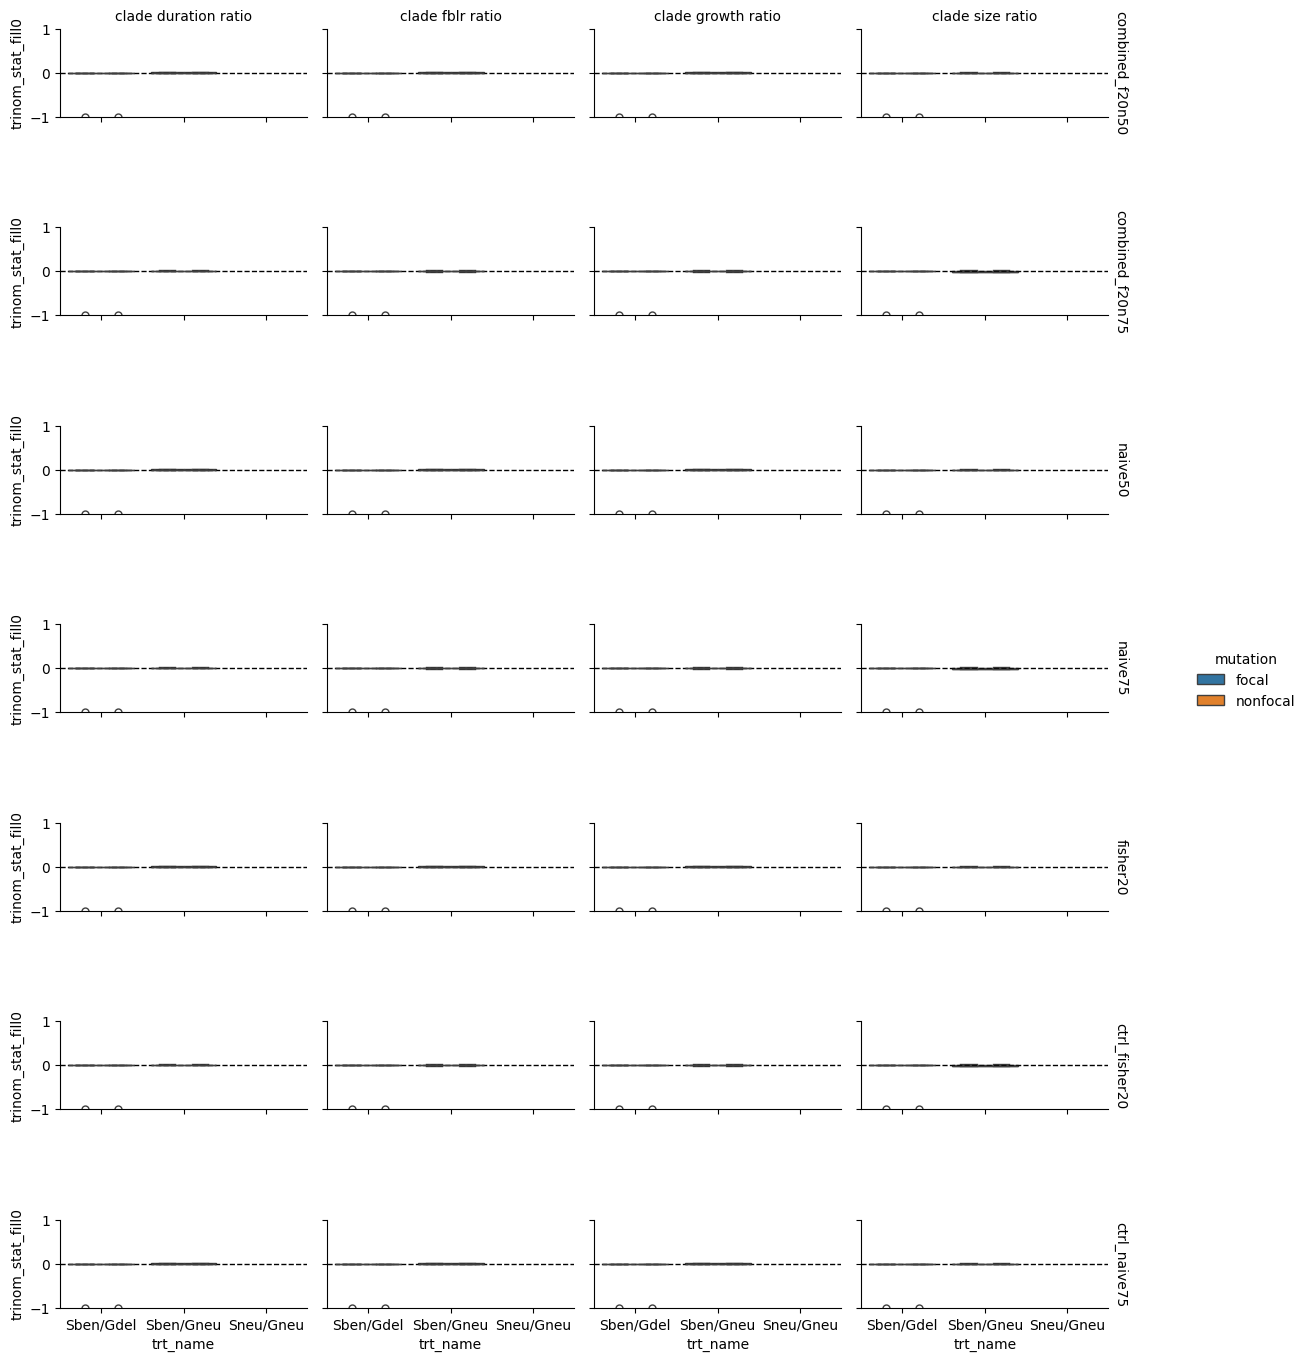

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.png


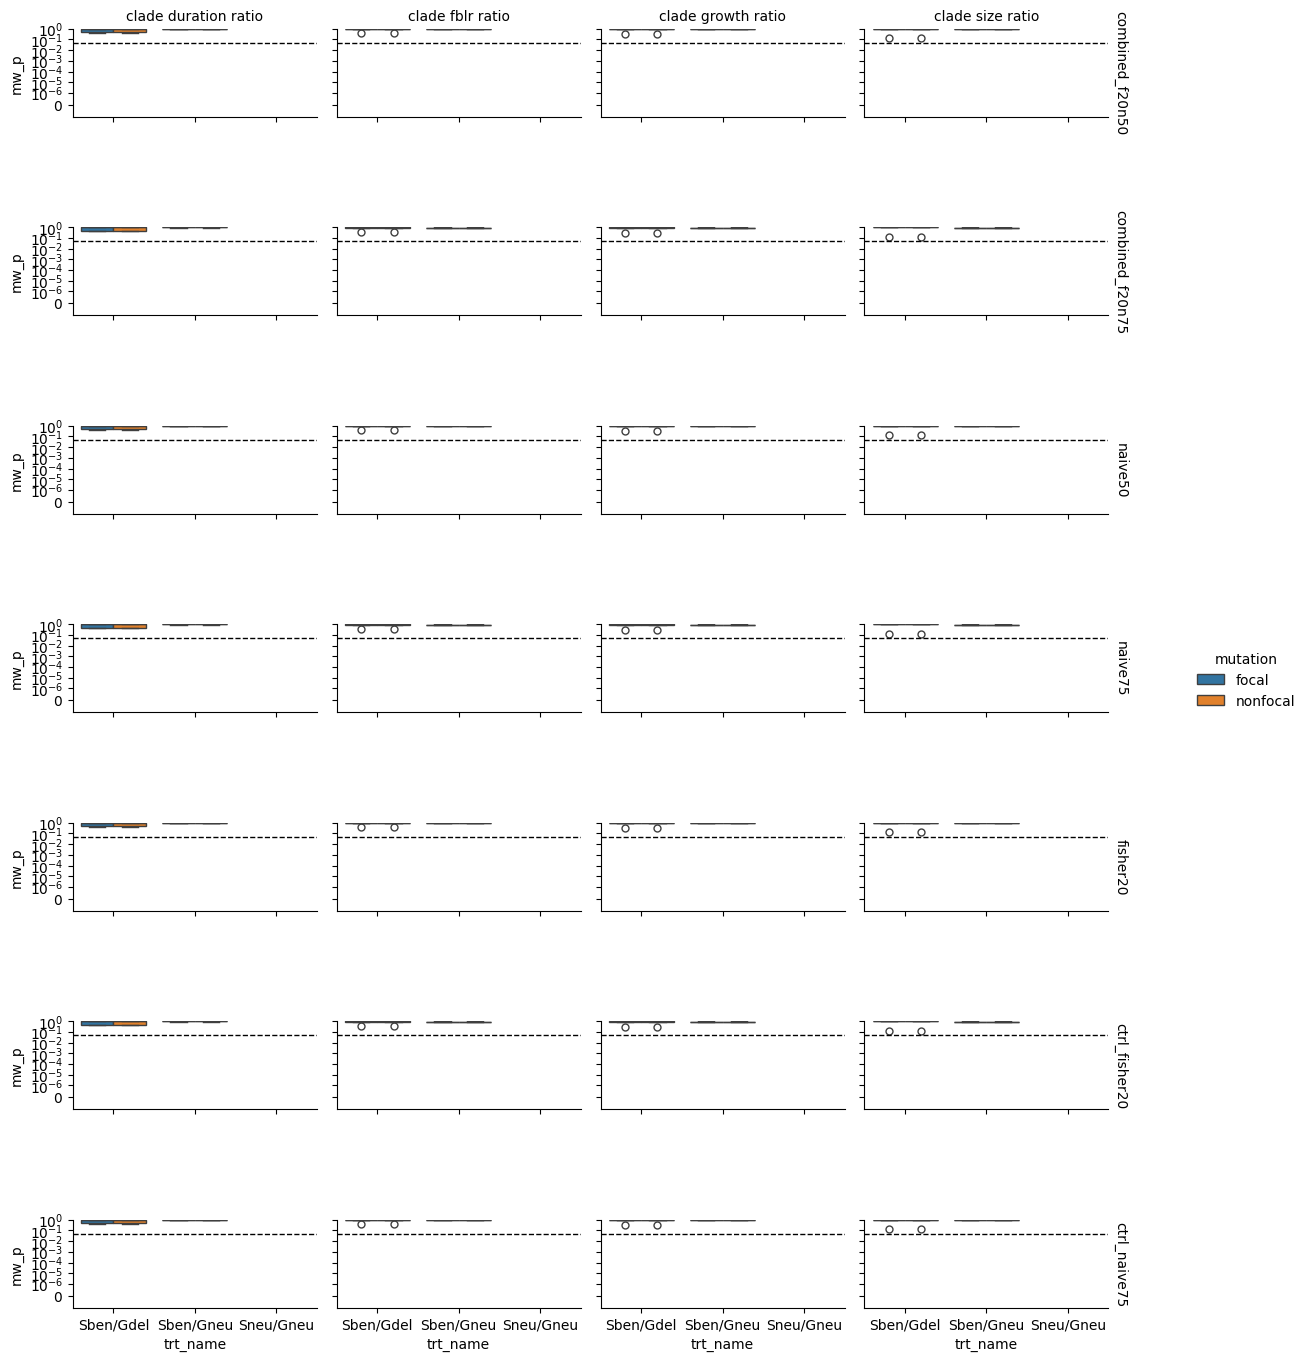

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.png


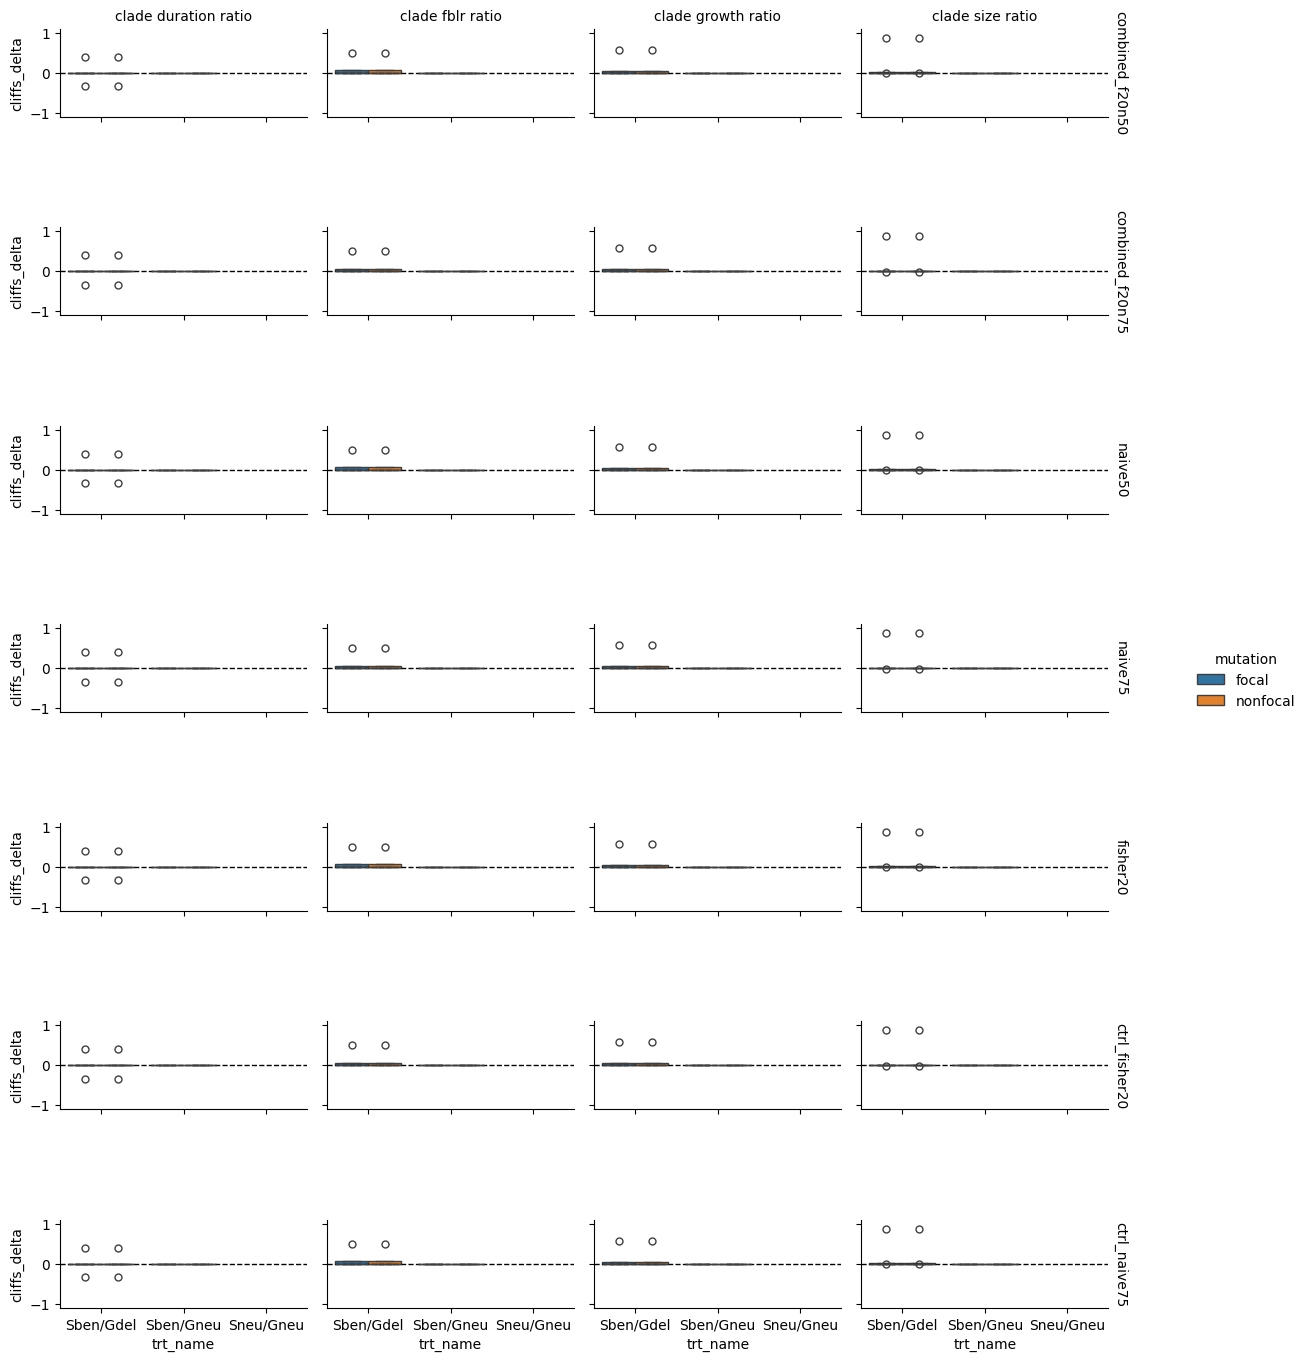

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.png


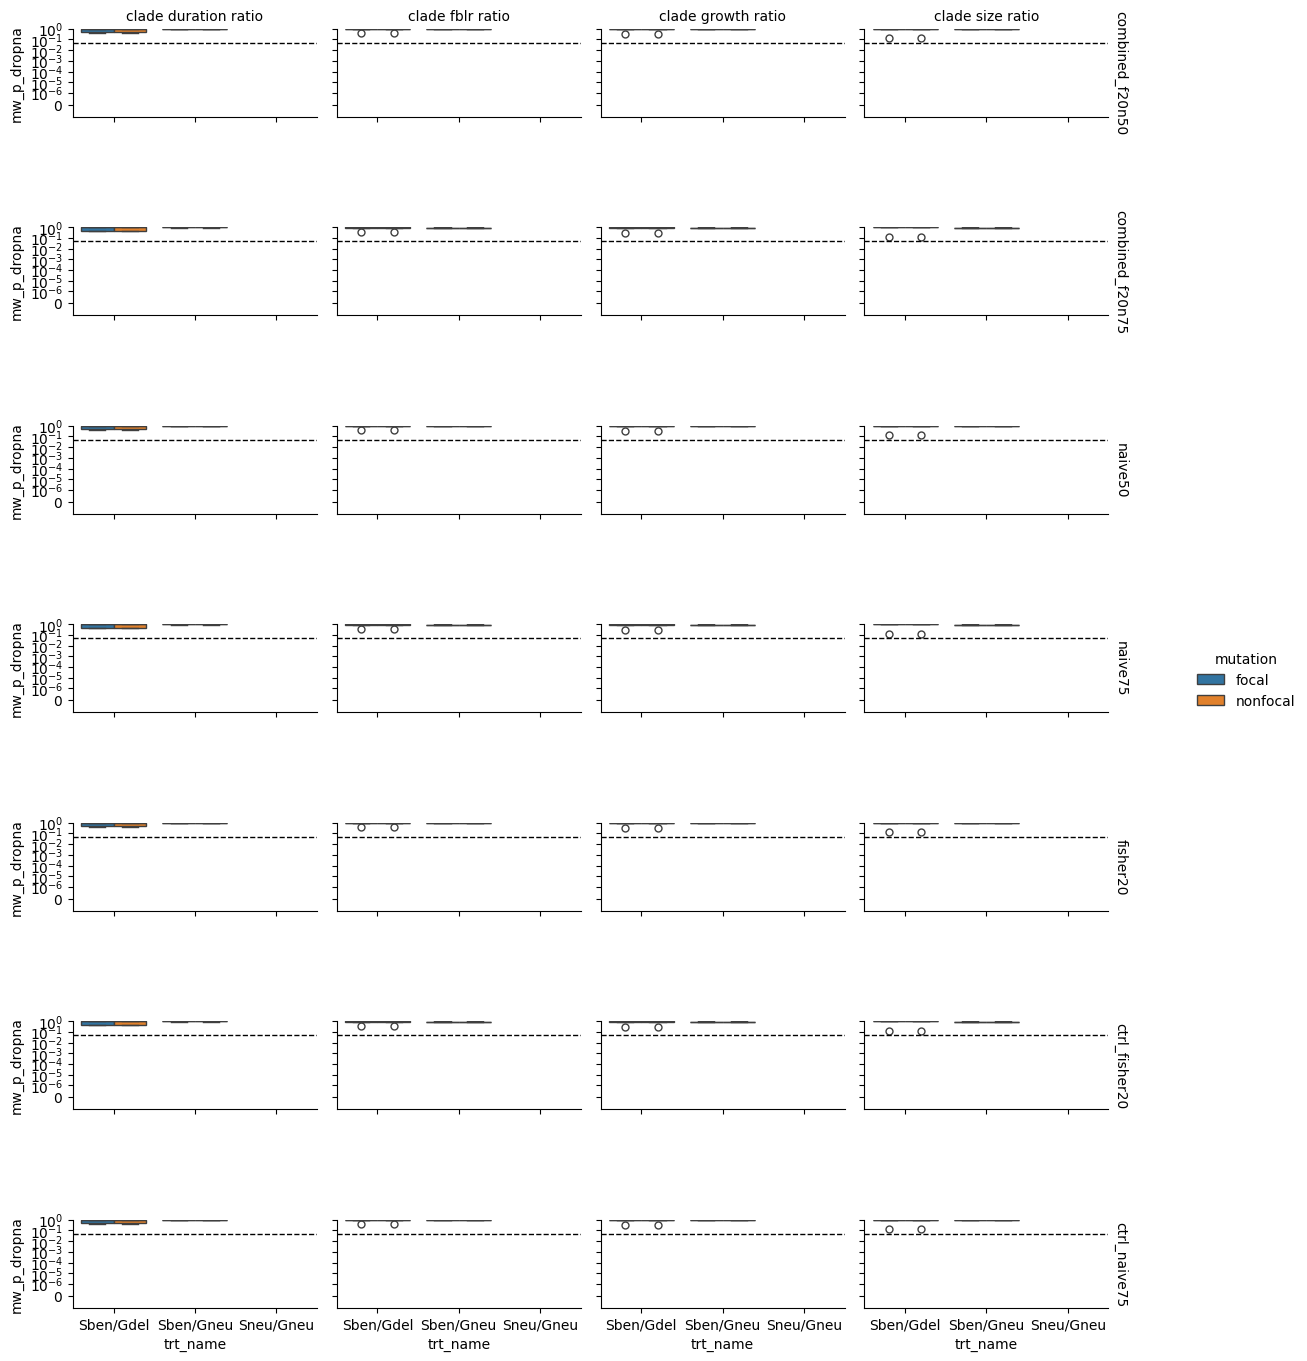

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.png


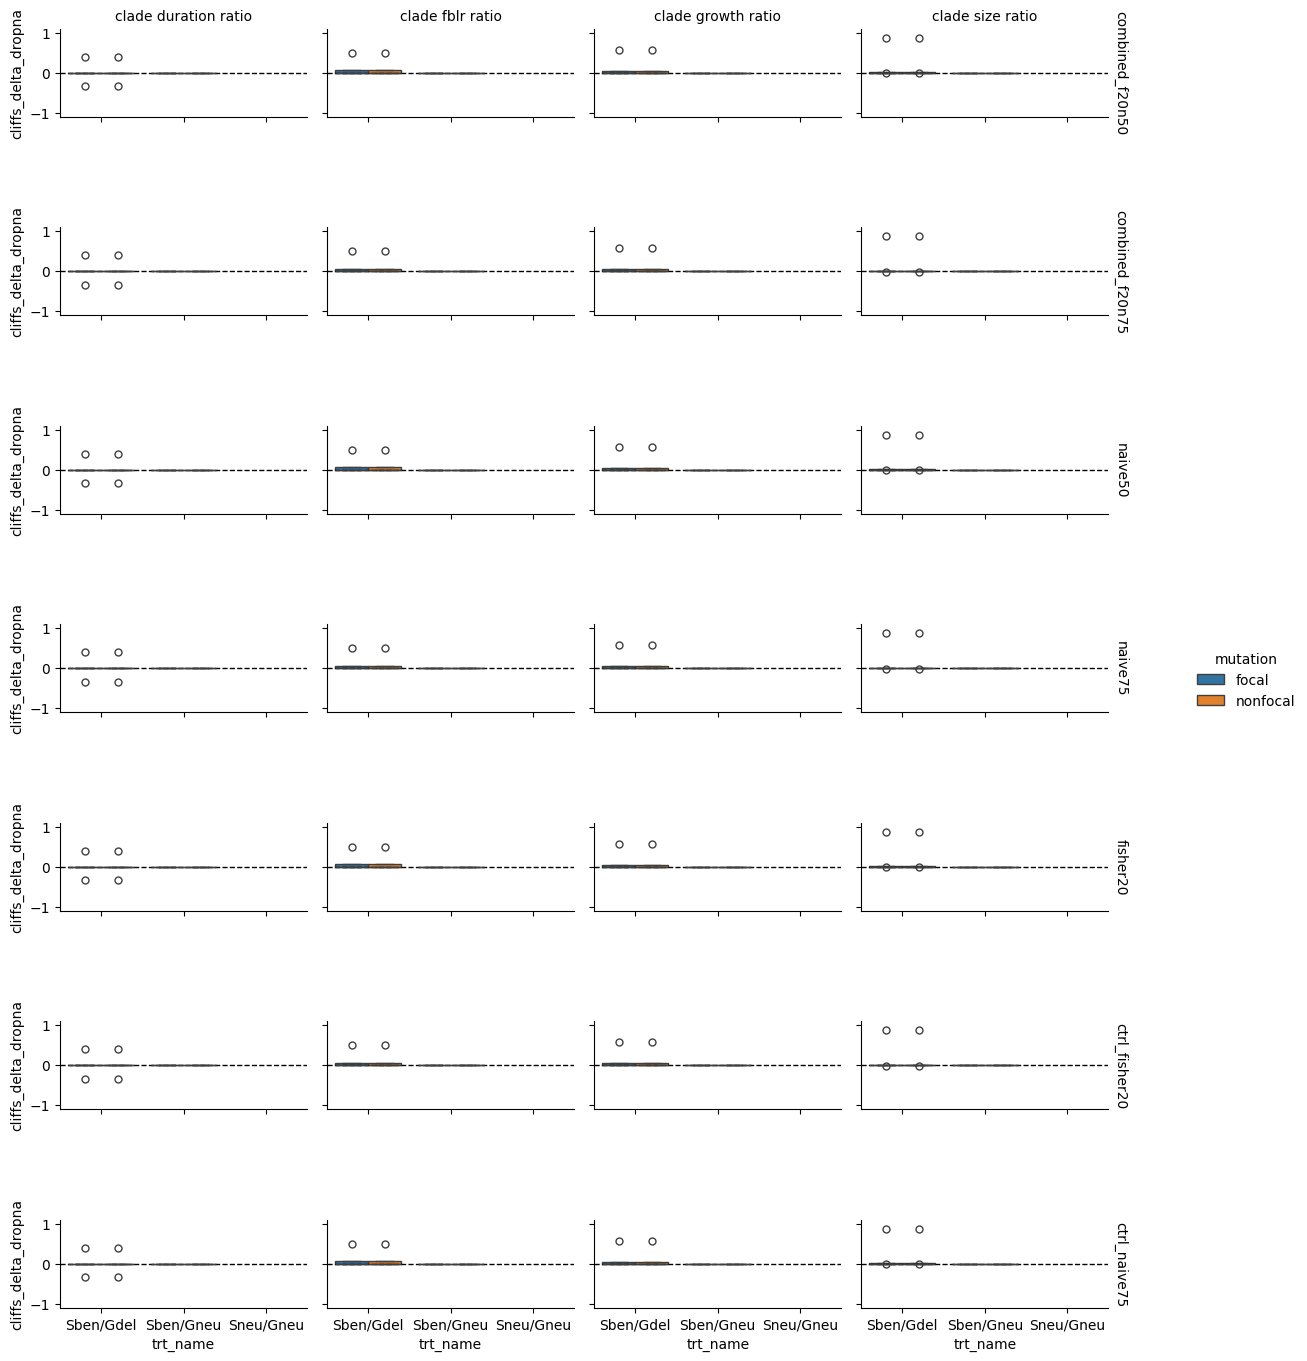

In [12]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    for stat in stats:
        display(HTML(f"<h3>{stat} {min_leaves=}</h3>"))
        with tp.teed(
            sns.catplot,
            data=grp,
            x="trt_name",
            y=stat,
            hue="mutation",
            row="screen_name",
            col="tb_stat",
            kind="box",
            height=2,
            aspect=1.5,
            margin_titles=True,
        ) as teed:
            teed.set_titles(
                row_template="{row_name}",
                col_template="{col_name}",
            )
            teed.set(
                ylim={
                    "binom_p": (-1e-6, 1),
                    "binom_stat": (-0.05, 1.05),
                    "trinom_p": (-1e-6, 1),
                    "trinom_stat": (-1.1, 1.1),
                    "trinom_p_fill0": (-1e-6, 1),
                    "trinom_stat_fill0": (-1, 1),
                    "mw_p": (-1e-6, 1),
                    "cliffs_delta": (-1.1, 1.1),
                    "mw_p_dropna": (-1e-6, 1),
                    "cliffs_delta_dropna": (-1.1, 1.1),
                }[stat],
            )
            if "_p" not in stat:
                teed.map(
                    plt.axhline,
                    y={
                        "binom_stat": 0.5,
                        "trinom_stat": 0,
                        "trinom_stat_fill0": 0,
                        "cliffs_delta": 0,
                        "cliffs_delta_dropna": 0,
                    }[stat],
                    color="black",
                    linestyle="--",
                    linewidth=1,
                )
            else:
                for ax in teed.axes.flatten():
                    ax.set_yscale("symlog", linthresh=1e-6)

                teed.map(
                    plt.axhline,
                    y=0.05,
                    color="black",
                    linestyle="--",
                    linewidth=1,
                )


In [13]:
df.loc[
    (df["trt_name"] == "Sben/Gneu")
    & (df["mut_char_pos"] == 0)
    & (df["tb_stat"].str.endswith("ratio")),
    [
        "mut_nobs",
        "mut_freq",
        "binom_n",
        "binom_k",
        "binom_p",
        "mw_p_dropna",
        "tb_stat",
        "screened_N",
        "trt_name",
        "mut_char_pos",
        "screened_nanmean",
    ],
].sample(25)


mut_nobs  mut_freq  binom_n  binom_k       binom_p   mw_p_dropna  \
395934      18404  0.030120      478      237  8.908780e-01  8.612123e-01   
395952      18404  0.030120     3330     1970  3.574283e-26  3.606257e-09   
263877      11059  0.018264        0        0           NaN           NaN   
527464       9822  0.016101     3723     1054  0.000000e+00  0.000000e+00   
263905      11059  0.018264        0        0           NaN           NaN   
263899      11059  0.018264        0        0           NaN           NaN   
395973      18404  0.030120     1006      524  1.961033e-01  3.115821e-01   
1048894     11334  0.018826        0        0           NaN           NaN   
131713      20854  0.034385      952      488  4.560268e-01  8.058447e-01   
918909      21453  0.035575     1070      553  2.846224e-01  4.195509e-01   
918901      21453  0.035575     1070      553  2.846224e-01  3.957329e-01   
1048809     11334  0.018826        0        0           NaN           NaN   
131807      20854  0.034385      289      147  8.140305e-01  9.754300e-01   
395940      18404  0.030120     3288     1952  5.511543e-27  0.000000e+00   
918880      21453  0.035575     3415     2005  2.191362e-24  1.043408e-07   
527467       9822  0.016101        0        0           NaN           NaN   
131774      20854  0.034385      513      261  7.239698e-01  9.956278e-01   
918865      21453  0.035575     1054      544  3.094054e-01  6.118050e-01   
131721      20854  0.034385      952      488  4.560268e-01  8.058447e-01   
918893      21453  0.035575     1070      553  2.846224e-01  3.957329e-01   
1048801     11334  0.018826        0        0           NaN           NaN   
396031      18404  0.030120      260      129  9.505649e-01  8.830920e-01   
527502       9822  0.016101        0        0           NaN           NaN   
527514       9822  0.016101        0        0           NaN           NaN   
131743      20854  0.034385      295      151  7.269043e-01  8.627872e-01   

                      tb_stat  screened_N   trt_name  mut_char_pos  \
395934   clade duration ratio         497  Sben/Gneu             0   
395952       clade fblr ratio        3330  Sben/Gneu             0   
263877     clade growth ratio           0  Sben/Gneu             0   
527464       clade fblr ratio        4217  Sben/Gneu             0   
263905       clade size ratio           0  Sben/Gneu             0   
263899     clade growth ratio           0  Sben/Gneu             0   
395973       clade fblr ratio        1006  Sben/Gneu             0   
1048894      clade size ratio           0  Sben/Gneu             0   
131713   clade duration ratio         972  Sben/Gneu             0   
918909     clade growth ratio        1072  Sben/Gneu             0   
918901       clade fblr ratio        1072  Sben/Gneu             0   
1048809  clade duration ratio           0  Sben/Gneu             0   
131807       clade size ratio         295  Sben/Gneu             0   
395940   clade duration ratio        3330  Sben/Gneu             0   
918880       clade fblr ratio        3417  Sben/Gneu             0   
527467       clade fblr ratio           0  Sben/Gneu             0   
131774     clade growth ratio         513  Sben/Gneu             0   
918865   clade duration ratio        1072  Sben/Gneu             0   
131721   clade duration ratio         972  Sben/Gneu             0   
918893       clade fblr ratio        1072  Sben/Gneu             0   
1048801  clade duration ratio           0  Sben/Gneu             0   
396031       clade size ratio         264  Sben/Gneu             0   
527502     clade growth ratio           0  Sben/Gneu             0   
527514     clade growth ratio           0  Sben/Gneu             0   
131743       clade fblr ratio         295  Sben/Gneu             0   

         screened_nanmean  
395934          -0.008015  
395952           0.001148  
263877                NaN  
527464          -0.002342  
263905                NaN  
263899           